In [1]:
#!pip install tensorflow-addons
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

num_classes = 3

In [2]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

2.12.0
Num GPUs Available:  1


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
data_path = r'/content/drive/My Drive/Project 20/inputsAIO'

In [5]:
import cv2

data_dir = data_path 

data = []

for folder in os.listdir(data_dir):
    sub_path=data_dir+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(235, 352))
        data.append(img_arr)

# for filename in os.listdir(data_dir):
#     if filename.endswith('.jpg'): 
#         img_path = os.path.join(data_dir, filename)
#         image = cv2.imread(img_path)
#         if image is not None:
#             data.append(image)
data = np.array(data)
# print(data)


class_labels = os.listdir(data_dir)  # Get class labels
targets = []
for class_label in class_labels:
    class_dir = os.path.join(data_dir, class_label)
    if os.path.isdir(class_dir):
        file_names = os.listdir(class_dir)
        targets.extend([class_label] * len(file_names))
targets = np.array(targets)
# print(targets)

In [6]:
print(targets)
classes = np.unique(targets)
class_indices = np.searchsorted(classes, targets)

['Wheat___Yellow_Rust' 'Wheat___Yellow_Rust' 'Wheat___Yellow_Rust' ...
 'Wheat___Brown_Rust' 'Wheat___Brown_Rust' 'Wheat___Brown_Rust']


In [9]:
# InceptionResNetV2
def inceptionresnetv2():
  base_model = tensorflow.keras.applications.InceptionResNetV2(
      weights = 'imagenet',
      include_top = False,
      input_shape=(224, 224, 3), # Topless
      )

  #comparing transfer learning methods, keeping the output layers the same allows for a closer understanding of the differences
  # print(base_model.summary())
  x = base_model.output
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(4096)(x)
  x = keras.layers.ReLU()(x)
  x = keras.layers.Dropout(0.5)(x)
  x = keras.layers.Dense(4096)(x)
  x = keras.layers.ReLU()(x)
  x = keras.layers.Dropout(0.5)(x)
  predictions = keras.layers.Dense(num_classes, activation='softmax')(x)
  resnet_model = keras.models.Model(inputs=base_model.input, outputs=predictions)

  #To compare pre-trained models accurately,
  #train by freezing all parts up to the third-to-last layer.
  #Freezing Convolutional Base
  # for layer in base_model.layers[:-50]:
  #     layer.trainable = False

  return resnet_model

In [20]:
# CNN Model

import keras
from keras.layers import Activation
from keras.models import Model, Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras import regularizers

def cnnmodel():

  # inputs = keras.layers.Input((224, 224, 3))
  # x = keras.layers.Conv2D(64, (3,3), activation = 'relu')(inputs)
  # x = keras.layers.Conv2D(64, (3,3), activation = 'relu')(x)
  # x = keras.layers.Conv2D(64, (3,3), activation = 'relu')(x)
  # x = keras.layers.MaxPooling2D(pool_size = (2, 2))(x)
  # x = keras.layers.Dropout(0.3)(x)
  # x = keras.layers.Conv2D(128, (3,3), activation = 'relu')(x)
  # x = keras.layers.Conv2D(128, (3,3), activation = 'relu')(x)
  # x = keras.layers.Conv2D(128, (3,3), activation = 'relu')(x)
  # x = keras.layers.MaxPooling2D(pool_size = (2, 2))(x)
  # x = keras.layers.Dropout(0.3)(x)
  # x = keras.layers.Conv2D(256, (3,3), activation = 'relu')(x)
  # x = keras.layers.Conv2D(256, (3,3), activation = 'relu')(x)
  # x = keras.layers.Conv2D(256, (3,3), activation = 'relu')(x)
  # x = keras.layers.MaxPooling2D(pool_size = (2, 2))(x)
  # x = keras.layers.Dropout(0.3)(x)
  # x = keras.layers.Flatten()(x)
  # x = keras.layers.Dense(4096)(x)
  # x = keras.layers.ReLU()(x)
  # x = keras.layers.Dropout(0.5)(x)
  # x = keras.layers.Dense(4096)(x)
  # x = keras.layers.ReLU()(x)
  # x = keras.layers.Dropout(0.5)(x)
  # x = keras.layers.Dense(3, activation = "softmax")(x)
  # CNNmodel = Model(inputs = inputs, outputs = x)

  model = Sequential()
  model.add(Conv2D(64, kernel_size=(4, 4),
                    activation='relu', #kernel_regularizer=regularizers.l2(0.04),
                    input_shape=(224, 224, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'
                  , kernel_regularizer=regularizers.l2(0.04)
                  ))
  model.add(Conv2D(64, (3, 3), activation='relu'
                , kernel_regularizer=regularizers.l2(0.04)
                ))
  model.add(Conv2D(64, (3, 3), activation='relu'
                  , kernel_regularizer=regularizers.l2(0.04)
                  ))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (2, 2), activation='relu'
      # , kernel_regularizer=regularizers.l2(0.04)
      ))
  model.add(Conv2D(128, (2, 2), activation='relu'
      # , kernel_regularizer=regularizers.l2(0.04)
      ))
  model.add(Conv2D(128, (2, 2), activation='relu'
      # , kernel_regularizer=regularizers.l2(0.04)
      ))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.04)))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.04)))
  model.add(Dropout(0.5))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.04)))
  model.add(Dense(3, activation='softmax'))

  print(model.summary())

  # for layer in CNNmodel.layers[:-3]:
  #       layer.trainable = False

  return model

In [7]:
# VGG16
def vgg16():

  base_model = tensorflow.keras.applications.vgg16.VGG16(
      weights = 'imagenet',
      include_top=False,
      input_shape=(224, 224, 3) # Topless
      )

  #comparing transfer learning methods, keeping the output layers the same allows for a closer understanding of the differences
  x = base_model.output
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(4096)(x)
  x = keras.layers.ReLU()(x)
  x = keras.layers.Dropout(0.5)(x)
  x = keras.layers.Dense(4096)(x)
  x = keras.layers.ReLU()(x)
  x = keras.layers.Dropout(0.5)(x)
  predictions = keras.layers.Dense(num_classes, activation='softmax')(x)
  vgg_model = keras.models.Model(inputs=base_model.input, outputs=predictions)

  #To compare pre-trained models accurately,
  #train by freezing all parts up to the third-to-last layer.
  #Freezing Convolutional Base
  # for layer in base_model.layers[:-3]:
  #     layer.trainable = False

  return vgg_model

In [8]:
# INCEPTION V3
def inceptionv3():
  base_model = tensorflow.keras.applications.InceptionV3(
      weights = 'imagenet',
      include_top=False,
      input_shape=(229, 229, 3) # Topless
      )

  #comparing transfer learning methods, keeping the output layers the same allows for a closer understanding of the differences
  x = base_model.output
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(4096)(x)
  x = keras.layers.ReLU()(x)
  x = keras.layers.Dropout(0.5)(x)
  x = keras.layers.Dense(4096)(x)
  x = keras.layers.ReLU()(x)
  x = keras.layers.Dropout(0.5)(x)
  predictions = keras.layers.Dense(num_classes, activation='softmax')(x)
  inception_model = keras.models.Model(inputs=base_model.input, outputs=predictions)

  #To compare pre-trained models accurately,
  #train by freezing all parts up to the third-to-last layer.
  #Freezing Convolutional Base
  # for layer in base_model.layers[:-3]:
  #     layer.trainable = False

  return inception_model

In [11]:
import itertools
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_roc_curves(y_true, y_pred, num_classes, class_labels):

    lb = LabelBinarizer()
    lb.fit(y_true)
    y_test = lb.transform(y_true)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    for i in range(num_classes):
        fig, c_ax = plt.subplots(1,1, figsize = (6, 4))
        c_ax.plot(fpr[i], tpr[i],
                 label='ROC curve of class {0} (area = {1:0.4f})'
                 ''.format(class_labels[i], roc_auc[i]))
        c_ax.set_xlabel('False Positive Rate')
        c_ax.set_ylabel('True Positive Rate')
        c_ax.set_title('ROC curve of class {0}'.format(class_labels[i]))
        c_ax.legend(loc="lower right")
        plt.show()
    return roc_auc_score(y_test, y_pred)

def evaluate_model(model, history, input_test, target_test):
    # Evaluate model
    # score = model.evaluate(input_test, target_test, verbose=0)
    # print('\nTest set accuracy:', score[1], '\n')


    print("\nProducing a prediction for a confusion matrix:")
    y_true = np.array(target_test)
    y_true = np.argmax(y_true,axis = 1)
    y_pred = model.predict(input_test, verbose = 1)
    y_pred_classes = np.argmax(y_pred,axis = 1)
    class_labels = ['Wheat___Yellow_Rust','Wheat___Healthy','Wheat___Brown_Rust']

    print('\n', sklearn.metrics.classification_report(y_true, y_pred_classes, target_names=None), sep='')
    confusion_mtx = confusion_matrix(y_true, y_pred_classes)

    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()
    plot_confusion_matrix(confusion_mtx, classes = class_labels)
    plt.show()
    print("ROC AUC score:", plot_roc_curves(y_true, y_pred, 3, class_labels))

In [29]:
def train_model_kfold(kfold_num, model_generator_name, input_shape):
  k_folds = kfold_num
  kf = KFold(n_splits=k_folds, random_state=None, shuffle=True)

  # Define per-fold score containers
  acc_per_fold = []
  loss_per_fold = []

  # data = data / 255
  # targets = targets / 255

  fold_no = 1
  for train_index, test_index in kf.split(data, targets):
    input_train, input_test = data[train_index], data[test_index]
    target_train, target_test = targets[train_index], targets[test_index]

    train_classes = np.unique(target_train)
    train_class_indices = np.searchsorted(classes, target_train)

    test_classes = np.unique(target_test)
    test_class_indices = np.searchsorted(classes, target_test)

    y_train = tf.keras.utils.to_categorical(train_class_indices, 3)
    y_test = tf.keras.utils.to_categorical(test_class_indices, 3)

    # Parse numbers as floats
    input_train = input_train.astype('float32')
    input_test = input_test.astype('float32')

    # Normalize data
    input_train = input_train / 255
    input_test = input_test / 255

    # Resizing input_train data
    input_train = np.array([cv2.resize(img, input_shape) for img in input_train])

    # Resizing input_test data
    input_test = np.array([cv2.resize(img, input_shape) for img in input_test])

    if (model_generator_name == 'vgg16'):
      model = vgg16()
    elif (model_generator_name == 'inceptionv3'):
      model = inceptionv3()
    elif (model_generator_name == 'inceptionresnetv2'):
      model = inceptionresnetv2()
    elif (model_generator_name == 'cnnmodel'):
      model = cnnmodel()

    metrics = ['accuracy']
    model.compile(loss='categorical_crossentropy',
                  optimizer= tensorflow.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), # tensorflow.keras.optimizers.RMSprop(learning_rate=1e-5)
                  metrics=metrics)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    if (model_generator_name != 'cnnmodel'):
      history = model.fit(
          input_train, y_train,
          batch_size=16,
          epochs=10,
          steps_per_epoch=120,
          validation_split=0.1
      )
    else:
      history = model.fit(
          input_train, y_train,
          batch_size=16,
          epochs=50,
          steps_per_epoch=120,
          validation_split=0.10,
      )

    scores = model.evaluate(input_test, y_test, verbose=0)
    print(f'\nScore for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])


    evaluate_model(model, history, input_test, y_test)


    # Increase fold number
    fold_no = fold_no + 1
  # == Provide average scores ==
  print('------------------------------------------------------------------------')
  print('Score per fold')
  for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
  print('------------------------------------------------------------------------')
  print('Average scores for all folds:')
  print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
  print(f'> Loss: {np.mean(loss_per_fold)}')
  print('------------------------------------------------------------------------')

219055592/219055592 [==============================] - 11s 0us/step
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
120/120 [==============================] - 68s 163ms/step - loss: 0.4865 - accuracy: 0.8016 - val_loss: 0.8246 - val_accuracy: 0.8000
Epoch 2/10
120/120 [==============================] - 16s 138ms/step - loss: 0.1049 - accuracy: 0.9630 - val_loss: 0.1980 - val_accuracy: 0.9547
Epoch 3/10
120/120 [==============================] - 15s 123ms/step - loss: 0.0916 - accuracy: 0.9672 - val_loss: 0.6754 - val_accuracy: 0.9358
Epoch 4/10
120/120 [==============================] - 15s 123ms/step - loss: 0.0367 - accuracy: 0.9875 - val_loss: 0.4533 - val_accuracy: 0.9283
Epoch 5/10
120/120 [==============================] - 15s 123ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.1890 - val_accuracy: 0.9623
Epoch 6/10
120/120 [==============================] - 15s 123ms/step - loss: 0.0276 - accuracy: 0.9901 - val_l

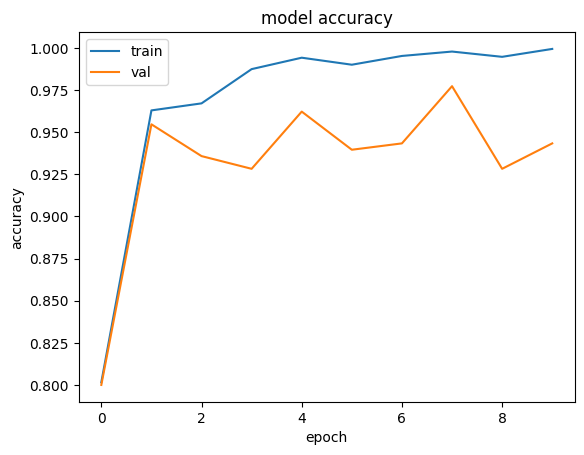

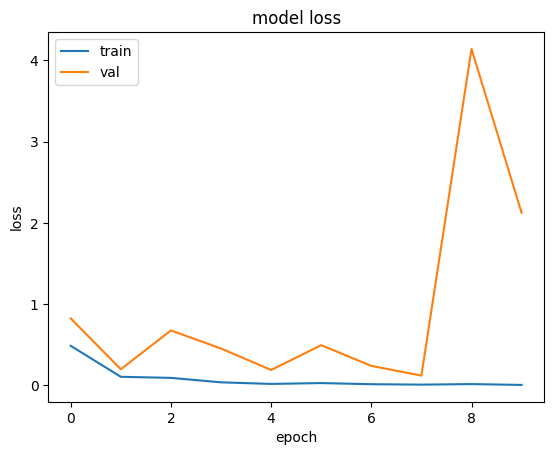

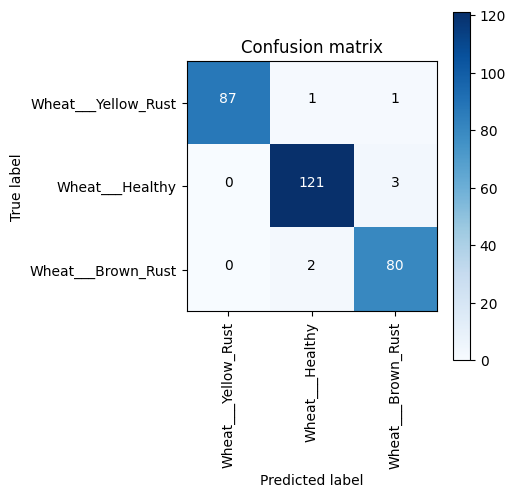

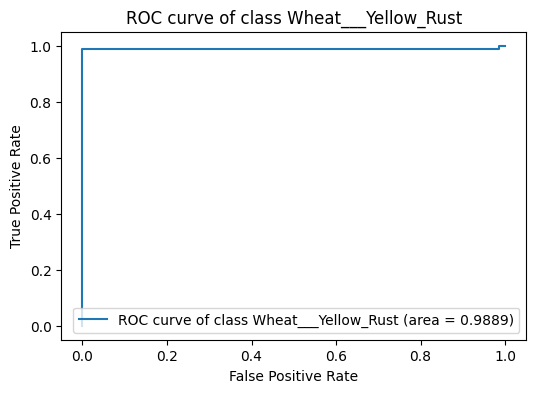

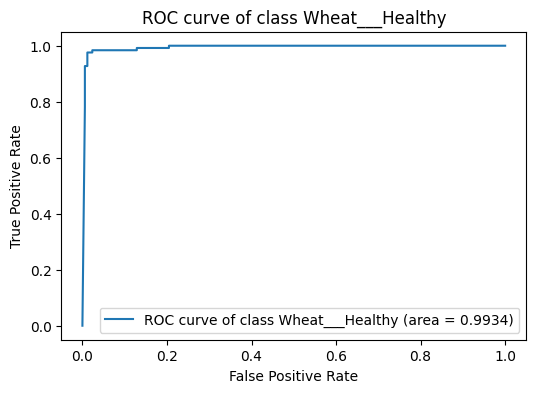

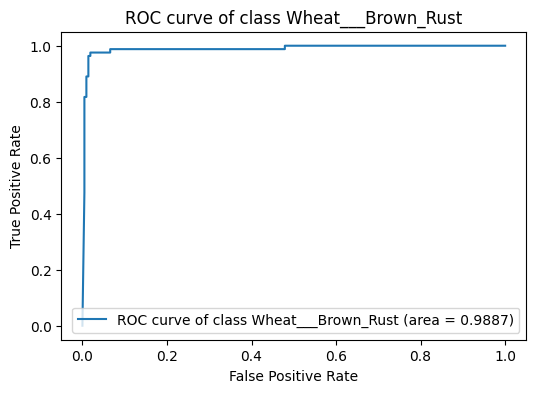

ROC AUC score: 0.9903470148298229
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
120/120 [==============================] - 64s 158ms/step - loss: 0.5255 - accuracy: 0.7891 - val_loss: 3.2374 - val_accuracy: 0.4830
Epoch 2/10
120/120 [==============================] - 15s 123ms/step - loss: 0.1384 - accuracy: 0.9557 - val_loss: 0.4933 - val_accuracy: 0.8566
Epoch 3/10
120/120 [==============================] - 15s 123ms/step - loss: 0.0901 - accuracy: 0.9708 - val_loss: 0.1482 - val_accuracy: 0.9509
Epoch 4/10
120/120 [==============================] - 15s 123ms/step - loss: 0.1595 - accuracy: 0.9526 - val_loss: 0.0546 - val_accuracy: 0.9736
Epoch 5/10
120/120 [==============================] - 15s 122ms/step - loss: 0.0934 - accuracy: 0.9745 - val_loss: 0.1190 - val_accuracy: 0.9887
Epoch 6/10
120/120 [==============================] - 15s 123ms/step - loss: 0.0763 - accuracy: 0.9750 - val_loss: 0.0473 - val_accuracy: 0.9962

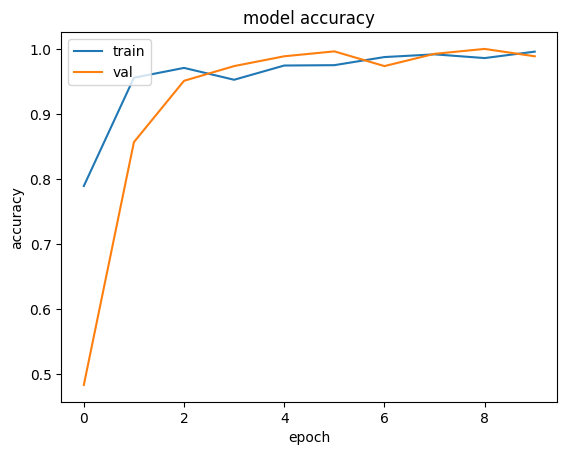

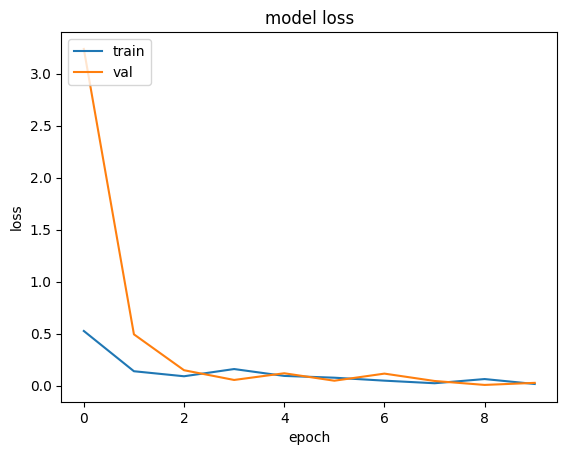

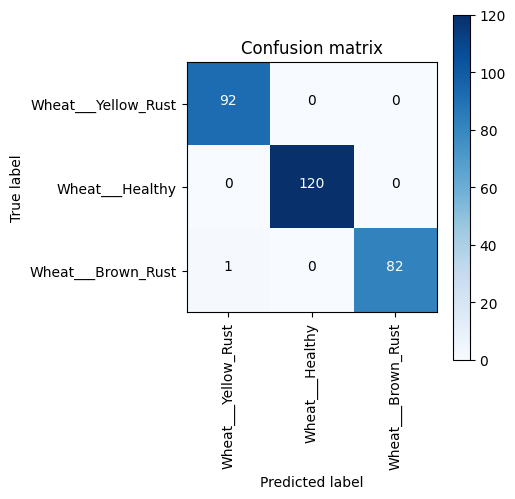

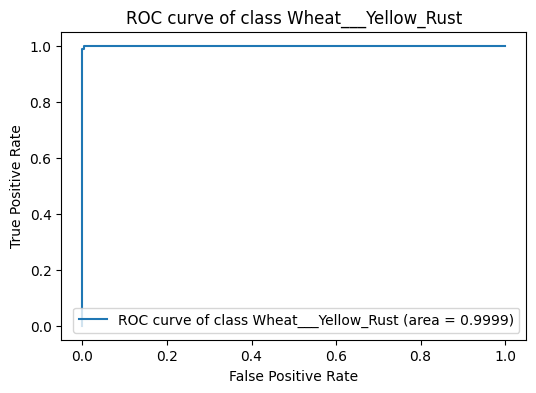

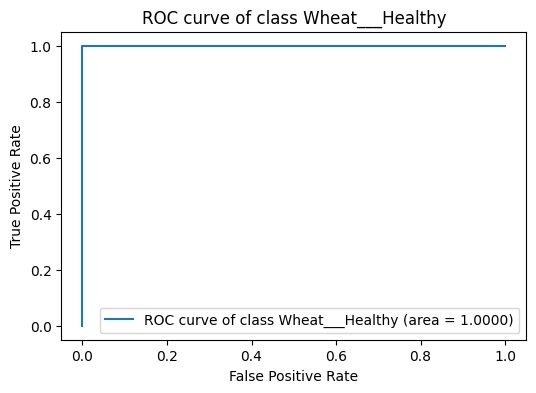

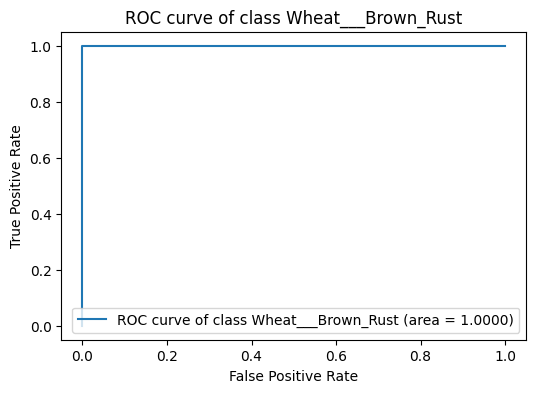

ROC AUC score: 0.9999821517812523
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
120/120 [==============================] - 65s 153ms/step - loss: 0.4640 - accuracy: 0.8208 - val_loss: 1.5339 - val_accuracy: 0.5547
Epoch 2/10
120/120 [==============================] - 17s 139ms/step - loss: 0.0885 - accuracy: 0.9713 - val_loss: 2.7696 - val_accuracy: 0.7962
Epoch 3/10
120/120 [==============================] - 15s 125ms/step - loss: 0.0707 - accuracy: 0.9771 - val_loss: 0.2128 - val_accuracy: 0.9585
Epoch 4/10
120/120 [==============================] - 15s 123ms/step - loss: 0.0280 - accuracy: 0.9901 - val_loss: 0.0537 - val_accuracy: 0.9887
Epoch 5/10
120/120 [==============================] - 15s 124ms/step - loss: 0.0480 - accuracy: 0.9828 - val_loss: 0.1231 - val_accuracy: 0.9736
Epoch 6/10
120/120 [==============================] - 15s 123ms/step - loss: 0.0173 - accuracy: 0.9958 - val_loss: 0.1897 - val_accuracy: 0.9358

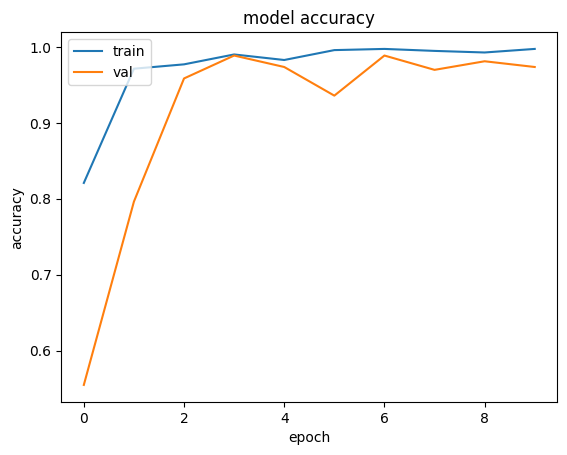

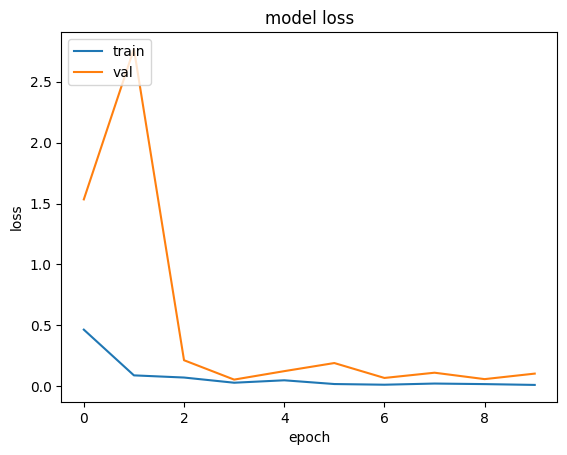

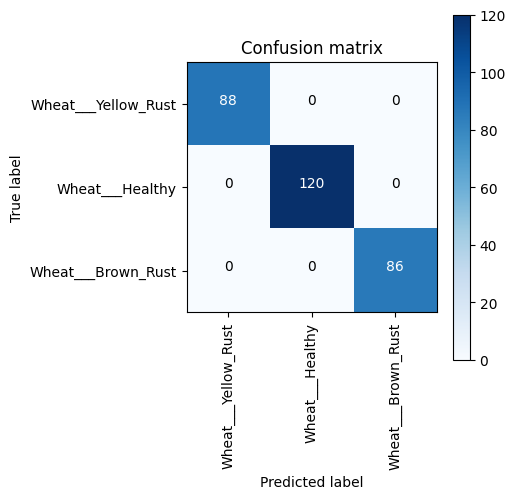

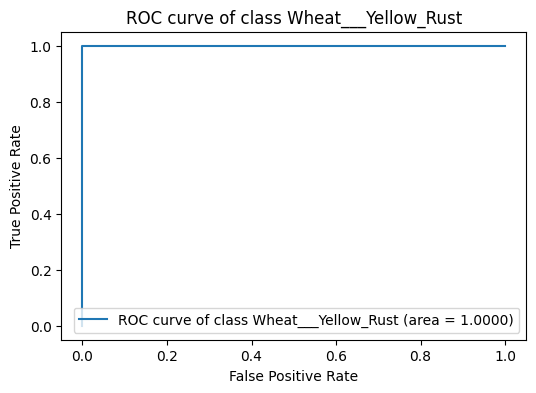

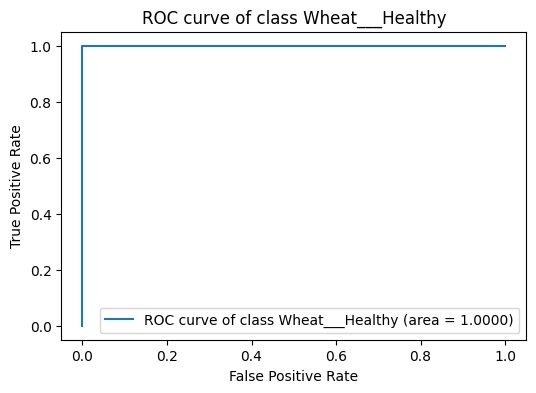

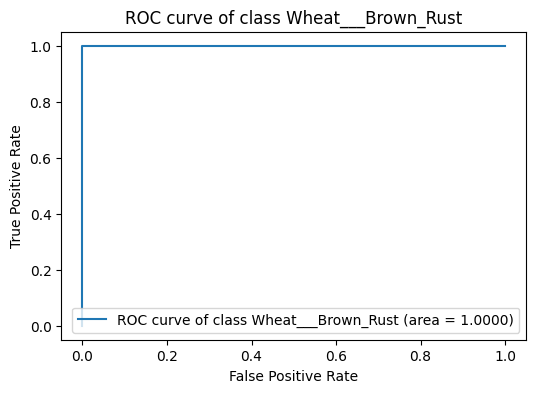

ROC AUC score: 1.0
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
120/120 [==============================] - 65s 155ms/step - loss: 0.4280 - accuracy: 0.8318 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 2/10
120/120 [==============================] - 15s 124ms/step - loss: 0.1400 - accuracy: 0.9552 - val_loss: 0.2555 - val_accuracy: 0.9245
Epoch 3/10
120/120 [==============================] - 15s 125ms/step - loss: 0.0960 - accuracy: 0.9786 - val_loss: 0.2281 - val_accuracy: 0.9321
Epoch 4/10
120/120 [==============================] - 15s 124ms/step - loss: 0.0359 - accuracy: 0.9906 - val_loss: 0.0393 - val_accuracy: 0.9925
Epoch 5/10
120/120 [==============================] - 15s 125ms/step - loss: 0.0142 - accuracy: 0.9948 - val_loss: 0.1446 - val_accuracy: 0.9623
Epoch 6/10
120/120 [==============================] - 15s 126ms/step - loss: 0.0286 - accuracy: 0.9932 - val_loss: 0.0461 - val_accuracy: 0.9887
Epoch 7/10
120

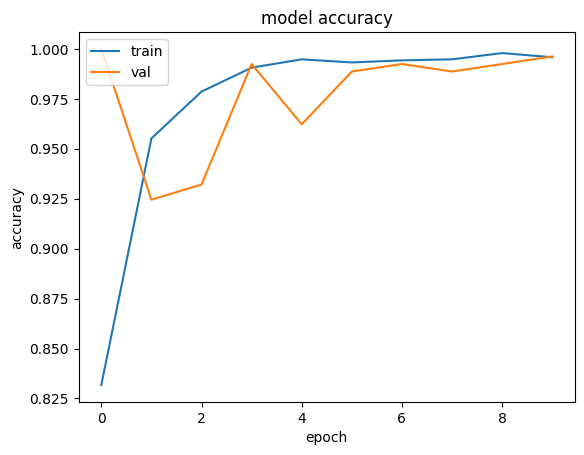

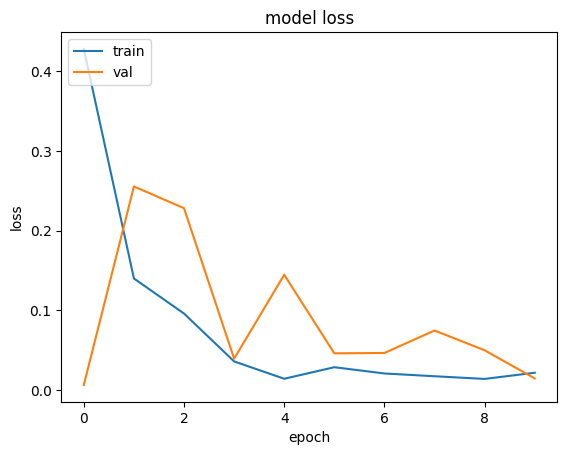

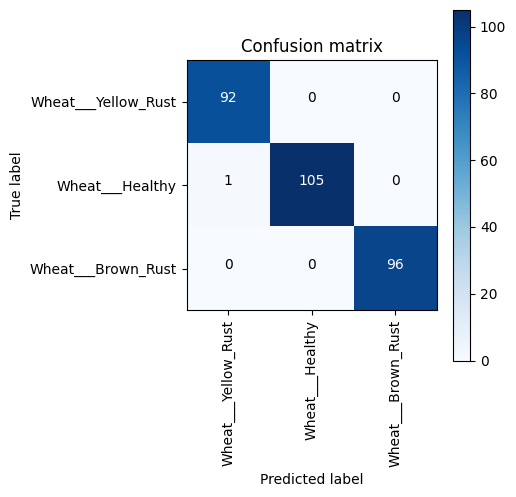

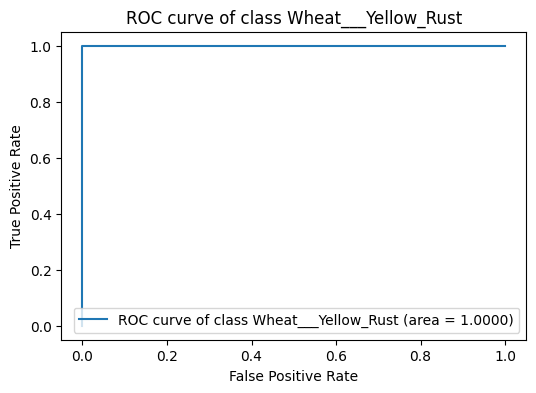

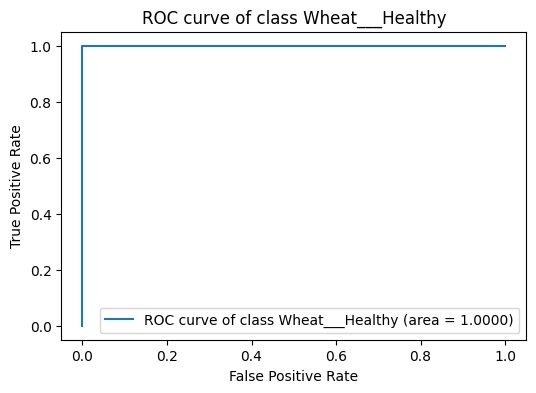

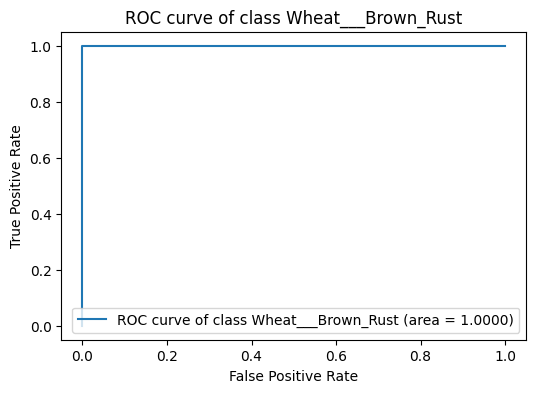

ROC AUC score: 1.0
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
120/120 [==============================] - 65s 157ms/step - loss: 0.4327 - accuracy: 0.8344 - val_loss: 0.1966 - val_accuracy: 0.9358
Epoch 2/10
120/120 [==============================] - 15s 127ms/step - loss: 0.0942 - accuracy: 0.9677 - val_loss: 0.2788 - val_accuracy: 0.9283
Epoch 3/10
120/120 [==============================] - 15s 127ms/step - loss: 0.0478 - accuracy: 0.9838 - val_loss: 0.1841 - val_accuracy: 0.9321
Epoch 4/10
120/120 [==============================] - 15s 126ms/step - loss: 0.0438 - accuracy: 0.9838 - val_loss: 0.0619 - val_accuracy: 0.9774
Epoch 5/10
120/120 [==============================] - 15s 127ms/step - loss: 0.0411 - accuracy: 0.9849 - val_loss: 0.0606 - val_accuracy: 0.9811
Epoch 6/10
120/120 [==============================] - 15s 126ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.1082 - val_accuracy: 0.9698
Epoch 7/10
120

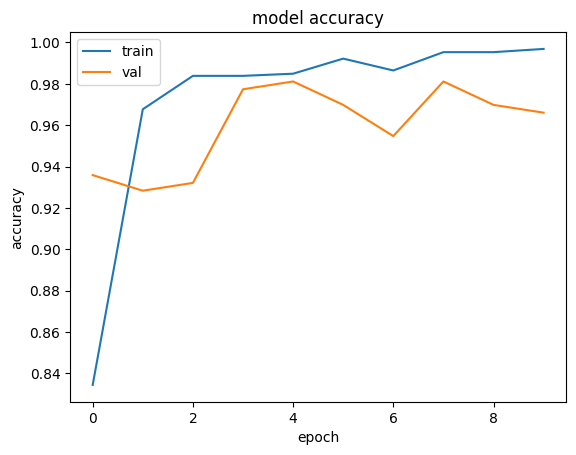

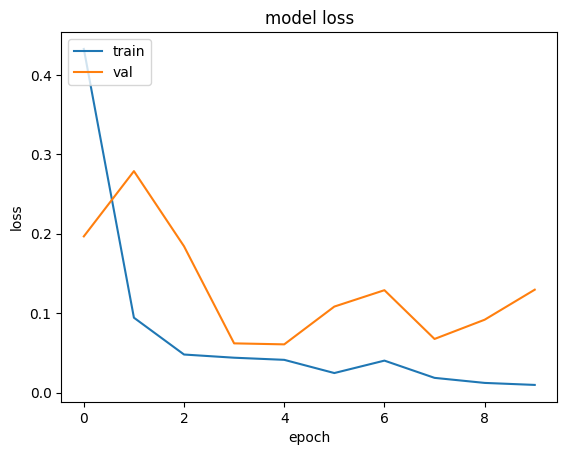

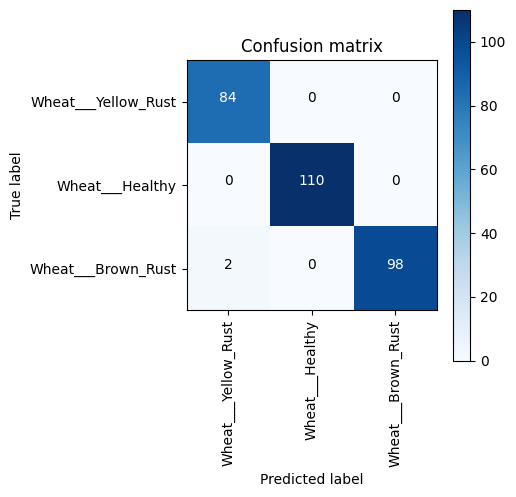

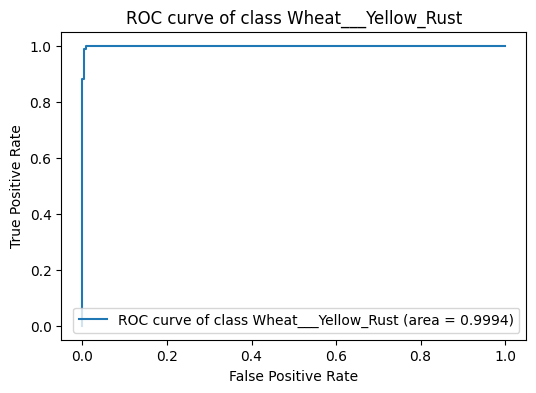

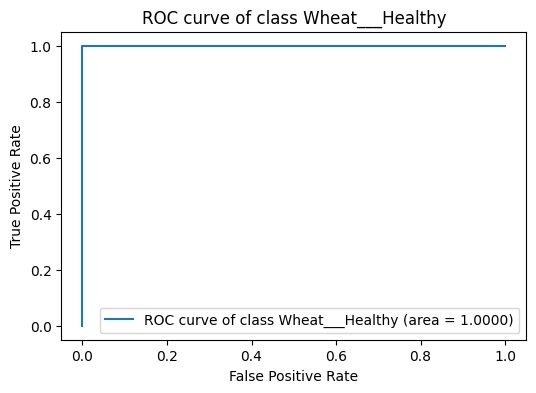

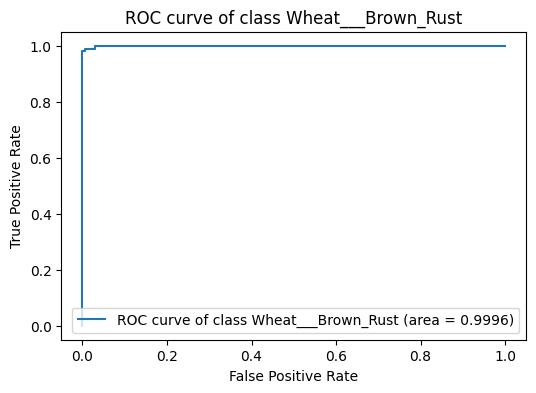

ROC AUC score: 0.999671864163764
------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/10
120/120 [==============================] - 65s 155ms/step - loss: 0.4791 - accuracy: 0.8021 - val_loss: 0.7375 - val_accuracy: 0.7509
Epoch 2/10
120/120 [==============================] - 15s 127ms/step - loss: 0.1333 - accuracy: 0.9594 - val_loss: 0.3350 - val_accuracy: 0.9057
Epoch 3/10
120/120 [==============================] - 15s 125ms/step - loss: 0.0367 - accuracy: 0.9891 - val_loss: 0.2293 - val_accuracy: 0.9170
Epoch 4/10
120/120 [==============================] - 15s 125ms/step - loss: 0.0311 - accuracy: 0.9885 - val_loss: 0.1515 - val_accuracy: 0.9585
Epoch 5/10
120/120 [==============================] - 15s 124ms/step - loss: 0.0334 - accuracy: 0.9901 - val_loss: 0.2303 - val_accuracy: 0.9623
Epoch 6/10
120/120 [==============================] - 15s 124ms/step - loss: 0.0387 - accuracy: 0.9911 - val_loss: 0.1192 - val_accuracy: 0.9736


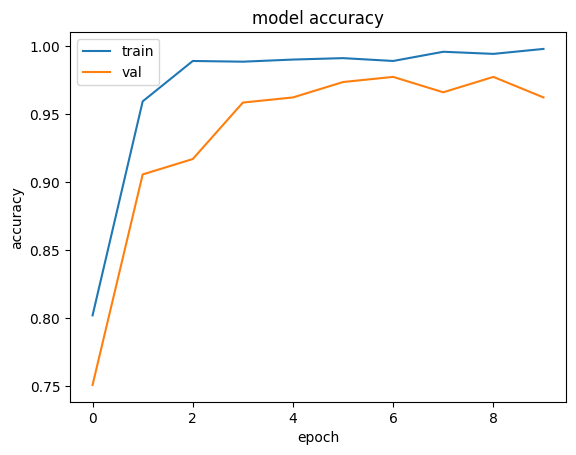

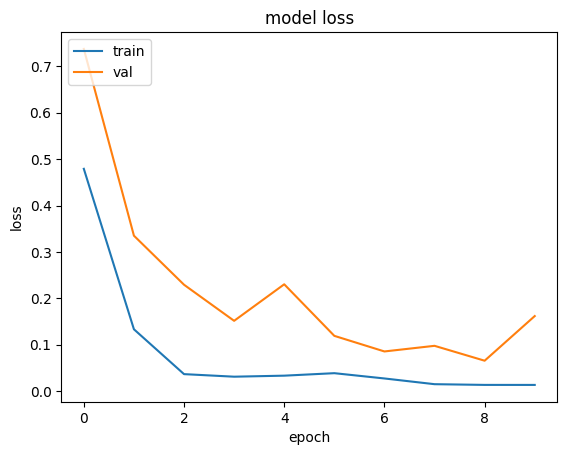

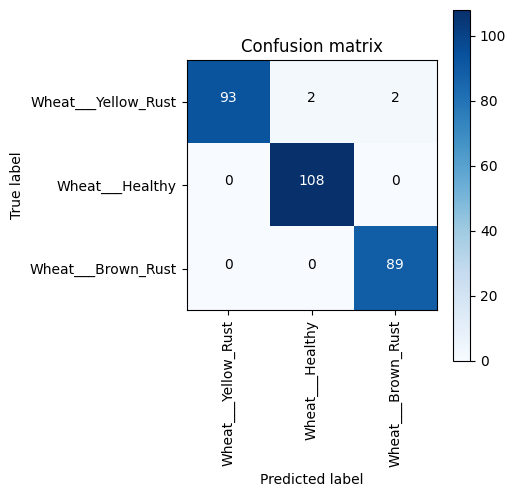

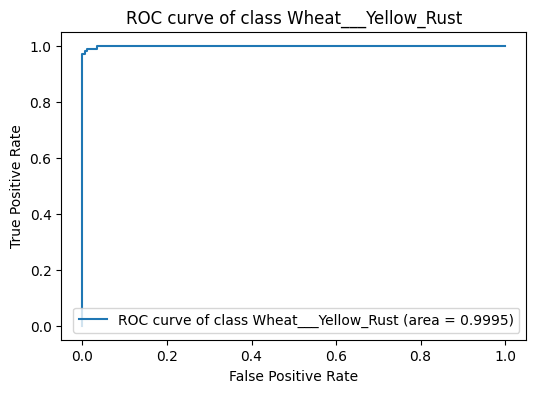

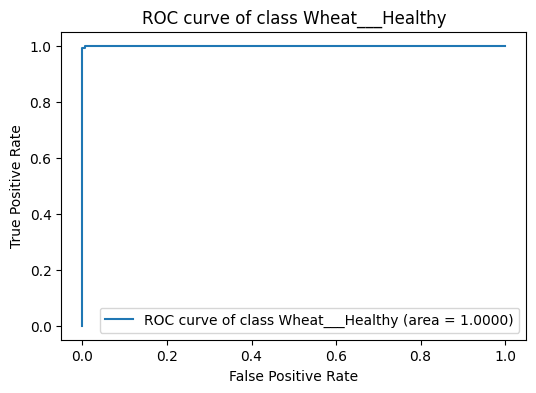

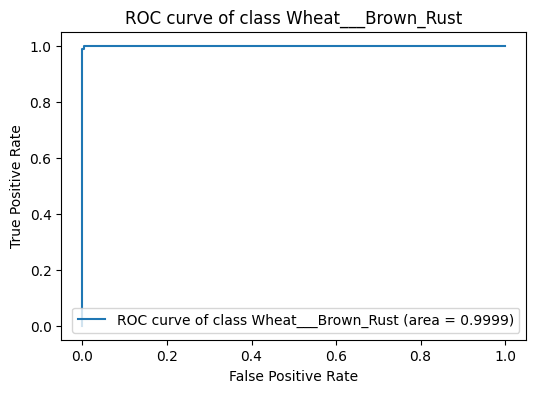

ROC AUC score: 0.9997906986258426
------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/10
120/120 [==============================] - 65s 155ms/step - loss: 0.4700 - accuracy: 0.8062 - val_loss: 2.7556 - val_accuracy: 0.4830
Epoch 2/10
120/120 [==============================] - 15s 124ms/step - loss: 0.1525 - accuracy: 0.9526 - val_loss: 0.2358 - val_accuracy: 0.9434
Epoch 3/10
120/120 [==============================] - 15s 127ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.2246 - val_accuracy: 0.9245
Epoch 4/10
120/120 [==============================] - 15s 127ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.4266 - val_accuracy: 0.8717
Epoch 5/10
120/120 [==============================] - 15s 126ms/step - loss: 0.0240 - accuracy: 0.9937 - val_loss: 0.0956 - val_accuracy: 0.9736
Epoch 6/10
120/120 [==============================] - 15s 126ms/step - loss: 0.0243 - accuracy: 0.9932 - val_loss: 0.2190 - val_accuracy: 0.9472

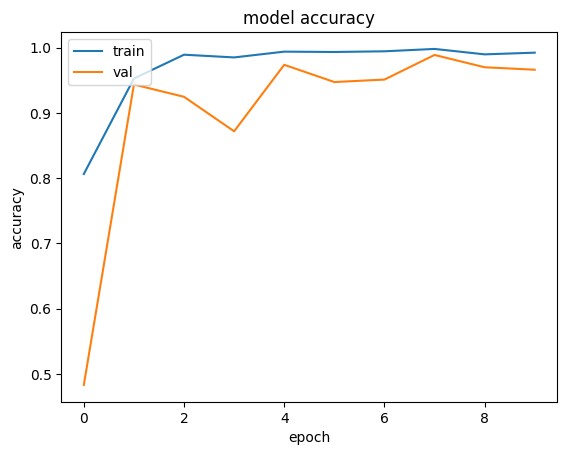

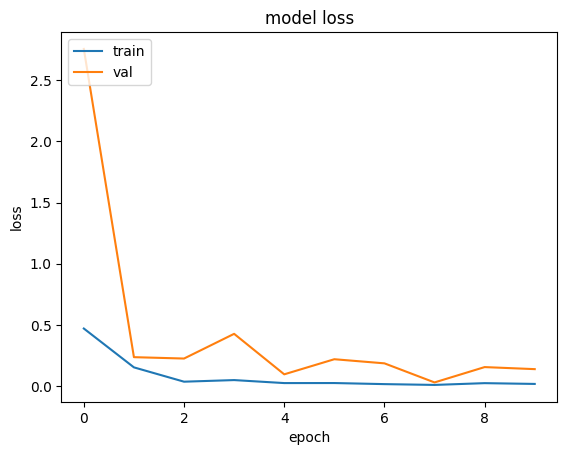

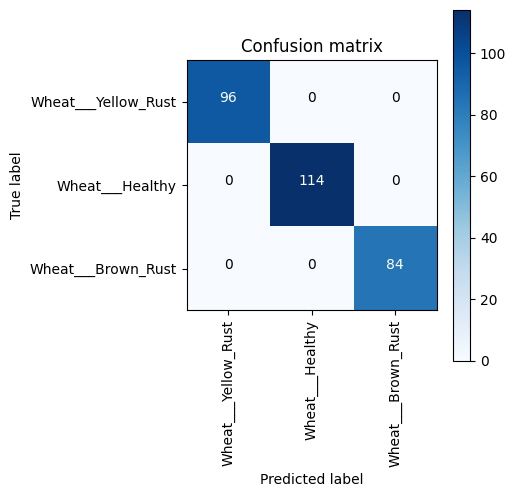

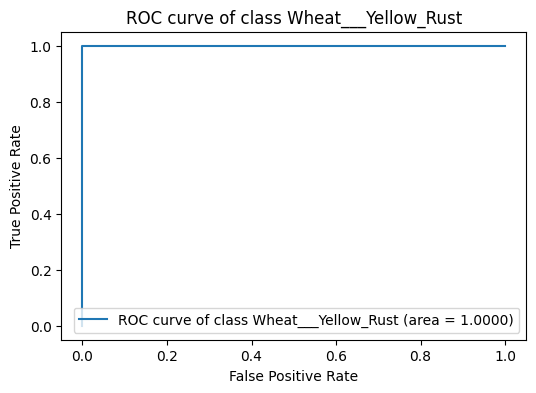

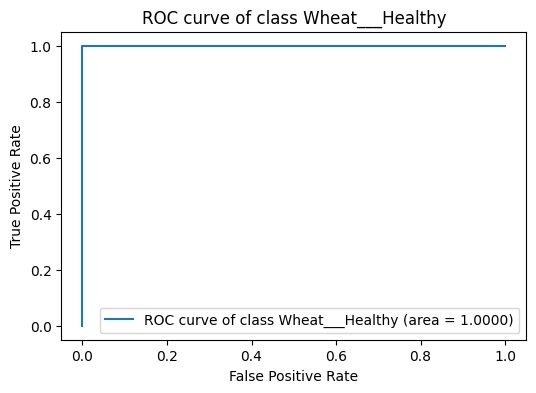

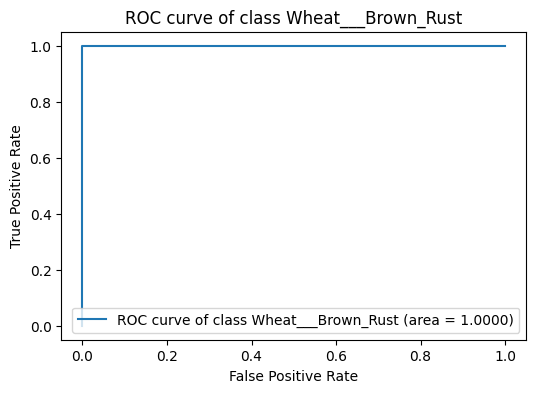

ROC AUC score: 1.0
------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/10
120/120 [==============================] - 66s 161ms/step - loss: 0.4999 - accuracy: 0.8115 - val_loss: 4.7459 - val_accuracy: 0.9321
Epoch 2/10
120/120 [==============================] - 15s 126ms/step - loss: 0.1206 - accuracy: 0.9646 - val_loss: 0.3289 - val_accuracy: 0.9132
Epoch 3/10
120/120 [==============================] - 15s 125ms/step - loss: 0.0974 - accuracy: 0.9745 - val_loss: 0.3290 - val_accuracy: 0.8943
Epoch 4/10
120/120 [==============================] - 15s 125ms/step - loss: 0.0652 - accuracy: 0.9807 - val_loss: 0.0726 - val_accuracy: 0.9849
Epoch 5/10
120/120 [==============================] - 15s 126ms/step - loss: 0.0471 - accuracy: 0.9838 - val_loss: 0.2471 - val_accuracy: 0.9208
Epoch 6/10
120/120 [==============================] - 15s 125ms/step - loss: 0.0414 - accuracy: 0.9885 - val_loss: 0.0506 - val_accuracy: 0.9849
Epoch 7/10
120

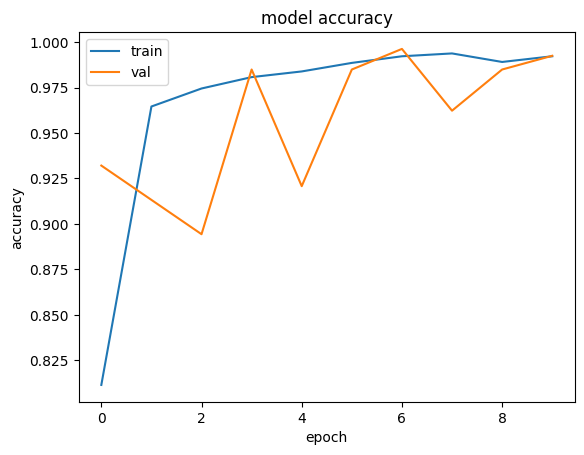

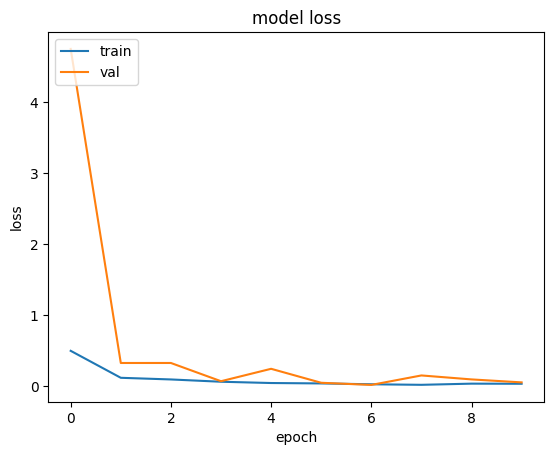

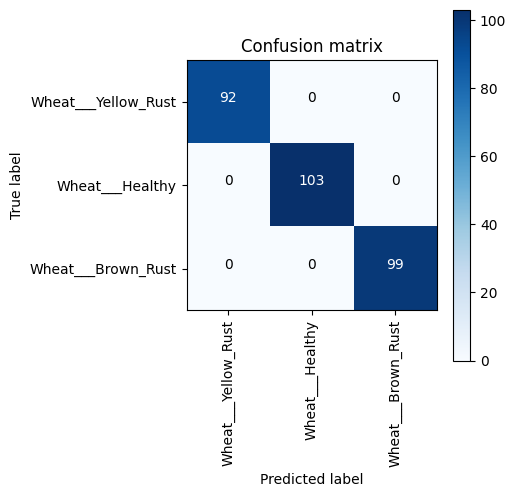

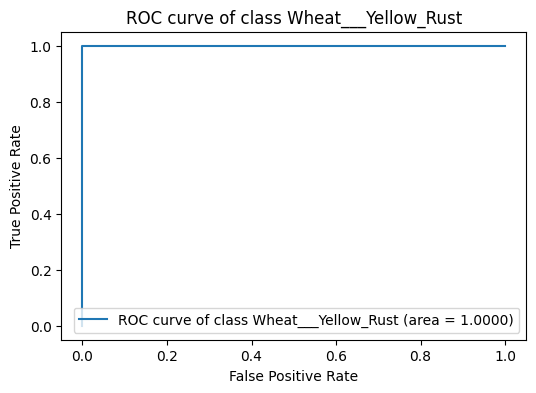

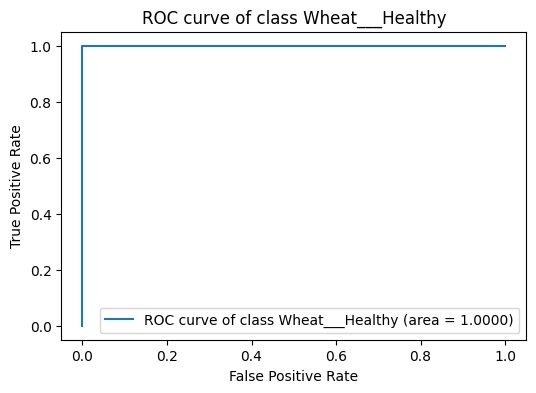

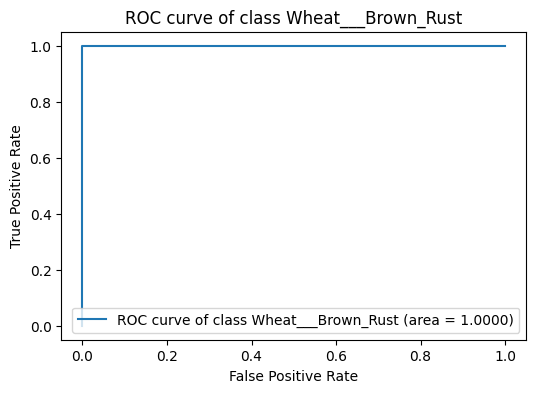

ROC AUC score: 1.0
------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/10
120/120 [==============================] - 67s 159ms/step - loss: 0.4821 - accuracy: 0.8130 - val_loss: 0.9644 - val_accuracy: 0.7849
Epoch 2/10
120/120 [==============================] - 15s 127ms/step - loss: 0.0831 - accuracy: 0.9745 - val_loss: 0.6339 - val_accuracy: 0.9208
Epoch 3/10
120/120 [==============================] - 15s 127ms/step - loss: 0.0655 - accuracy: 0.9797 - val_loss: 0.3756 - val_accuracy: 0.9358
Epoch 4/10
120/120 [==============================] - 15s 126ms/step - loss: 0.0518 - accuracy: 0.9849 - val_loss: 0.7416 - val_accuracy: 0.9472
Epoch 5/10
120/120 [==============================] - 15s 126ms/step - loss: 0.0231 - accuracy: 0.9943 - val_loss: 1.3073 - val_accuracy: 0.9358
Epoch 6/10
120/120 [==============================] - 15s 126ms/step - loss: 0.0242 - accuracy: 0.9917 - val_loss: 1.5865 - val_accuracy: 0.9434
Epoch 7/10
120

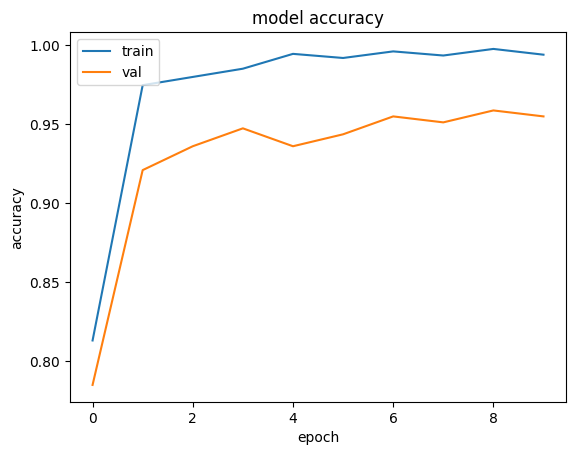

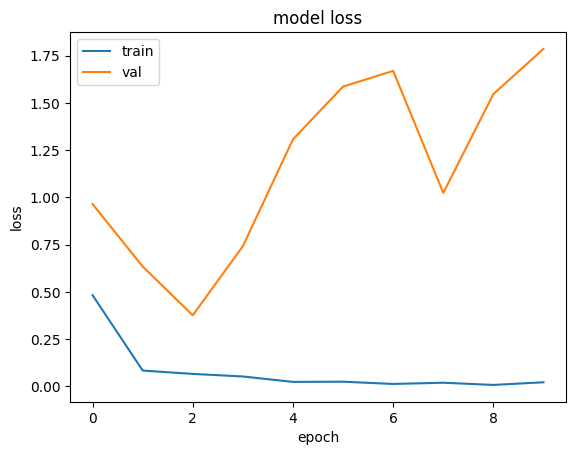

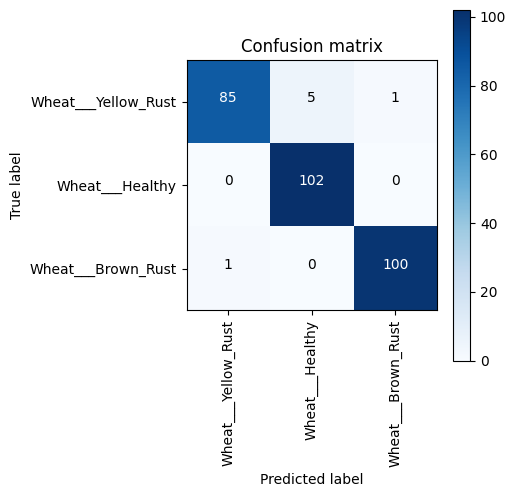

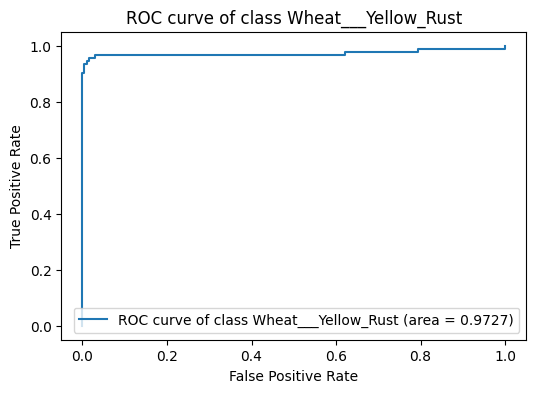

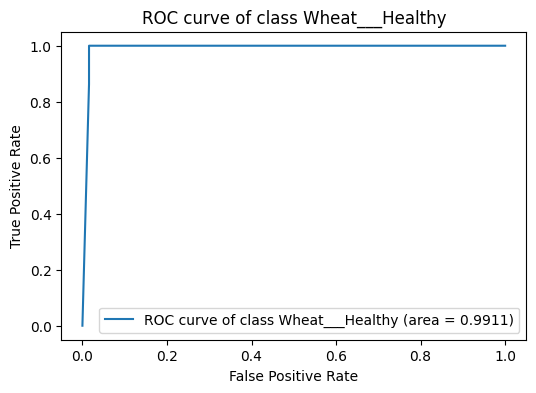

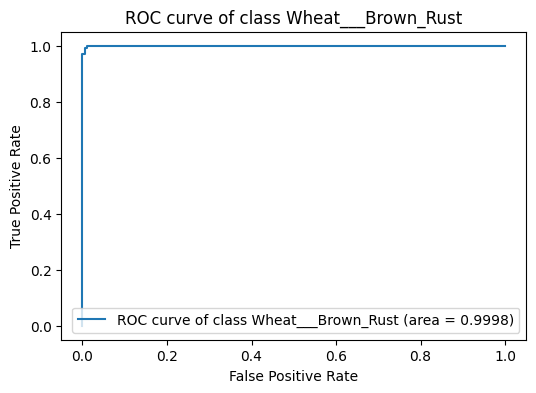

ROC AUC score: 0.9878756441484245
------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/10
120/120 [==============================] - 66s 156ms/step - loss: 0.6286 - accuracy: 0.7885 - val_loss: 0.6153 - val_accuracy: 0.8038
Epoch 2/10
120/120 [==============================] - 16s 130ms/step - loss: 0.1237 - accuracy: 0.9651 - val_loss: 0.0735 - val_accuracy: 0.9887
Epoch 3/10
120/120 [==============================] - 15s 127ms/step - loss: 0.0778 - accuracy: 0.9771 - val_loss: 0.0845 - val_accuracy: 0.9887
Epoch 4/10
120/120 [==============================] - 15s 127ms/step - loss: 0.0445 - accuracy: 0.9875 - val_loss: 0.0913 - val_accuracy: 0.9962
Epoch 5/10
120/120 [==============================] - 15s 127ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0817 - val_accuracy: 0.9849
Epoch 6/10
120/120 [==============================] - 15s 128ms/step - loss: 0.0187 - accuracy: 0.9932 - val_loss: 0.0495 - val_accuracy: 0.996

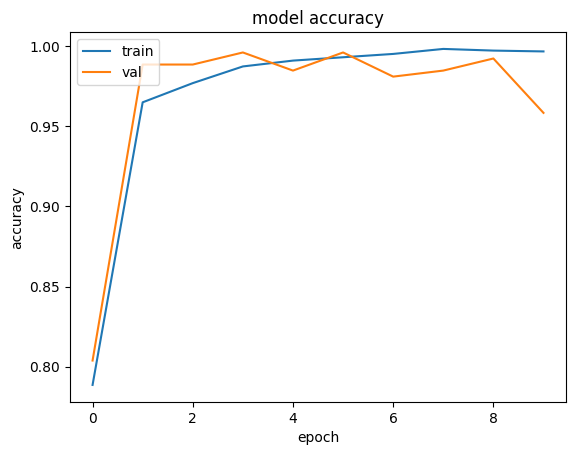

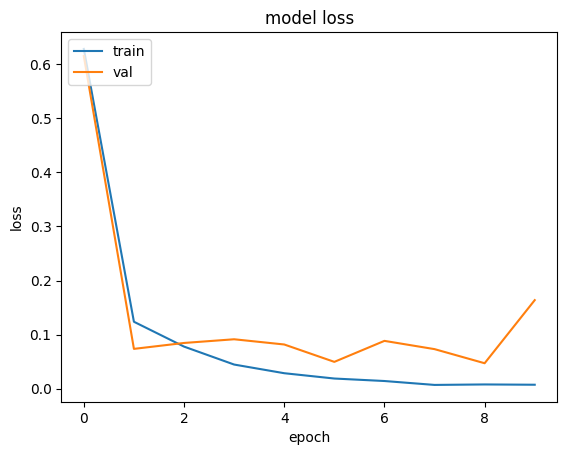

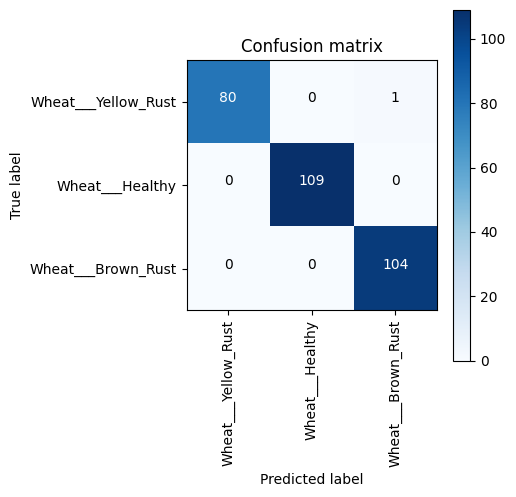

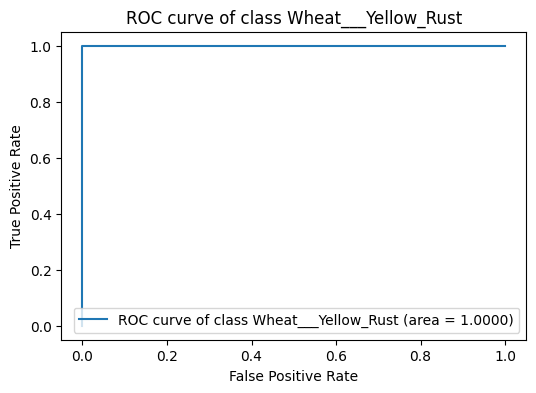

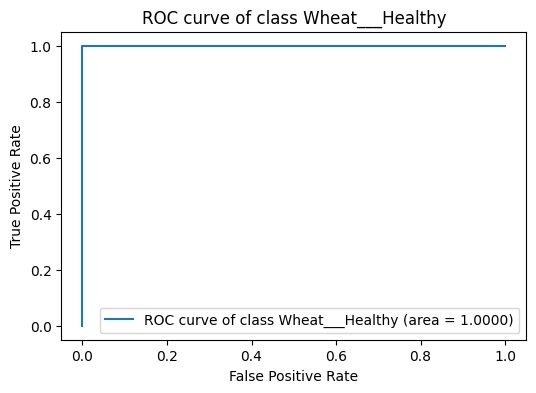

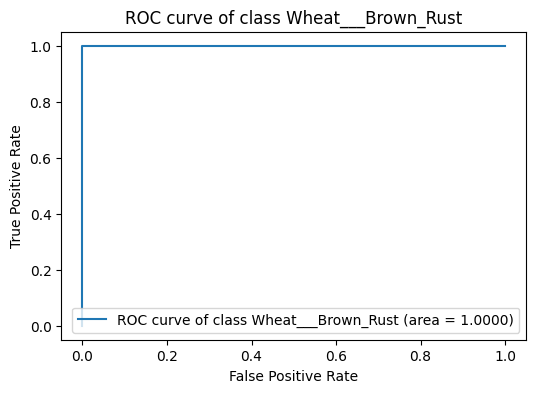

ROC AUC score: 1.0
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.38494548201560974 - Accuracy: 97.62712121009827%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.007055546157062054 - Accuracy: 99.6610164642334%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.004302780143916607 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.01641479879617691 - Accuracy: 99.65986609458923%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.026496993377804756 - Accuracy: 99.31972622871399%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.0508444607257843 - Accuracy: 98.63945841789246%
----------------------------------------------------------

In [ ]:
train_model_kfold(10, 'inceptionresnetv2', (224, 224)) # RESNET

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_454 (Conv2D)         (None, 221, 221, 64)      3136      
                                                                 
 batch_normalization_140 (Ba  (None, 221, 221, 64)     256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_210 (MaxPooli  (None, 110, 110, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_455 (Conv2D)         (None, 108, 108, 64)      36928     
                                                                 
 conv2d_456 (Conv2D)         (None, 106, 106, 64)      36928     
                                                                 
 conv2d_457 (Conv2D)         (None, 104, 104, 64)    

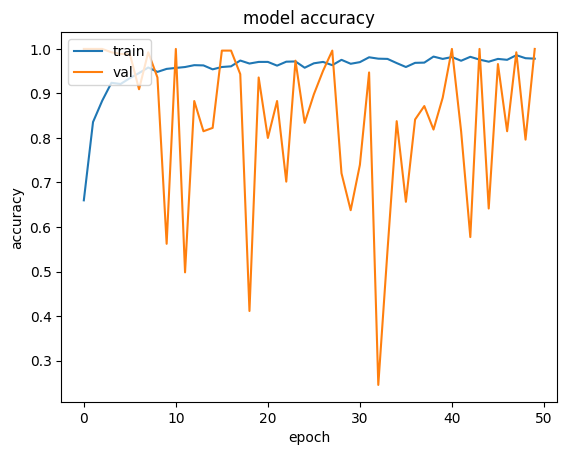

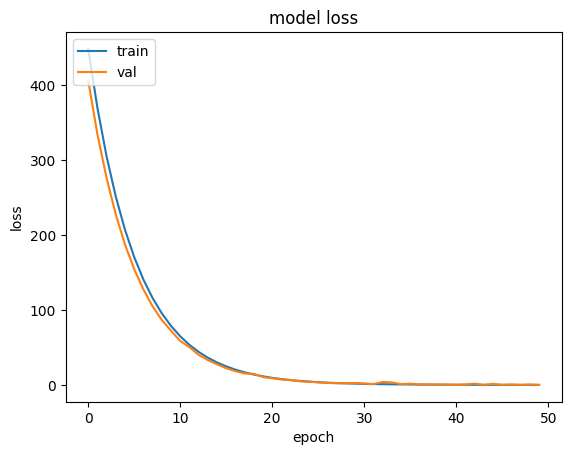

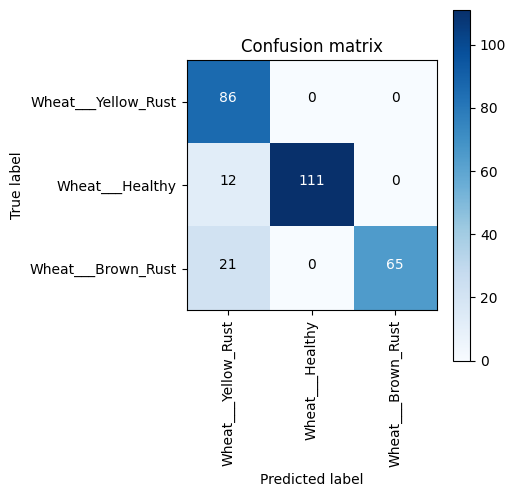

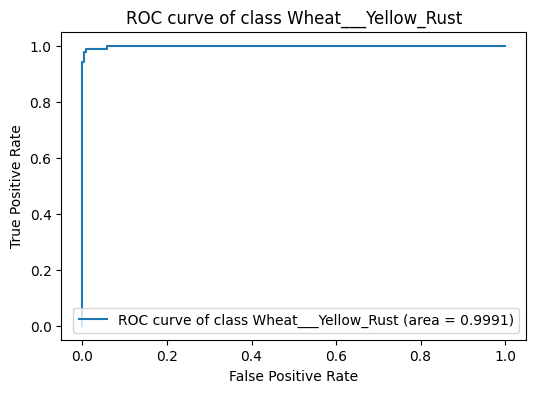

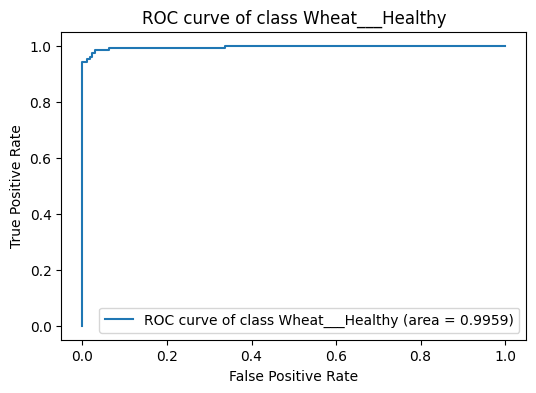

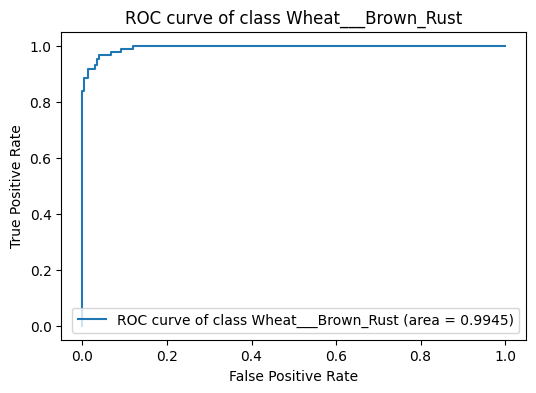

ROC AUC score: 0.9964779749611227
Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_461 (Conv2D)         (None, 221, 221, 64)      3136      
                                                                 
 batch_normalization_142 (Ba  (None, 221, 221, 64)     256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_213 (MaxPooli  (None, 110, 110, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_462 (Conv2D)         (None, 108, 108, 64)      36928     
                                                                 
 conv2d_463 (Conv2D)         (None, 106, 106, 64)      36928     
                                                                 
 conv2d_464 (Conv2D

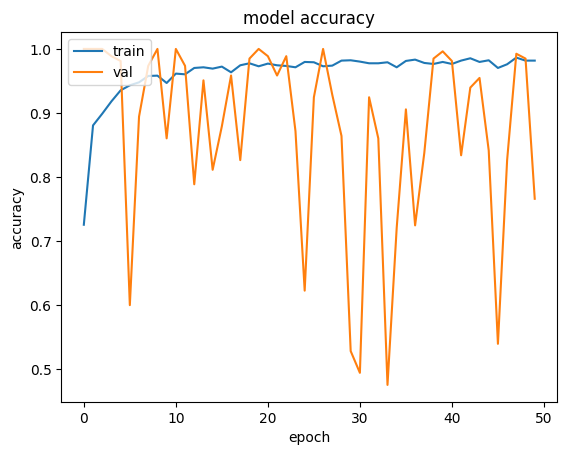

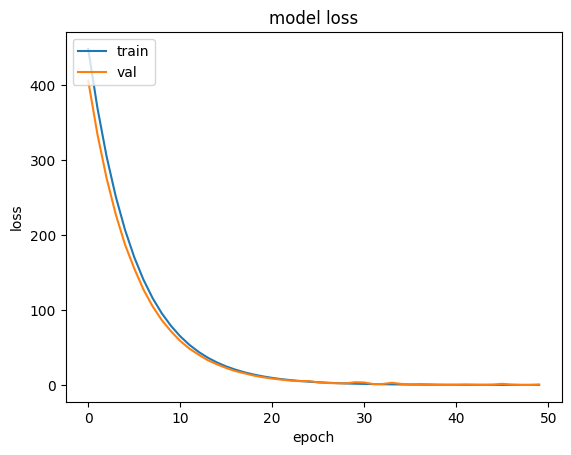

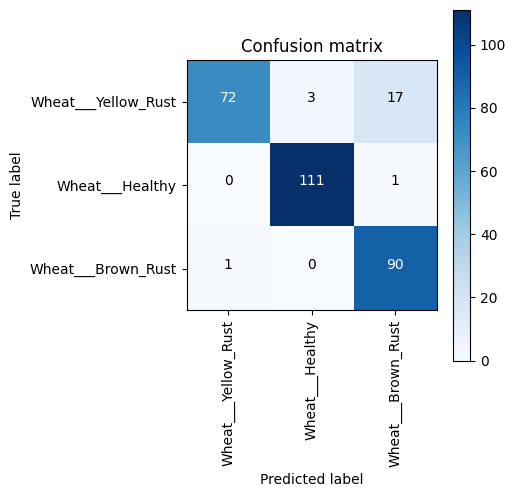

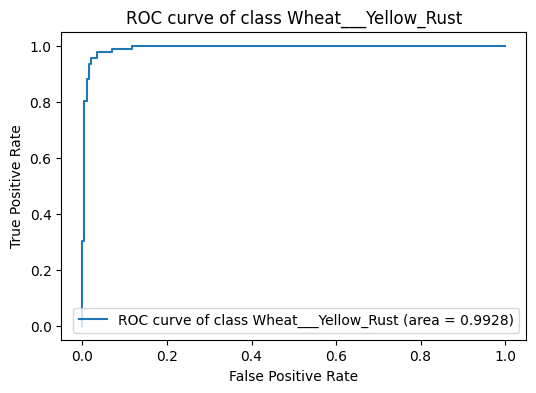

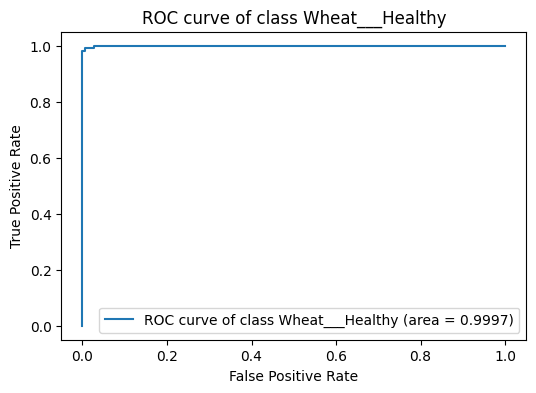

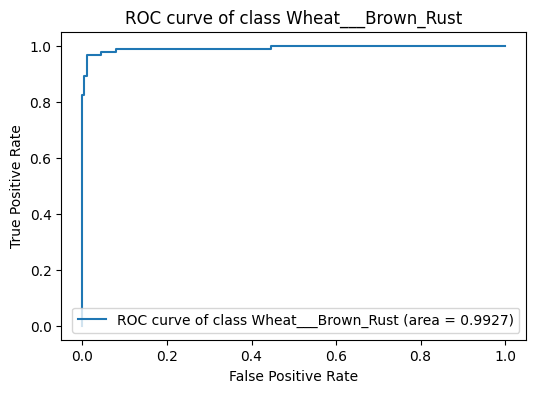

ROC AUC score: 0.9950509080114359
Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_468 (Conv2D)         (None, 221, 221, 64)      3136      
                                                                 
 batch_normalization_144 (Ba  (None, 221, 221, 64)     256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_216 (MaxPooli  (None, 110, 110, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_469 (Conv2D)         (None, 108, 108, 64)      36928     
                                                                 
 conv2d_470 (Conv2D)         (None, 106, 106, 64)      36928     
                                                                 
 conv2d_471 (Conv2D

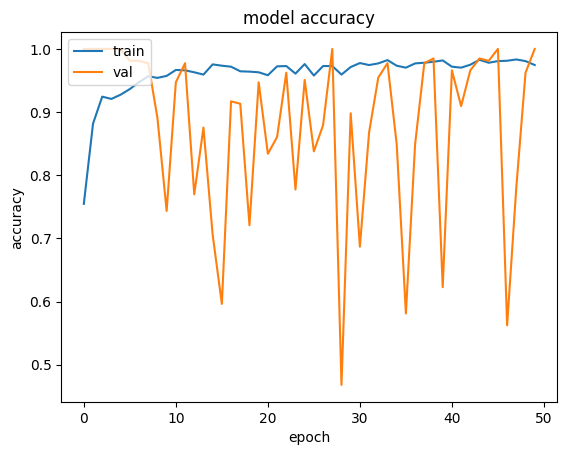

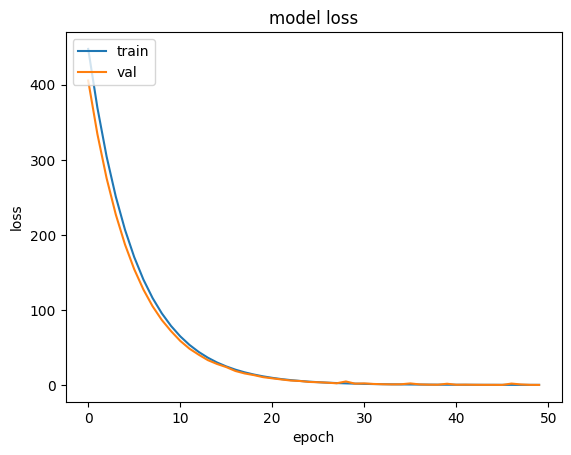

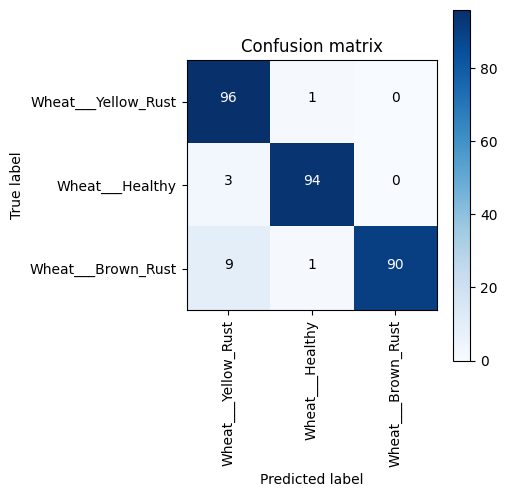

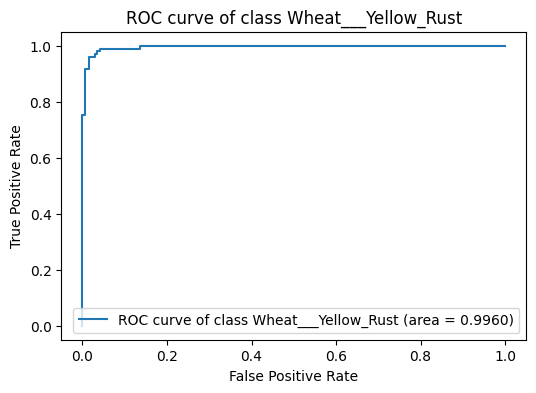

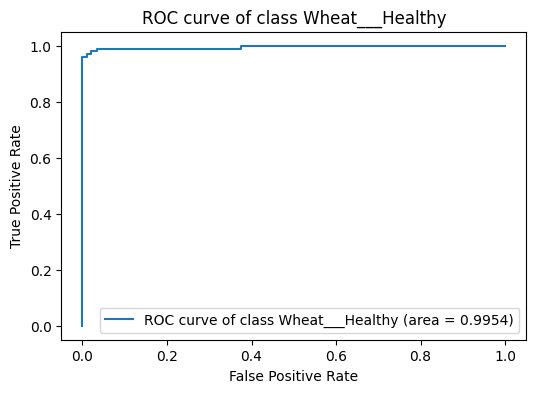

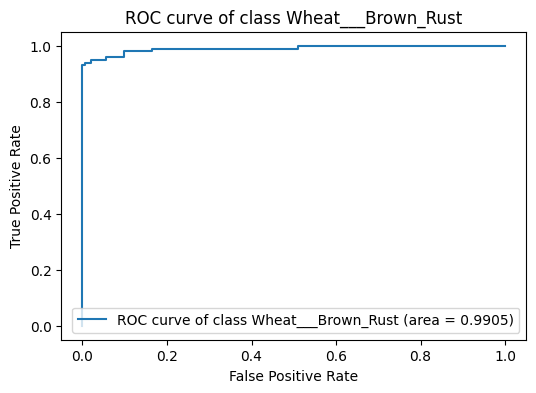

ROC AUC score: 0.99397796849652
Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_475 (Conv2D)         (None, 221, 221, 64)      3136      
                                                                 
 batch_normalization_146 (Ba  (None, 221, 221, 64)     256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_219 (MaxPooli  (None, 110, 110, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_476 (Conv2D)         (None, 108, 108, 64)      36928     
                                                                 
 conv2d_477 (Conv2D)         (None, 106, 106, 64)      36928     
                                                                 
 conv2d_478 (Conv2D) 

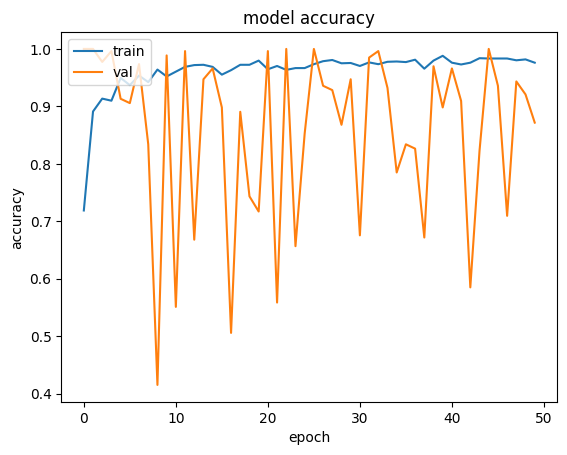

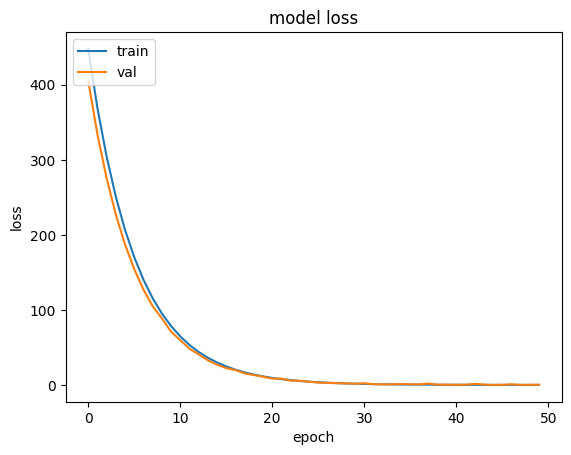

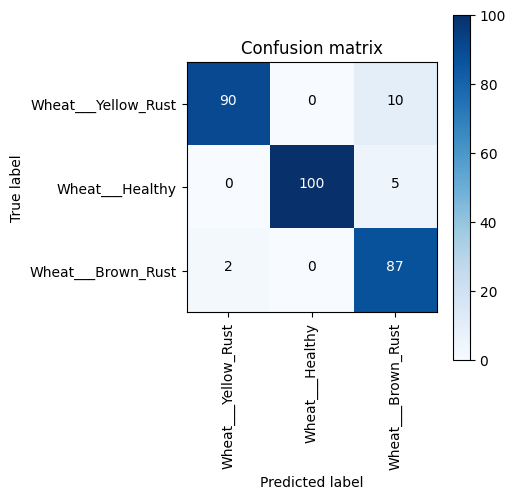

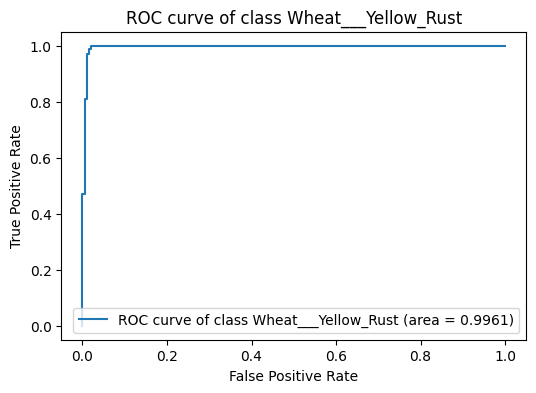

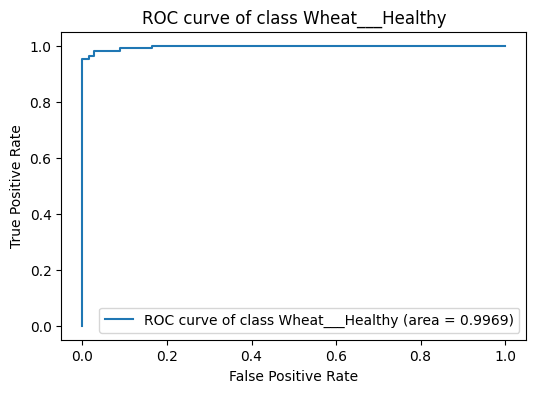

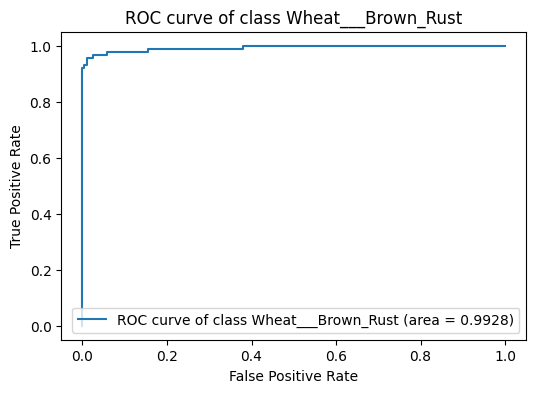

ROC AUC score: 0.9952579310799735
Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_482 (Conv2D)         (None, 221, 221, 64)      3136      
                                                                 
 batch_normalization_148 (Ba  (None, 221, 221, 64)     256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_222 (MaxPooli  (None, 110, 110, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_483 (Conv2D)         (None, 108, 108, 64)      36928     
                                                                 
 conv2d_484 (Conv2D)         (None, 106, 106, 64)      36928     
                                                                 
 conv2d_485 (Conv2D

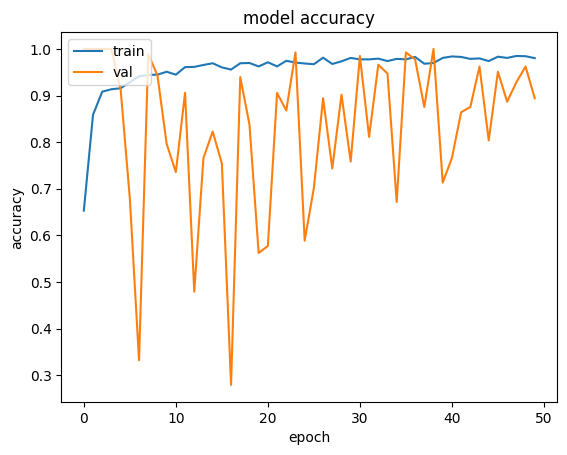

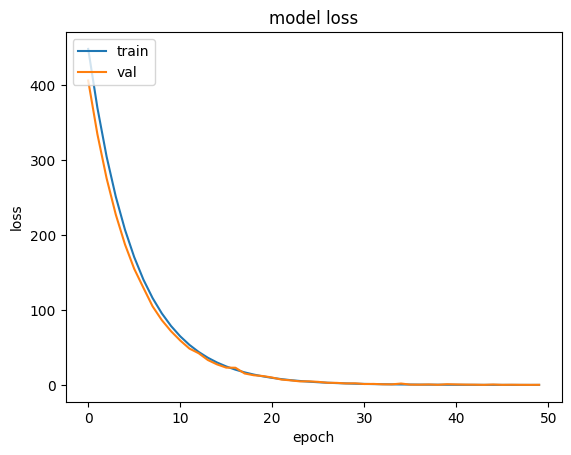

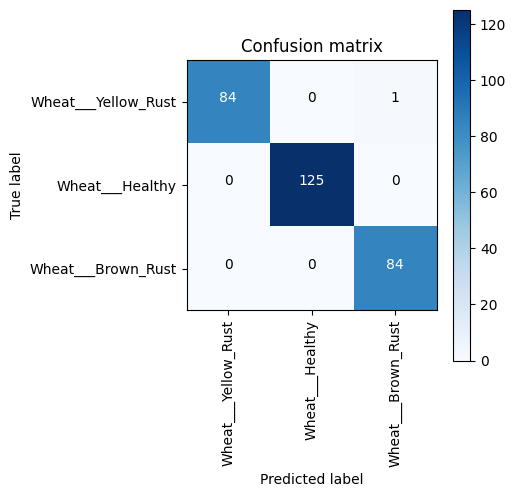

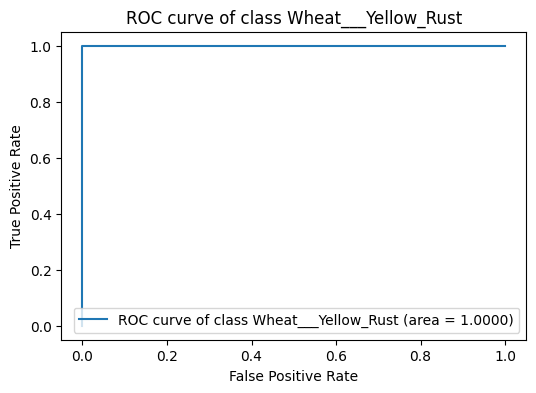

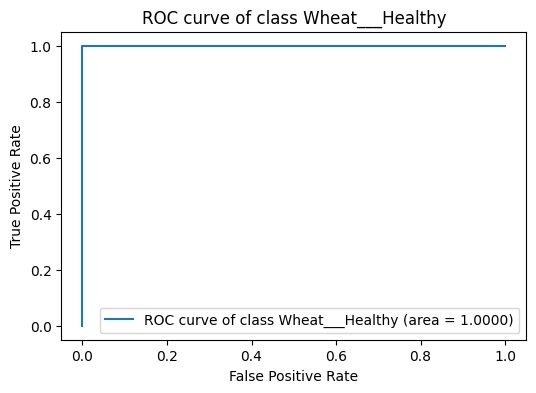

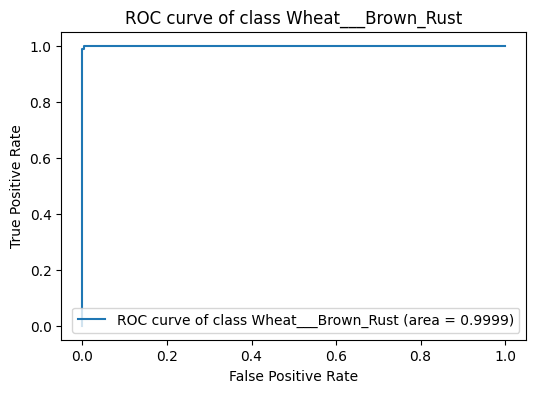

ROC AUC score: 0.9999811035525322
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_489 (Conv2D)         (None, 221, 221, 64)      3136      
                                                                 
 batch_normalization_150 (Ba  (None, 221, 221, 64)     256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_225 (MaxPooli  (None, 110, 110, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_490 (Conv2D)         (None, 108, 108, 64)      36928     
                                                                 
 conv2d_491 (Conv2D)         (None, 106, 106, 64)      36928     
                                                                 
 conv2d_492 (Conv2D

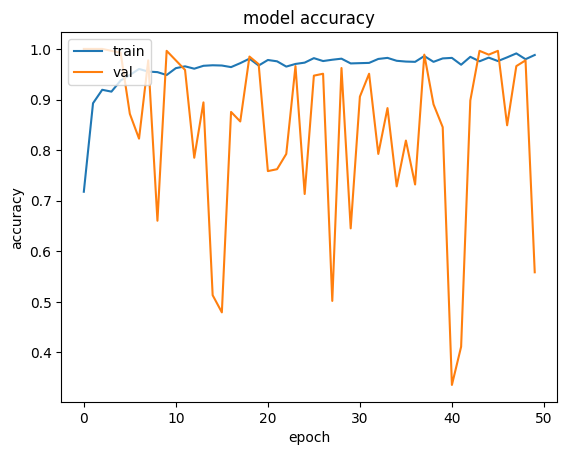

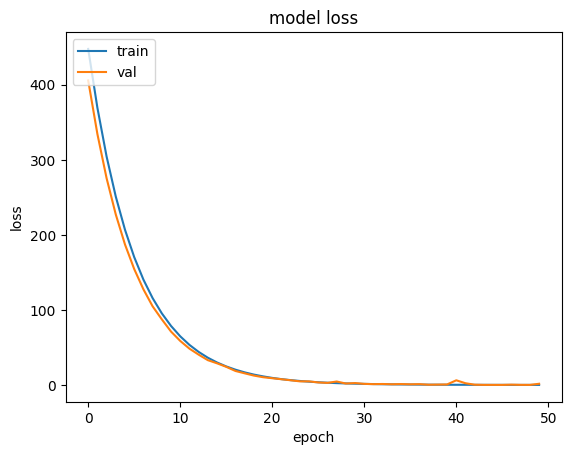

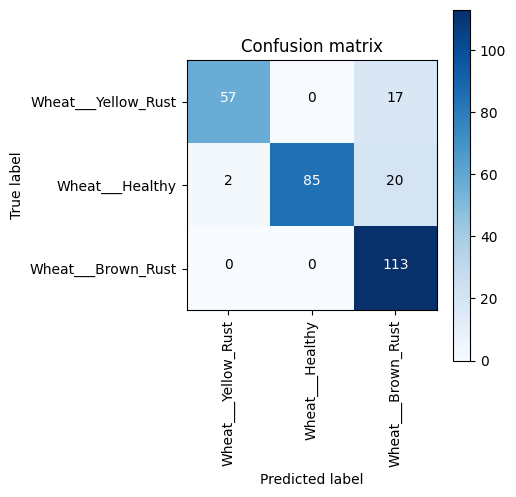

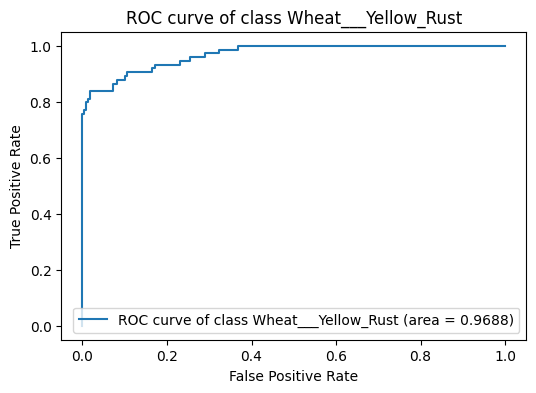

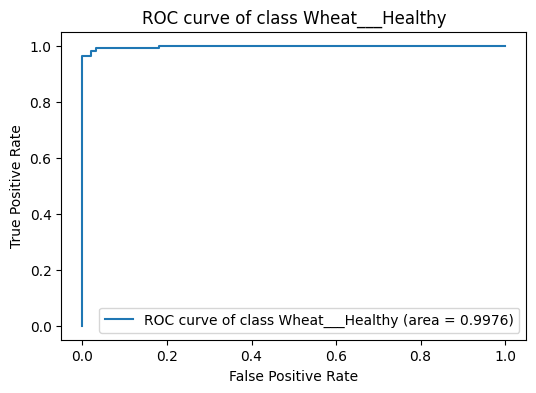

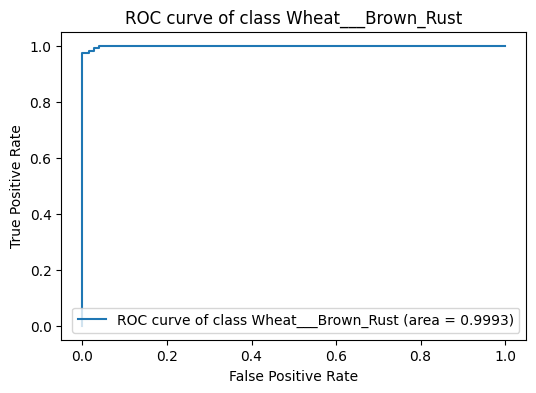

ROC AUC score: 0.9885545865217867
Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_496 (Conv2D)         (None, 221, 221, 64)      3136      
                                                                 
 batch_normalization_152 (Ba  (None, 221, 221, 64)     256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_228 (MaxPooli  (None, 110, 110, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_497 (Conv2D)         (None, 108, 108, 64)      36928     
                                                                 
 conv2d_498 (Conv2D)         (None, 106, 106, 64)      36928     
                                                                 
 conv2d_499 (Conv2D

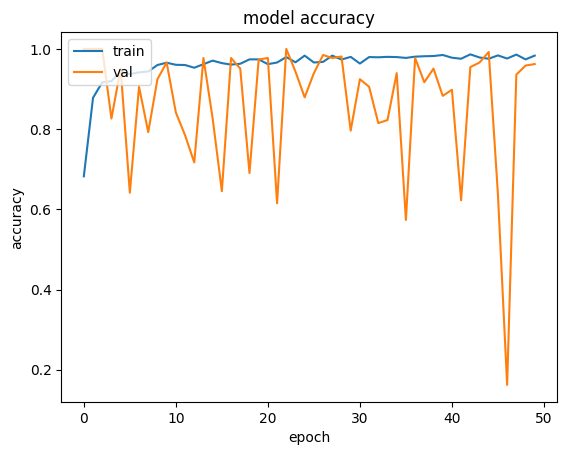

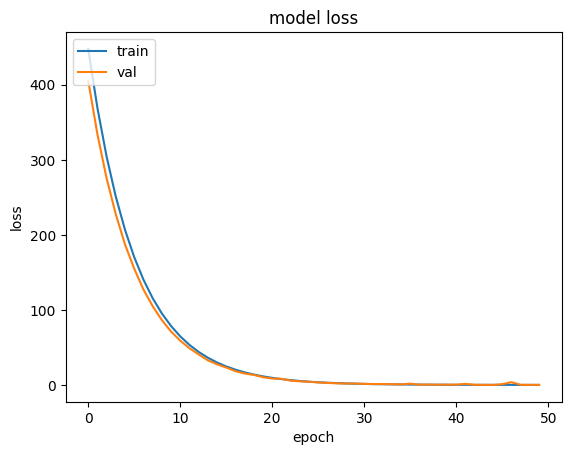

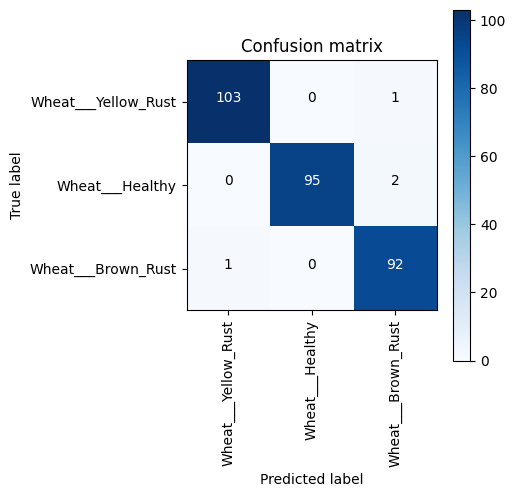

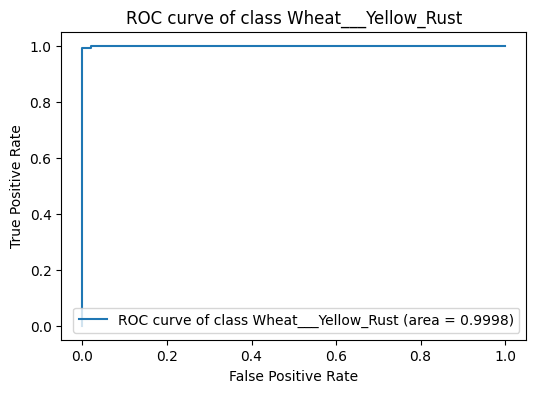

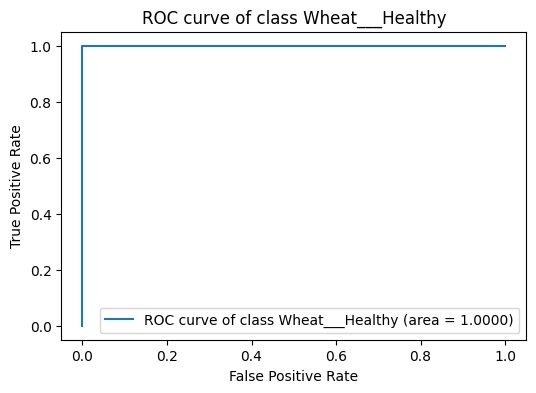

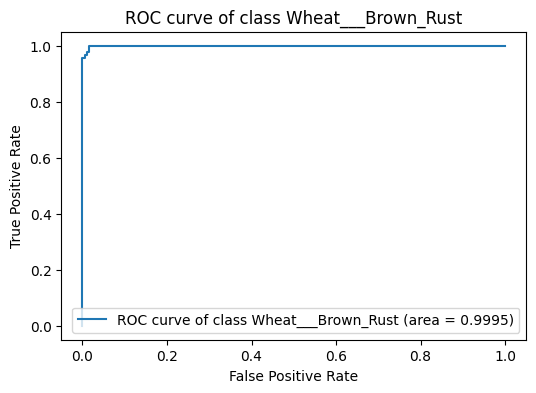

ROC AUC score: 0.9997720357335694
Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_503 (Conv2D)         (None, 221, 221, 64)      3136      
                                                                 
 batch_normalization_154 (Ba  (None, 221, 221, 64)     256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_231 (MaxPooli  (None, 110, 110, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_504 (Conv2D)         (None, 108, 108, 64)      36928     
                                                                 
 conv2d_505 (Conv2D)         (None, 106, 106, 64)      36928     
                                                                 
 conv2d_506 (Conv2D

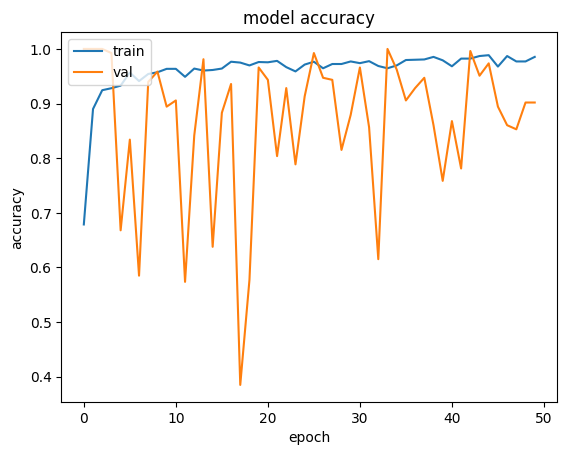

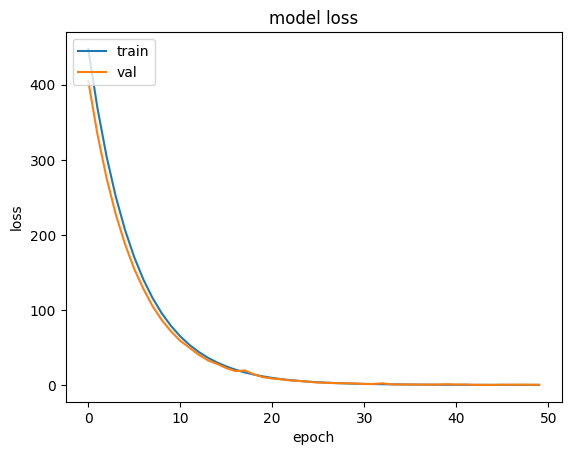

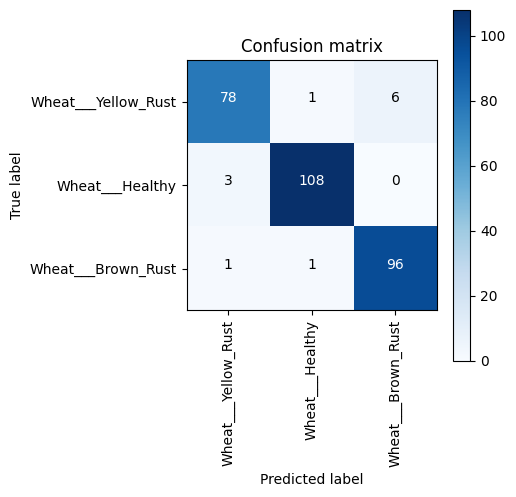

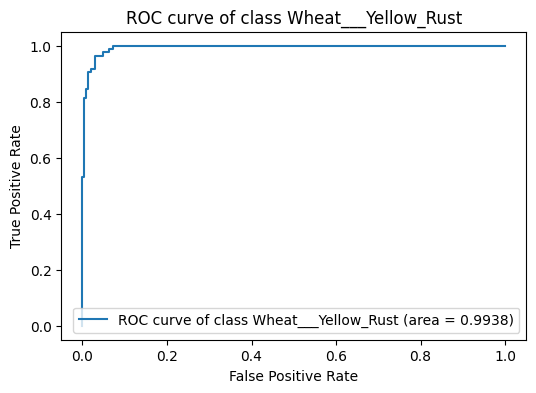

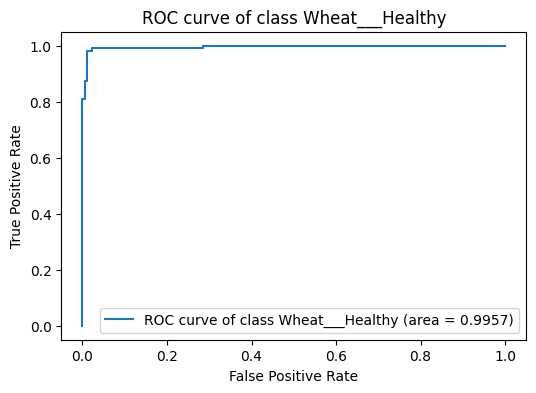

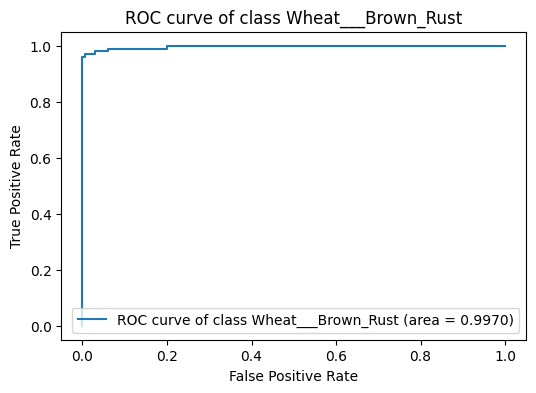

ROC AUC score: 0.9954830708012468
Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_510 (Conv2D)         (None, 221, 221, 64)      3136      
                                                                 
 batch_normalization_156 (Ba  (None, 221, 221, 64)     256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_234 (MaxPooli  (None, 110, 110, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_511 (Conv2D)         (None, 108, 108, 64)      36928     
                                                                 
 conv2d_512 (Conv2D)         (None, 106, 106, 64)      36928     
                                                                 
 conv2d_513 (Conv2D

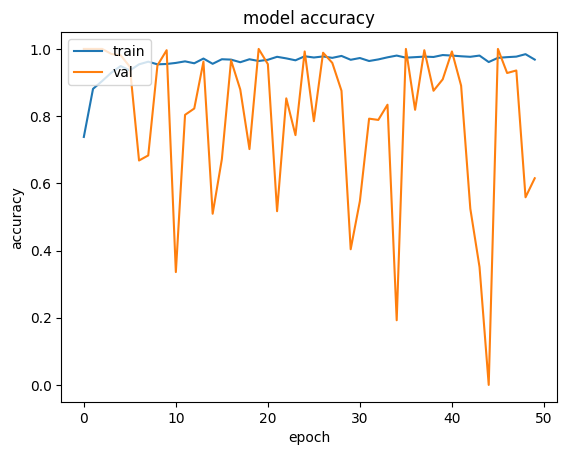

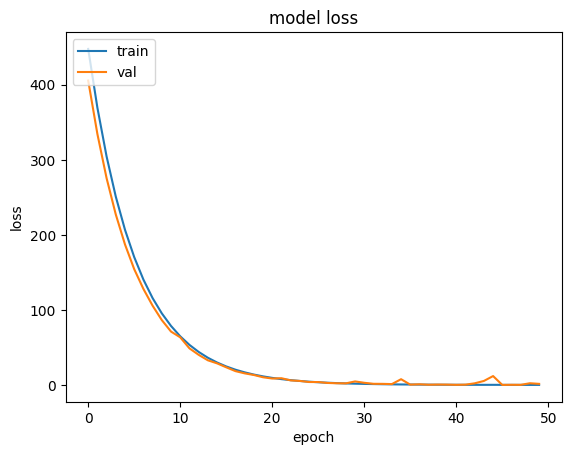

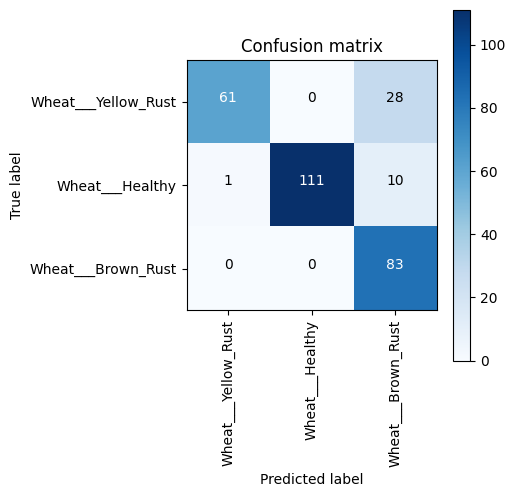

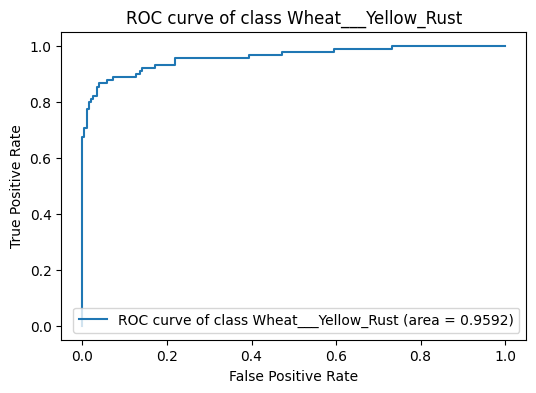

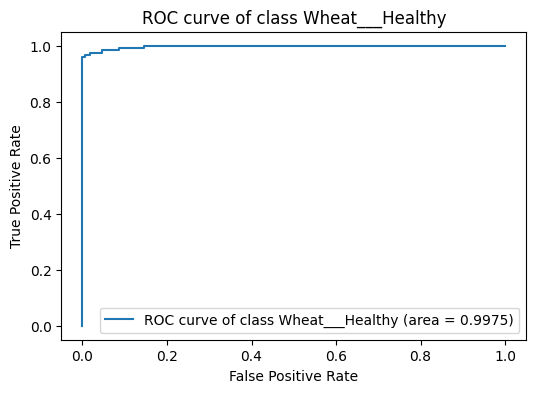

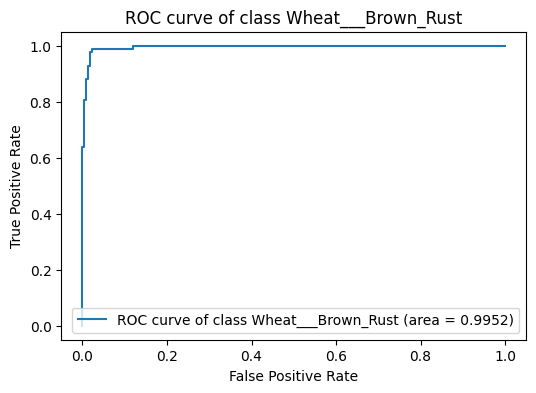

ROC AUC score: 0.9839823963693348
Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_517 (Conv2D)         (None, 221, 221, 64)      3136      
                                                                 
 batch_normalization_158 (Ba  (None, 221, 221, 64)     256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_237 (MaxPooli  (None, 110, 110, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_518 (Conv2D)         (None, 108, 108, 64)      36928     
                                                                 
 conv2d_519 (Conv2D)         (None, 106, 106, 64)      36928     
                                                                 
 conv2d_520 (Conv2D

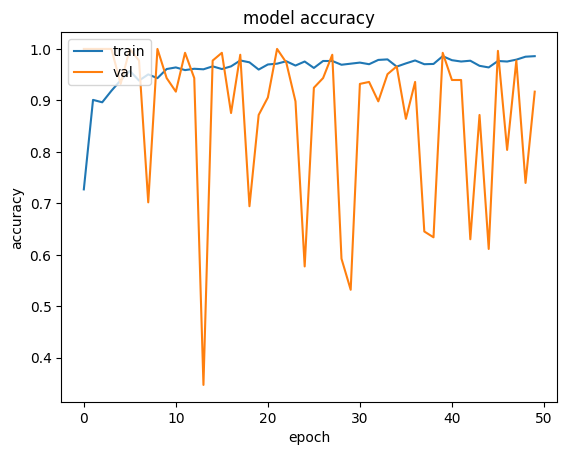

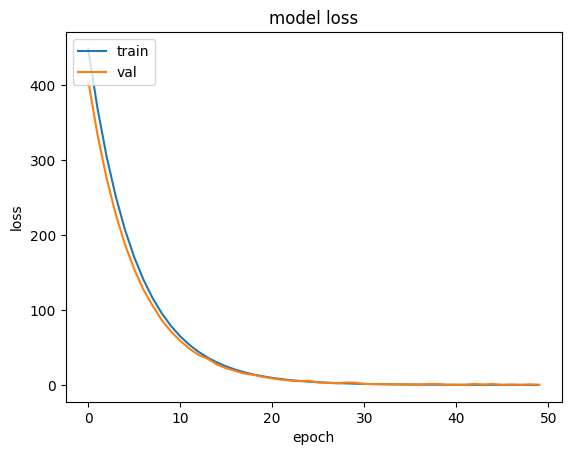

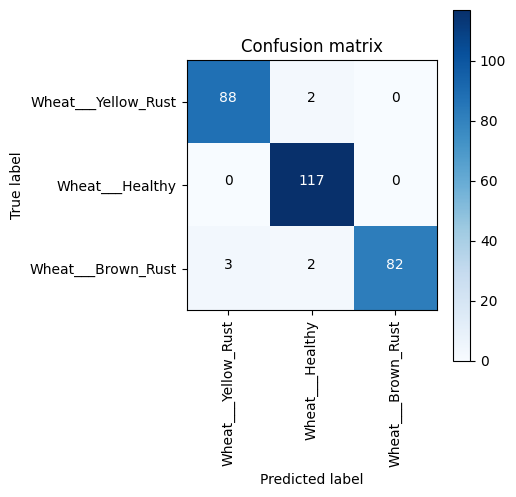

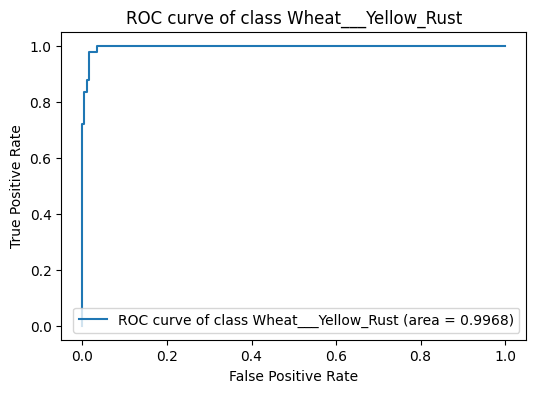

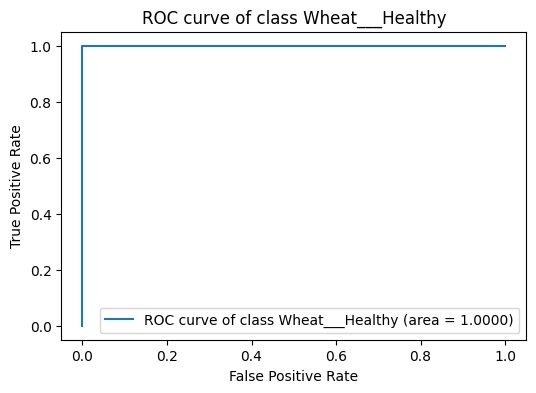

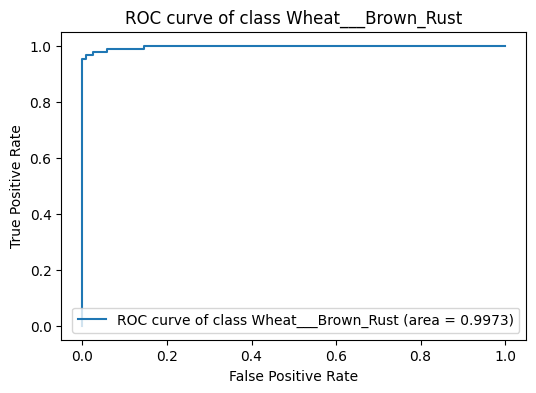

ROC AUC score: 0.9980218768611339
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.4638969302177429 - Accuracy: 88.81356120109558%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.3781376779079437 - Accuracy: 92.54237413406372%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.3564240336418152 - Accuracy: 95.23809552192688%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.31526169180870056 - Accuracy: 94.2176878452301%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.18104997277259827 - Accuracy: 99.65986609458923%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.5813707709312439 - Accuracy: 86.73469424247742%
-------------------------------------

In [30]:
train_model_kfold(10, 'cnnmodel', (224, 224))

58889256/58889256 [==============================] - 4s 0us/step
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
120/120 [==============================] - 18s 43ms/step - loss: 0.5604 - accuracy: 0.7958 - val_loss: 0.4439 - val_accuracy: 0.8528
Epoch 2/10
120/120 [==============================] - 6s 50ms/step - loss: 0.2018 - accuracy: 0.9364 - val_loss: 1.0138 - val_accuracy: 0.7094
Epoch 3/10
120/120 [==============================] - 4s 36ms/step - loss: 0.2231 - accuracy: 0.9275 - val_loss: 0.2120 - val_accuracy: 0.9396
Epoch 4/10
120/120 [==============================] - 4s 36ms/step - loss: 0.1001 - accuracy: 0.9682 - val_loss: 0.0889 - val_accuracy: 0.9736
Epoch 5/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0733 - accuracy: 0.9755 - val_loss: 0.1063 - val_accuracy: 0.9585
Epoch 6/10
120/120 [==============================] - 4s 35ms/step - loss: 0.0517 - accuracy: 0.9828 - val_loss: 0.1938 - 

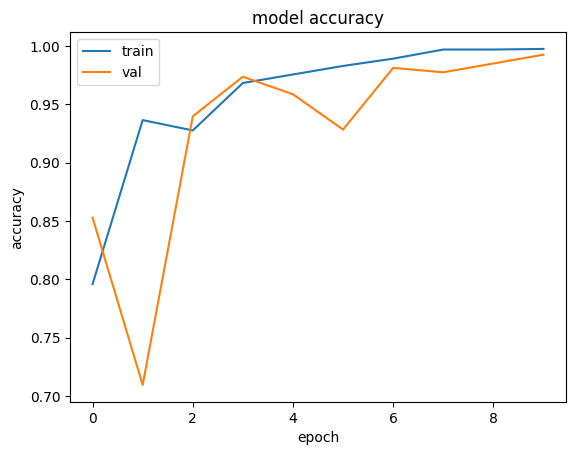

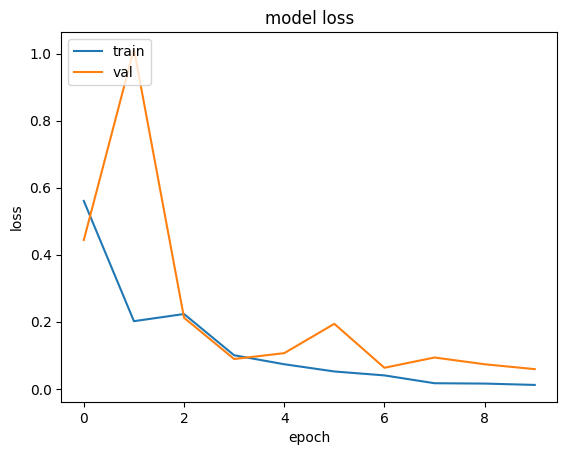

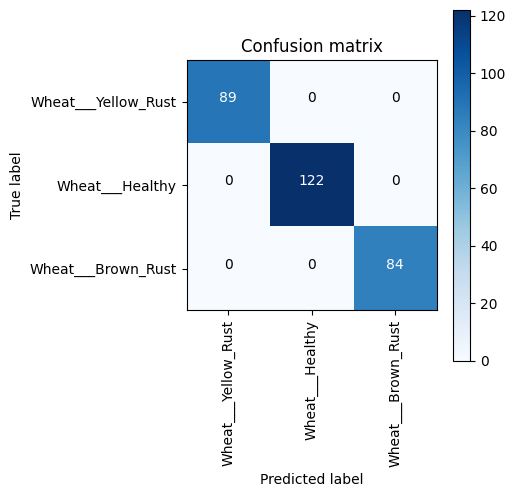

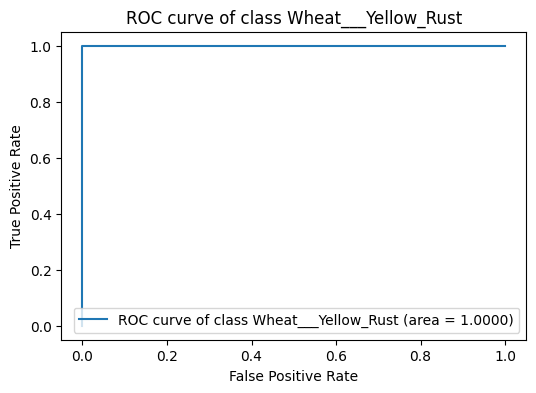

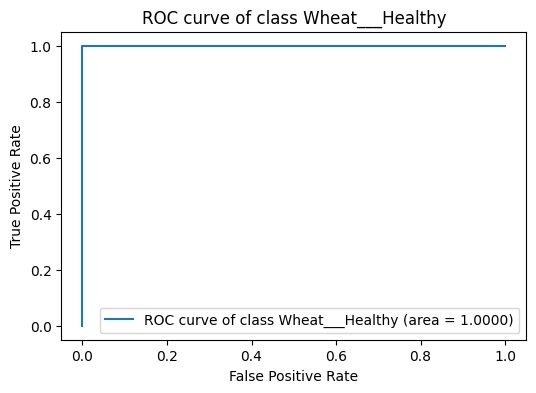

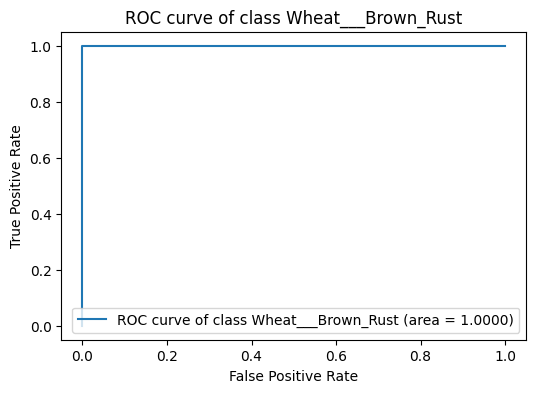

ROC AUC score: 1.0
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
120/120 [==============================] - 7s 39ms/step - loss: 0.7730 - accuracy: 0.6630 - val_loss: 0.5944 - val_accuracy: 0.7811
Epoch 2/10
120/120 [==============================] - 4s 36ms/step - loss: 0.2835 - accuracy: 0.9004 - val_loss: 0.2838 - val_accuracy: 0.9132
Epoch 3/10
120/120 [==============================] - 4s 36ms/step - loss: 0.2324 - accuracy: 0.9213 - val_loss: 0.1383 - val_accuracy: 0.9585
Epoch 4/10
120/120 [==============================] - 4s 36ms/step - loss: 0.1229 - accuracy: 0.9630 - val_loss: 0.0848 - val_accuracy: 0.9774
Epoch 5/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0919 - accuracy: 0.9698 - val_loss: 0.2131 - val_accuracy: 0.9358
Epoch 6/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0941 - accuracy: 0.9703 - val_loss: 0.1340 - val_accuracy: 0.9585
Epoch 7/10
120/120 [======

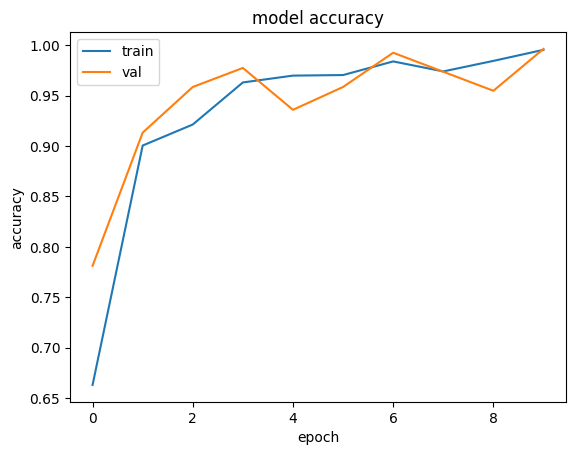

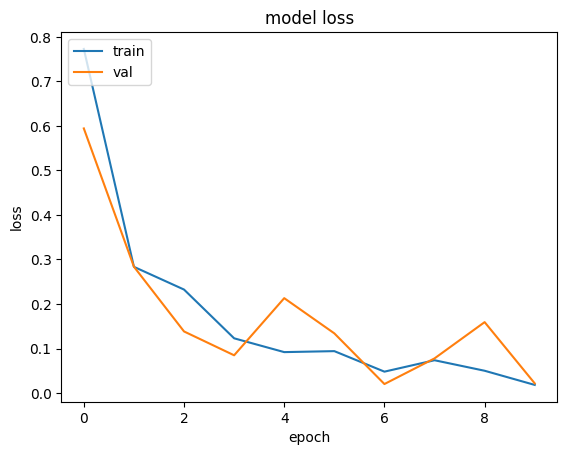

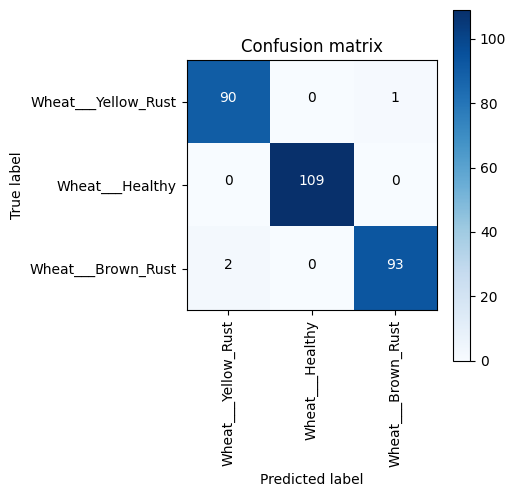

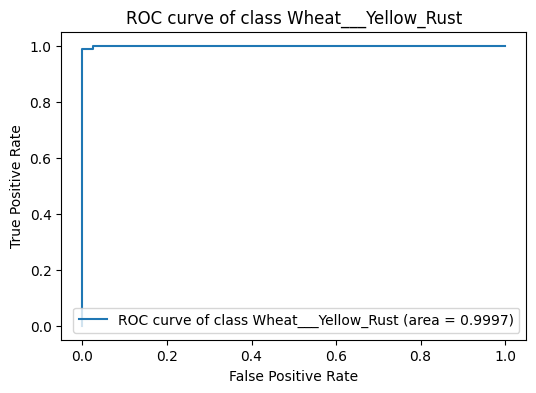

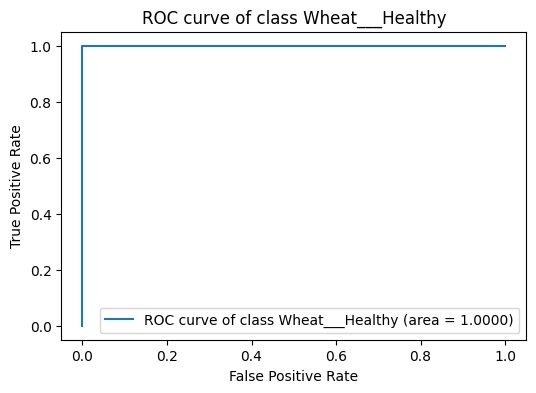

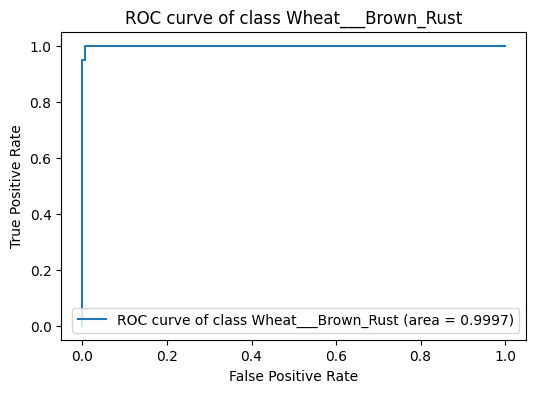

ROC AUC score: 0.9998225012002102
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
120/120 [==============================] - 7s 39ms/step - loss: 0.6028 - accuracy: 0.7766 - val_loss: 0.4211 - val_accuracy: 0.8981
Epoch 2/10
120/120 [==============================] - 6s 53ms/step - loss: 0.1699 - accuracy: 0.9453 - val_loss: 0.0329 - val_accuracy: 0.9887
Epoch 3/10
120/120 [==============================] - 4s 36ms/step - loss: 0.1135 - accuracy: 0.9666 - val_loss: 0.0281 - val_accuracy: 0.9925
Epoch 4/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0672 - accuracy: 0.9792 - val_loss: 0.0767 - val_accuracy: 0.9811
Epoch 5/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0823 - accuracy: 0.9750 - val_loss: 0.7390 - val_accuracy: 0.7887
Epoch 6/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0765 - accuracy: 0.9766 - val_loss: 0.0611 - val_accuracy: 0.9811
Epoch 7/10


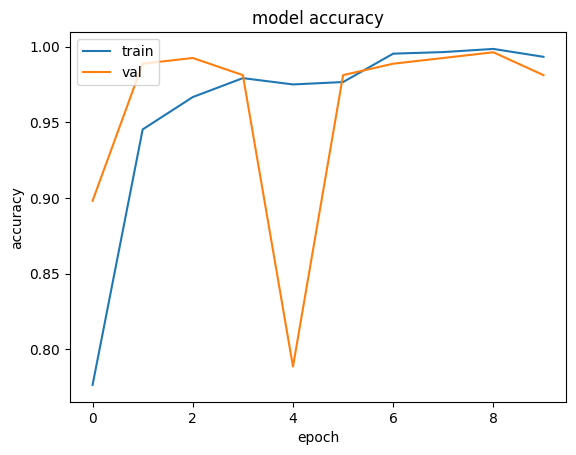

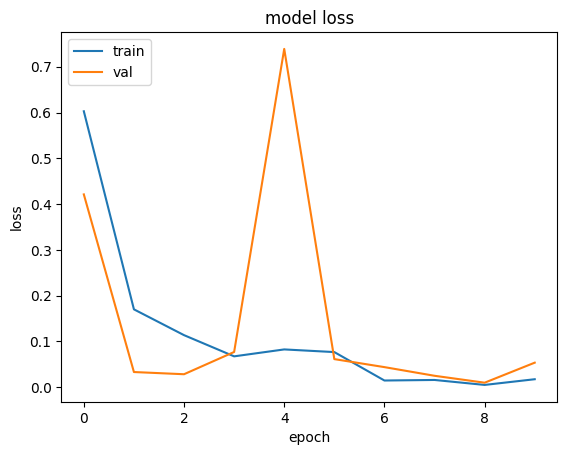

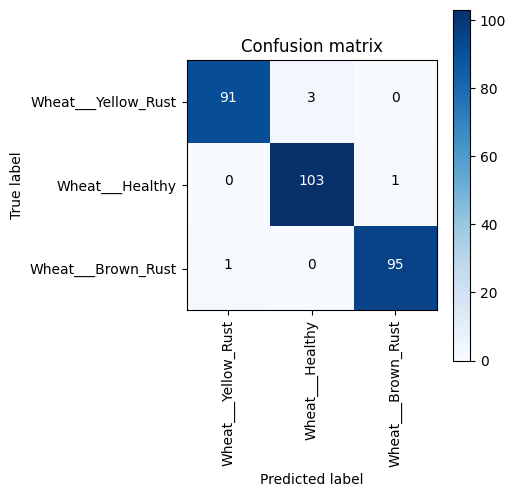

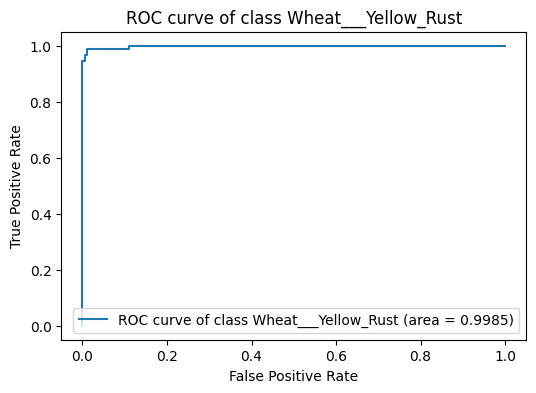

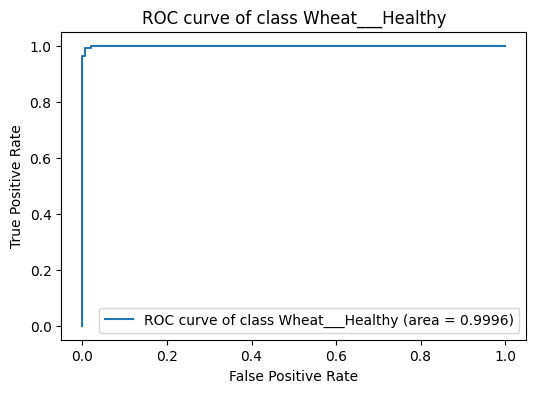

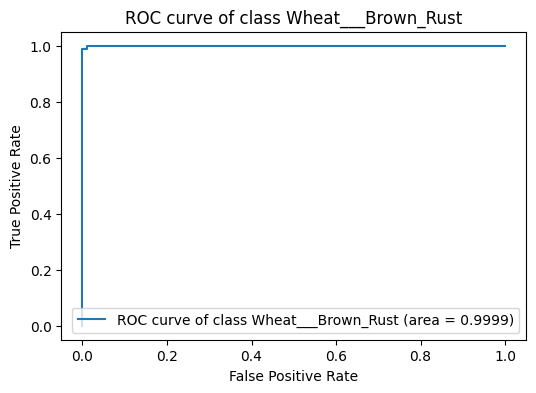

ROC AUC score: 0.999350389476836
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
120/120 [==============================] - 7s 39ms/step - loss: 1.0878 - accuracy: 0.4307 - val_loss: 1.2549 - val_accuracy: 0.0000e+00
Epoch 2/10
120/120 [==============================] - 4s 36ms/step - loss: 0.8090 - accuracy: 0.6342 - val_loss: 1.1144 - val_accuracy: 0.0000e+00
Epoch 3/10
120/120 [==============================] - 4s 36ms/step - loss: 0.6583 - accuracy: 0.7285 - val_loss: 1.1907 - val_accuracy: 0.0000e+00
Epoch 4/10
120/120 [==============================] - 4s 36ms/step - loss: 0.6227 - accuracy: 0.7118 - val_loss: 1.1287 - val_accuracy: 0.0000e+00
Epoch 5/10
120/120 [==============================] - 4s 35ms/step - loss: 0.5628 - accuracy: 0.7389 - val_loss: 1.1024 - val_accuracy: 0.0000e+00
Epoch 6/10
120/120 [==============================] - 4s 36ms/step - loss: 0.5247 - accuracy: 0.7422 - val_loss: 1.1387 - val_accuracy:

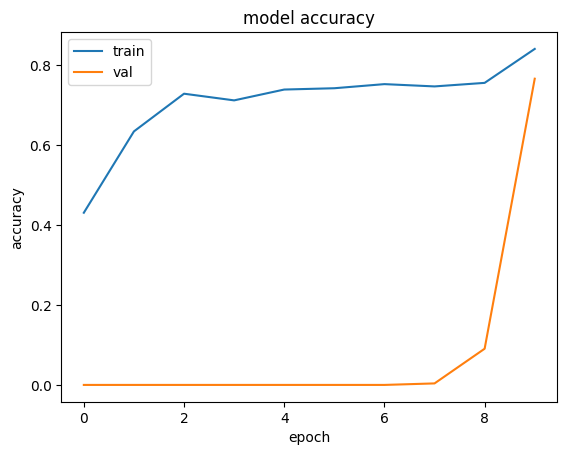

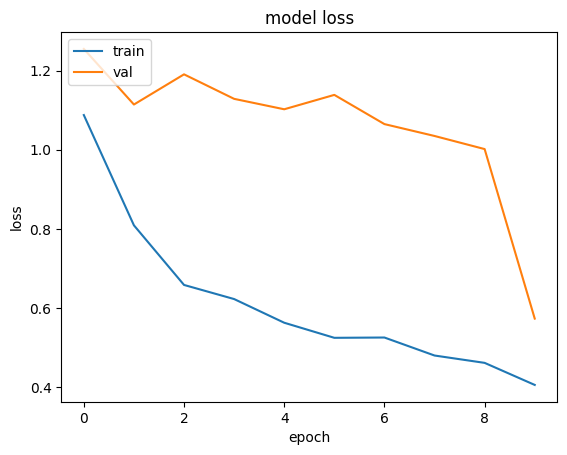

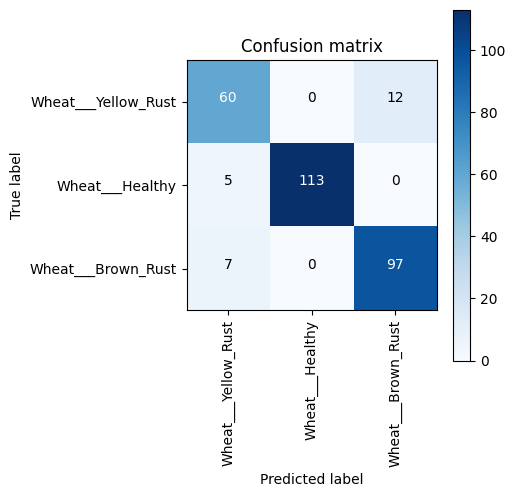

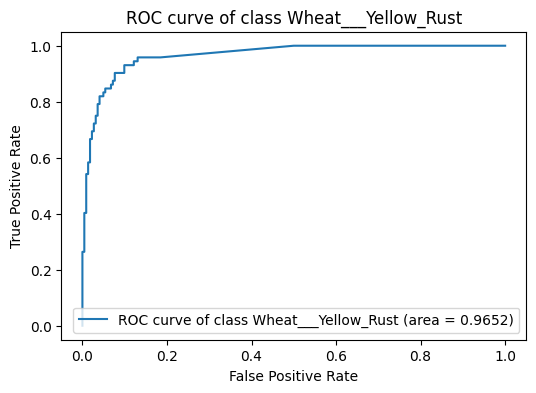

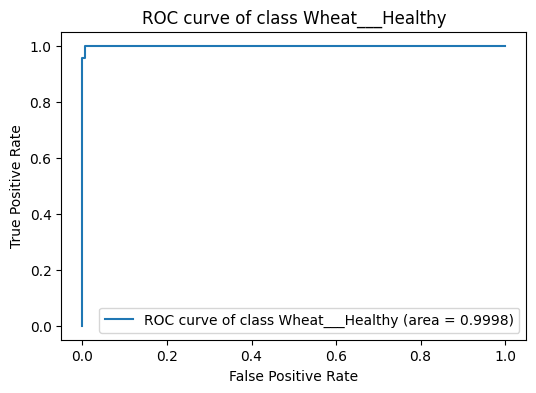

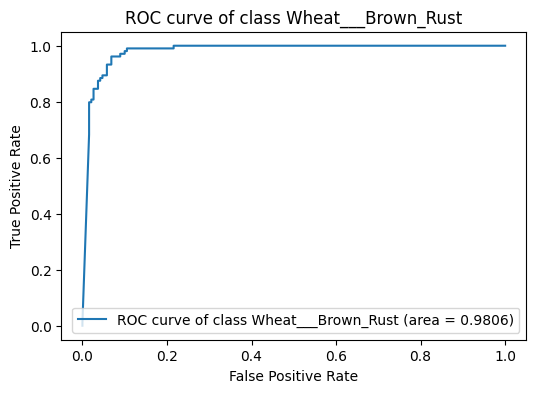

ROC AUC score: 0.9818431021839437
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
120/120 [==============================] - 7s 39ms/step - loss: 0.7034 - accuracy: 0.7182 - val_loss: 0.3217 - val_accuracy: 0.9019
Epoch 2/10
120/120 [==============================] - 4s 36ms/step - loss: 0.2227 - accuracy: 0.9255 - val_loss: 0.3147 - val_accuracy: 0.8981
Epoch 3/10
120/120 [==============================] - 4s 36ms/step - loss: 0.1565 - accuracy: 0.9505 - val_loss: 0.2260 - val_accuracy: 0.9358
Epoch 4/10
120/120 [==============================] - 4s 36ms/step - loss: 0.1207 - accuracy: 0.9594 - val_loss: 0.0957 - val_accuracy: 0.9774
Epoch 5/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0394 - accuracy: 0.9865 - val_loss: 0.0409 - val_accuracy: 0.9887
Epoch 6/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0269 - accuracy: 0.9948 - val_loss: 0.2161 - val_accuracy: 0.9472
Epoch 7/10


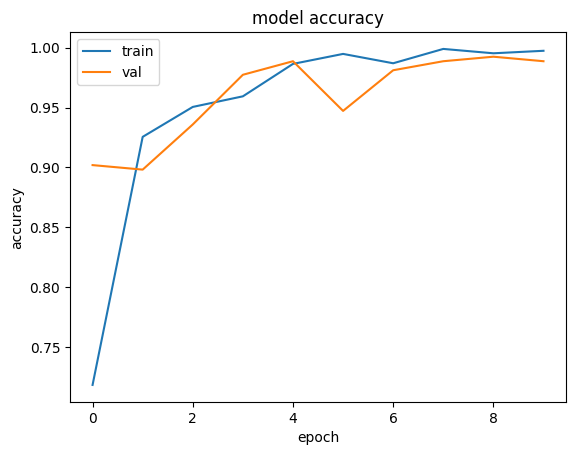

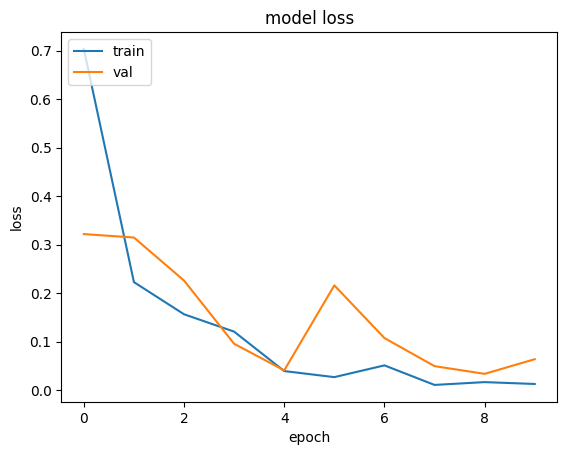

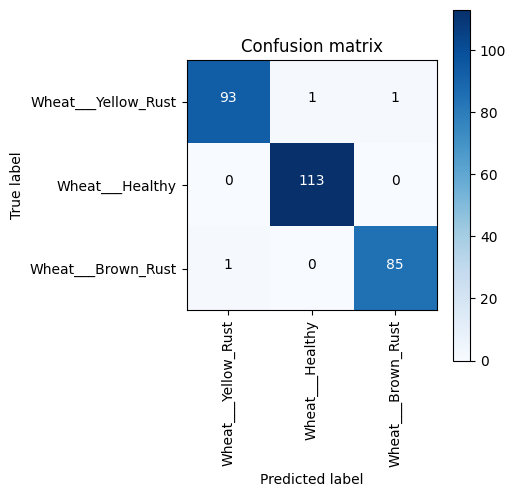

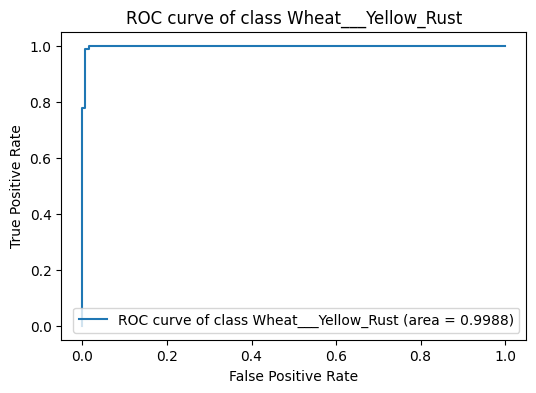

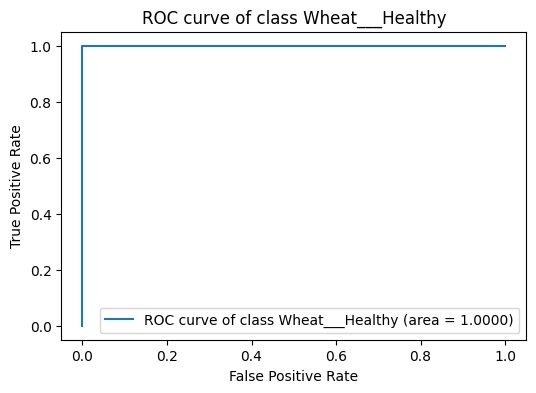

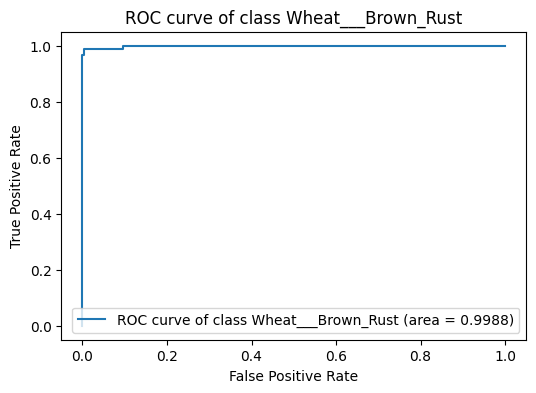

ROC AUC score: 0.9991845052870038
------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/10
120/120 [==============================] - 7s 39ms/step - loss: 0.6331 - accuracy: 0.7583 - val_loss: 0.4959 - val_accuracy: 0.8226
Epoch 2/10
120/120 [==============================] - 4s 36ms/step - loss: 0.2566 - accuracy: 0.9312 - val_loss: 0.0449 - val_accuracy: 0.9887
Epoch 3/10
120/120 [==============================] - 4s 36ms/step - loss: 0.1209 - accuracy: 0.9630 - val_loss: 0.1359 - val_accuracy: 0.9547
Epoch 4/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0880 - accuracy: 0.9724 - val_loss: 0.1422 - val_accuracy: 0.9472
Epoch 5/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0858 - accuracy: 0.9750 - val_loss: 0.0599 - val_accuracy: 0.9774
Epoch 6/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0736 - accuracy: 0.9792 - val_loss: 0.0512 - val_accuracy: 0.9849
Epoch 7/10


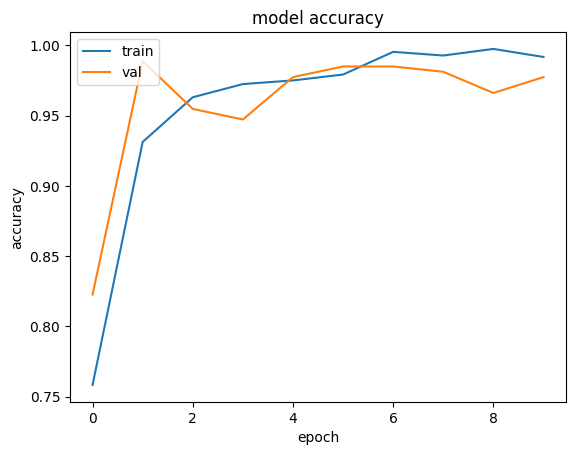

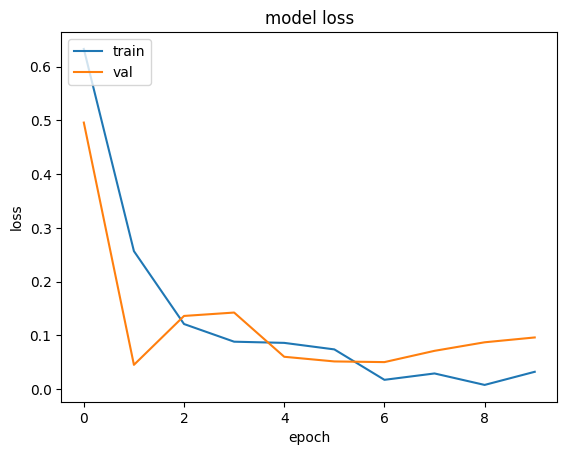

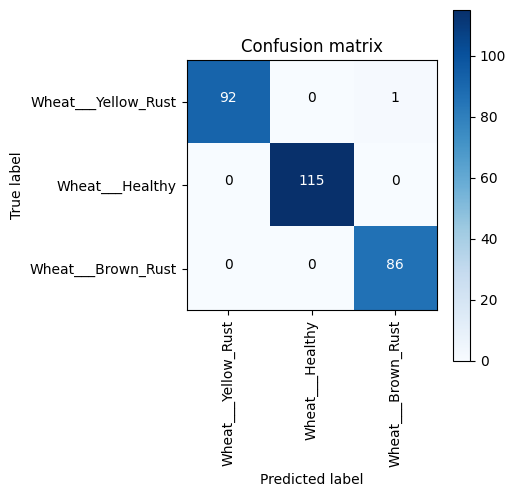

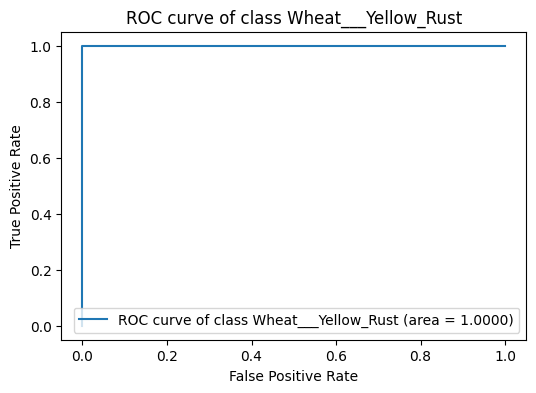

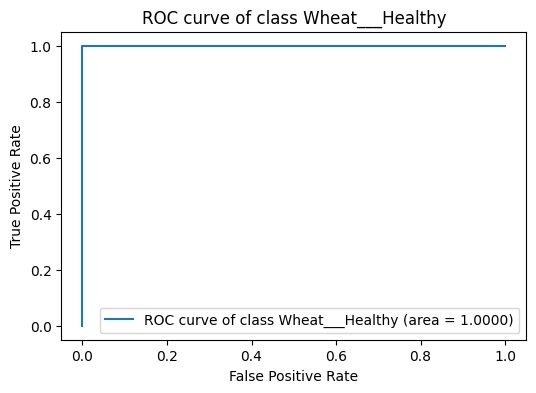

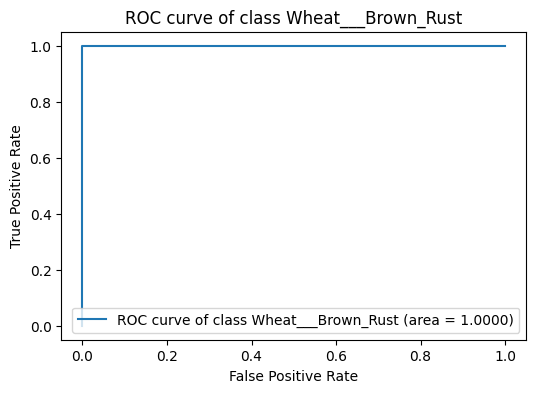

ROC AUC score: 1.0
------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/10
120/120 [==============================] - 7s 39ms/step - loss: 0.6826 - accuracy: 0.7292 - val_loss: 0.5561 - val_accuracy: 0.7396
Epoch 2/10
120/120 [==============================] - 4s 36ms/step - loss: 0.3218 - accuracy: 0.8921 - val_loss: 1.0987 - val_accuracy: 0.6189
Epoch 3/10
120/120 [==============================] - 4s 36ms/step - loss: 0.2030 - accuracy: 0.9364 - val_loss: 0.2576 - val_accuracy: 0.9057
Epoch 4/10
120/120 [==============================] - 4s 36ms/step - loss: 0.1216 - accuracy: 0.9656 - val_loss: 0.3348 - val_accuracy: 0.8642
Epoch 5/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0766 - accuracy: 0.9739 - val_loss: 0.2711 - val_accuracy: 0.8906
Epoch 6/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0518 - accuracy: 0.9823 - val_loss: 0.1148 - val_accuracy: 0.9623
Epoch 7/10
120/120 [======

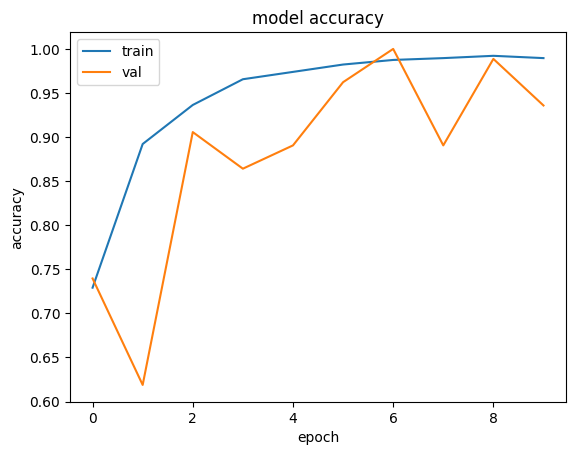

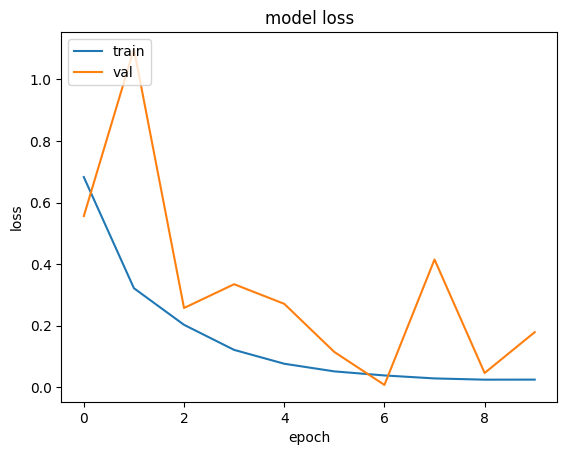

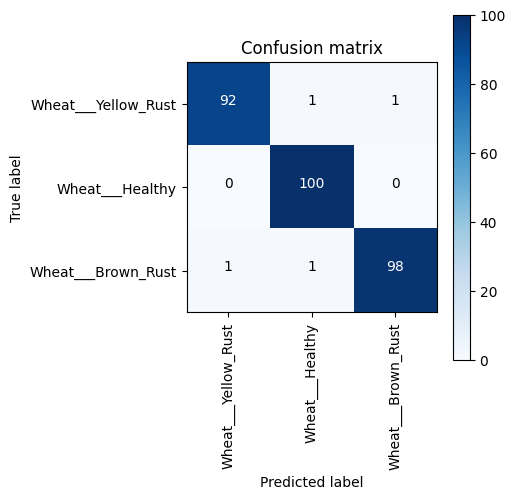

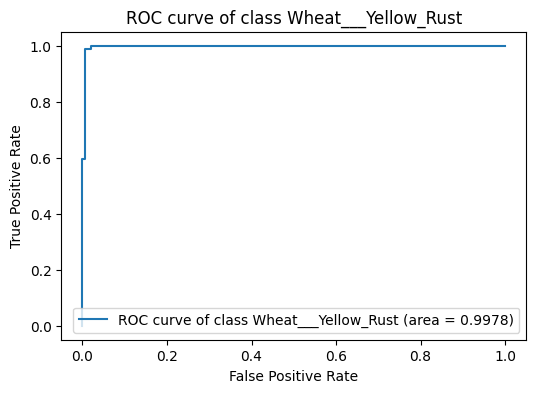

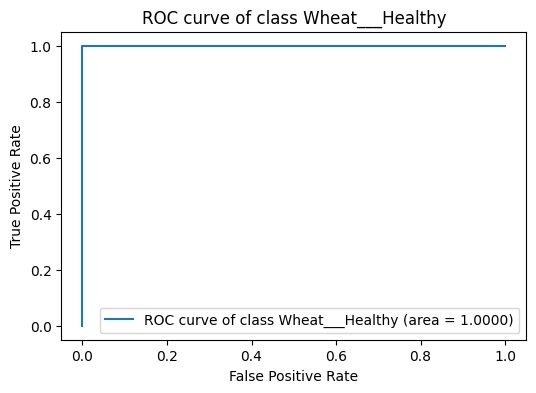

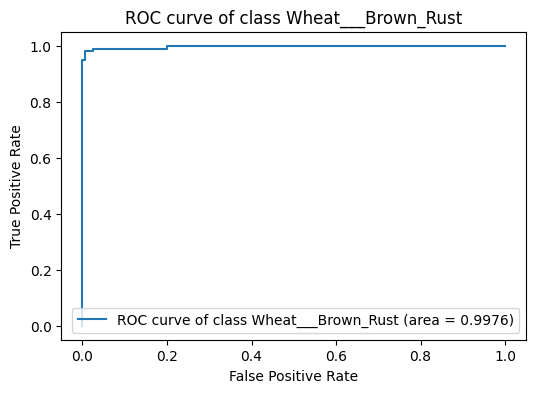

ROC AUC score: 0.9984654895079331
------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/10
120/120 [==============================] - 7s 39ms/step - loss: 0.5693 - accuracy: 0.7859 - val_loss: 0.3843 - val_accuracy: 0.8642
Epoch 2/10
120/120 [==============================] - 4s 36ms/step - loss: 0.4424 - accuracy: 0.8468 - val_loss: 0.3276 - val_accuracy: 0.8830
Epoch 3/10
120/120 [==============================] - 4s 36ms/step - loss: 0.2292 - accuracy: 0.9234 - val_loss: 0.0675 - val_accuracy: 0.9736
Epoch 4/10
120/120 [==============================] - 4s 36ms/step - loss: 0.1456 - accuracy: 0.9531 - val_loss: 0.3919 - val_accuracy: 0.8604
Epoch 5/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0813 - accuracy: 0.9786 - val_loss: 0.2799 - val_accuracy: 0.9208
Epoch 6/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.1406 - val_accuracy: 0.9623
Epoch 7/10


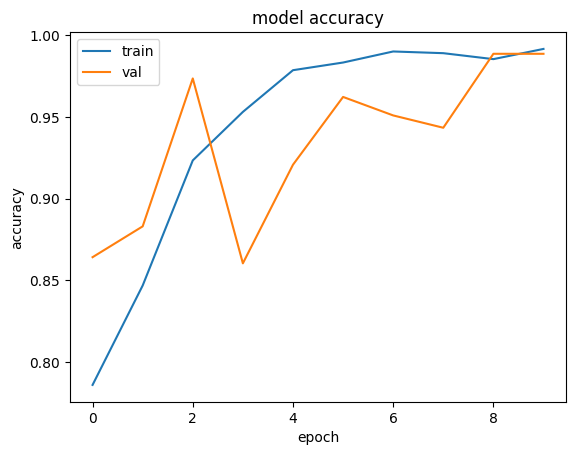

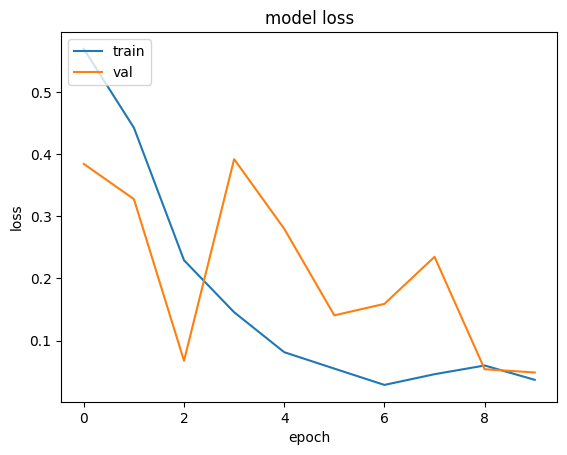

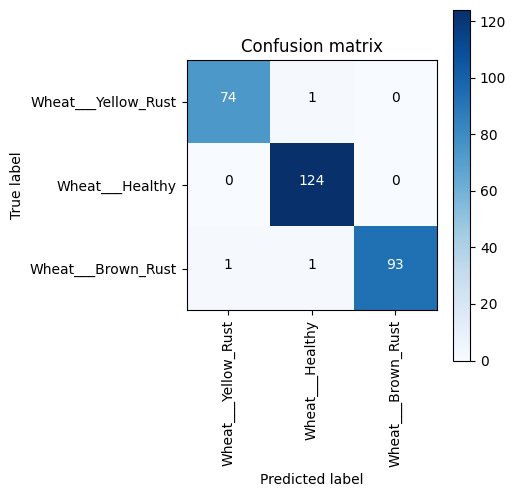

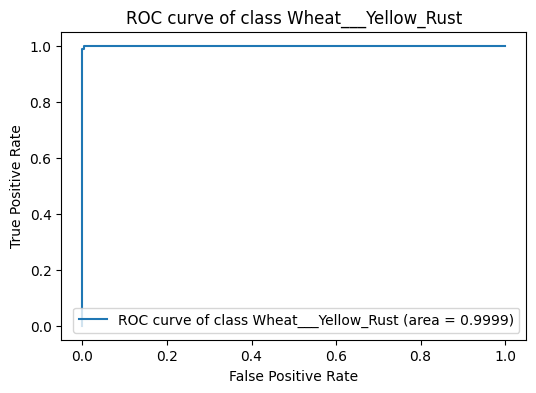

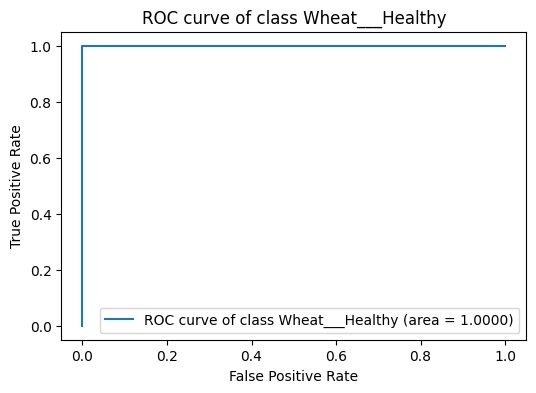

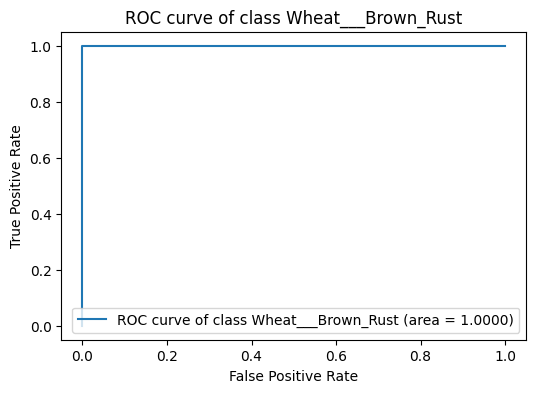

ROC AUC score: 0.9999797057331303
------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/10
120/120 [==============================] - 7s 39ms/step - loss: 0.8272 - accuracy: 0.6432 - val_loss: 1.4536 - val_accuracy: 0.4226
Epoch 2/10
120/120 [==============================] - 4s 35ms/step - loss: 0.3205 - accuracy: 0.8994 - val_loss: 0.4875 - val_accuracy: 0.8453
Epoch 3/10
120/120 [==============================] - 4s 36ms/step - loss: 0.1416 - accuracy: 0.9536 - val_loss: 0.6475 - val_accuracy: 0.7849
Epoch 4/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0751 - accuracy: 0.9771 - val_loss: 0.0716 - val_accuracy: 0.9849
Epoch 5/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0919 - accuracy: 0.9666 - val_loss: 0.0133 - val_accuracy: 0.9925
Epoch 6/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0655 - accuracy: 0.9823 - val_loss: 0.0593 - val_accuracy: 0.9811
Epoch 7/10


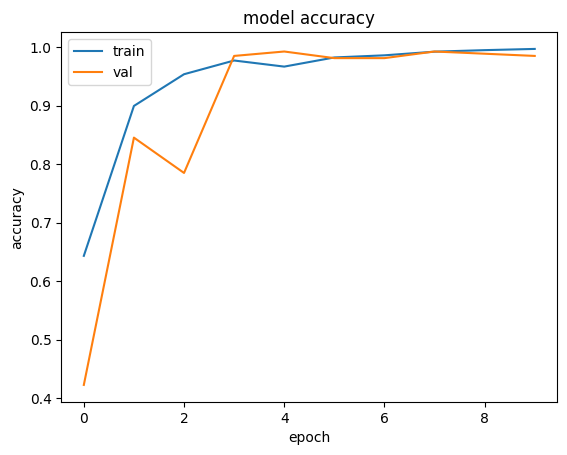

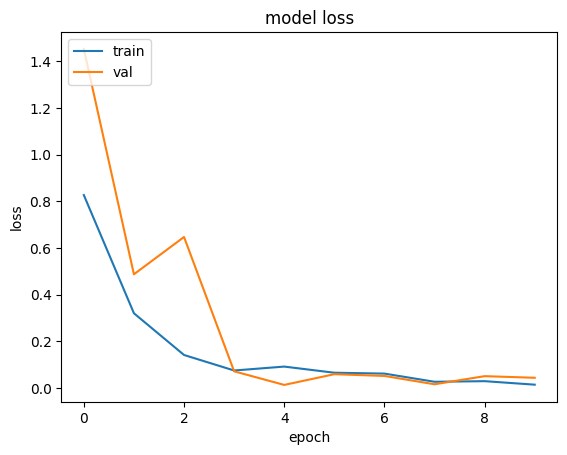

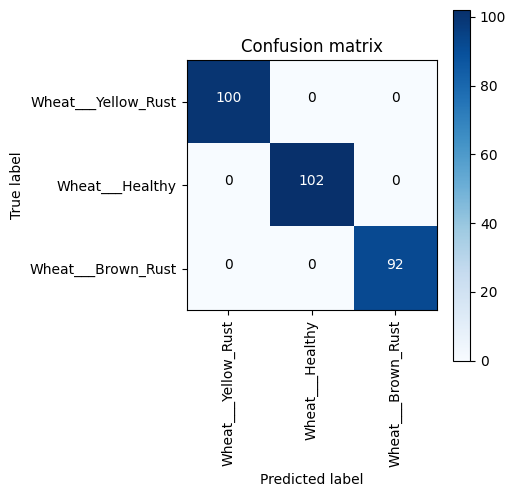

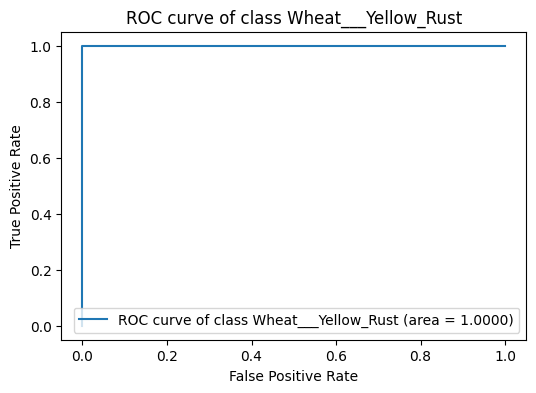

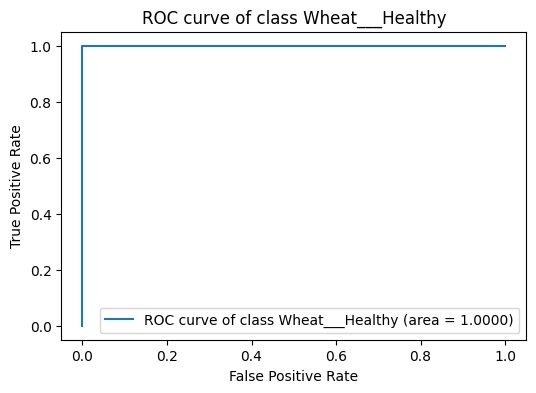

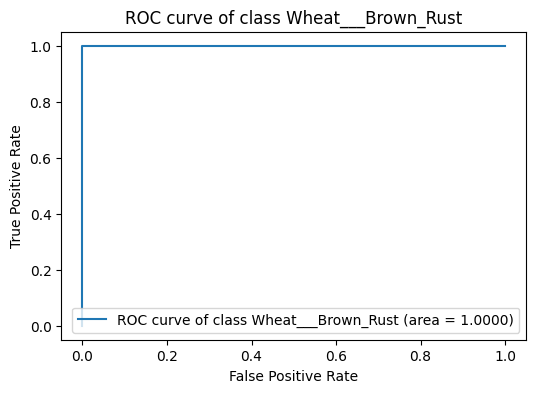

ROC AUC score: 1.0
------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/10
120/120 [==============================] - 7s 39ms/step - loss: 0.5725 - accuracy: 0.7750 - val_loss: 0.0321 - val_accuracy: 0.9849
Epoch 2/10
120/120 [==============================] - 4s 36ms/step - loss: 0.1817 - accuracy: 0.9437 - val_loss: 0.0223 - val_accuracy: 0.9925
Epoch 3/10
120/120 [==============================] - 4s 36ms/step - loss: 0.1587 - accuracy: 0.9479 - val_loss: 0.0771 - val_accuracy: 0.9774
Epoch 4/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0397 - accuracy: 0.9870 - val_loss: 0.0734 - val_accuracy: 0.9811
Epoch 5/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0471 - accuracy: 0.9880 - val_loss: 0.1573 - val_accuracy: 0.9509
Epoch 6/10
120/120 [==============================] - 4s 36ms/step - loss: 0.0712 - accuracy: 0.9807 - val_loss: 1.1035 - val_accuracy: 0.7358
Epoch 7/10
120/120 [=====

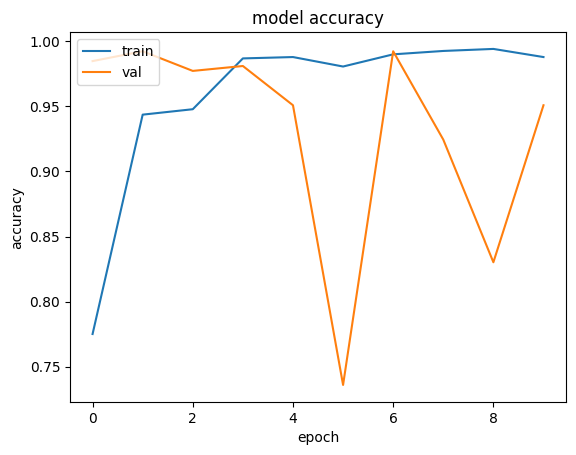

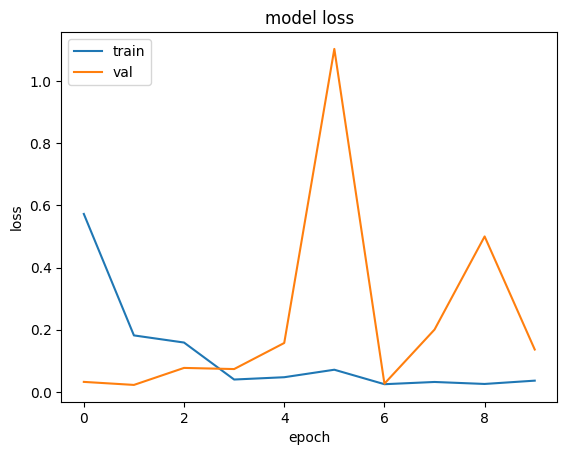

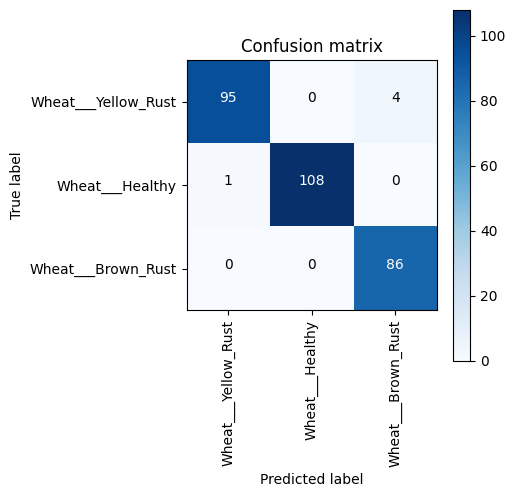

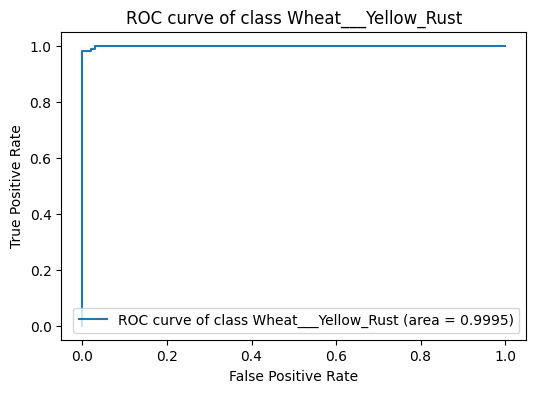

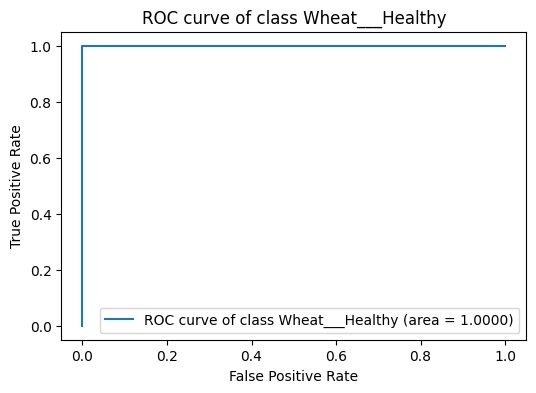

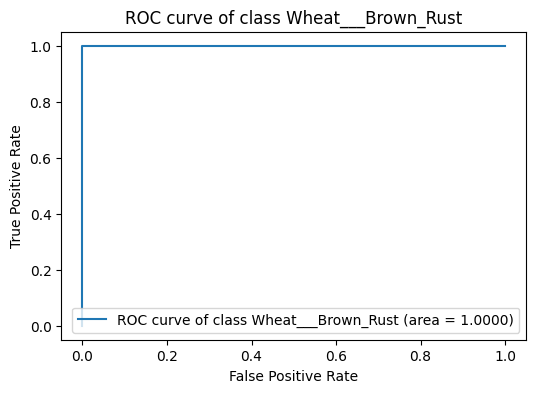

ROC AUC score: 0.9998273331606665
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.008986536413431168 - Accuracy: 100.0%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.026523830369114876 - Accuracy: 98.9830493927002%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.06738509982824326 - Accuracy: 98.29931855201721%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.318514883518219 - Accuracy: 91.8367326259613%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.04724239185452461 - Accuracy: 98.97959232330322%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.006656743586063385 - Accuracy: 99.65986609458923%
---------------------------------------------

In [ ]:
train_model_kfold(10, 'vgg16', (224, 224))

87910968/87910968 [==============================] - 5s 0us/step
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
120/120 [==============================] - 29s 73ms/step - loss: 0.7236 - accuracy: 0.7891 - val_loss: 0.3132 - val_accuracy: 0.8868
Epoch 2/10
120/120 [==============================] - 8s 69ms/step - loss: 0.1657 - accuracy: 0.9531 - val_loss: 0.2875 - val_accuracy: 0.9019
Epoch 3/10
120/120 [==============================] - 6s 53ms/step - loss: 0.0689 - accuracy: 0.9760 - val_loss: 0.0910 - val_accuracy: 0.9698
Epoch 4/10
120/120 [==============================] - 6s 52ms/step - loss: 0.0213 - accuracy: 0.9948 - val_loss: 0.0669 - val_accuracy: 0.9774
Epoch 5/10
120/120 [==============================] - 6s 53ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0429 - val_accuracy: 0.9849
Epoch 6/10
120/120 [==============================] - 6s 52ms/step - loss: 0.0285 - accuracy: 0.9870 - val_loss: 0.3124 - 

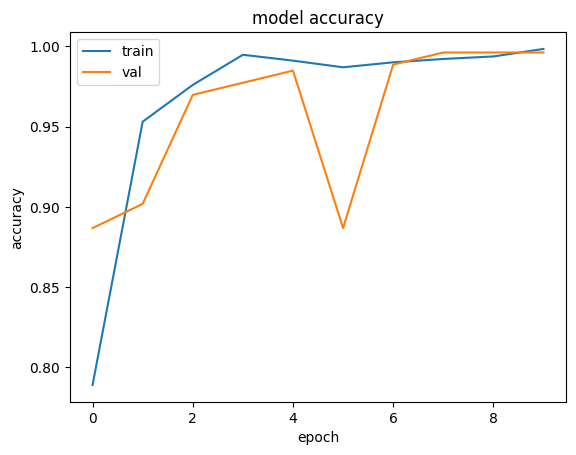

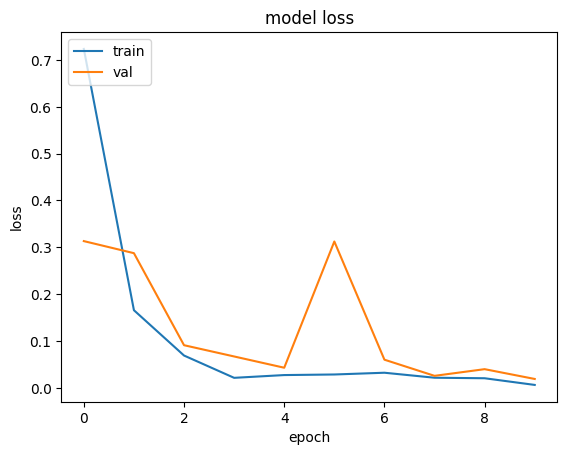

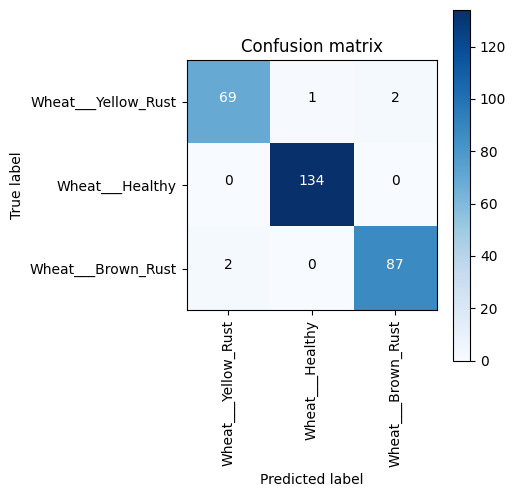

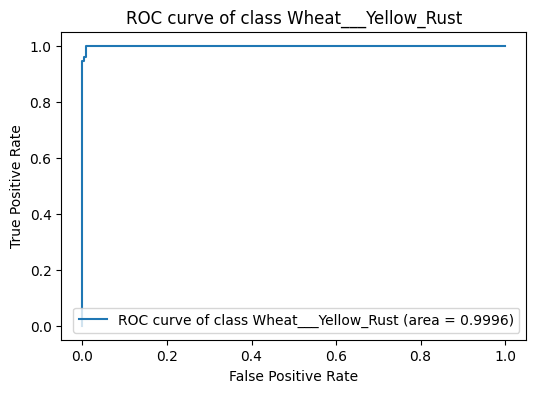

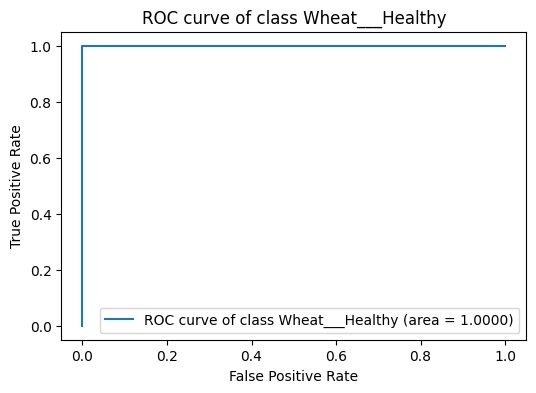

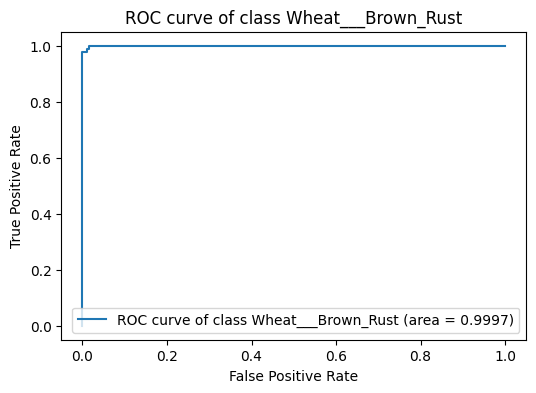

ROC AUC score: 0.9997637695178616
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
120/120 [==============================] - 24s 65ms/step - loss: 0.6075 - accuracy: 0.8062 - val_loss: 0.2917 - val_accuracy: 0.8943
Epoch 2/10
120/120 [==============================] - 6s 54ms/step - loss: 0.0994 - accuracy: 0.9692 - val_loss: 0.1575 - val_accuracy: 0.9736
Epoch 3/10
120/120 [==============================] - 6s 53ms/step - loss: 0.0449 - accuracy: 0.9875 - val_loss: 0.0938 - val_accuracy: 0.9736
Epoch 4/10
120/120 [==============================] - 6s 53ms/step - loss: 0.0377 - accuracy: 0.9880 - val_loss: 0.1647 - val_accuracy: 0.9547
Epoch 5/10
120/120 [==============================] - 6s 53ms/step - loss: 0.0318 - accuracy: 0.9917 - val_loss: 0.1093 - val_accuracy: 0.9811
Epoch 6/10
120/120 [==============================] - 6s 54ms/step - loss: 0.0262 - accuracy: 0.9911 - val_loss: 0.0915 - val_accuracy: 0.9811
Epoch 7/10

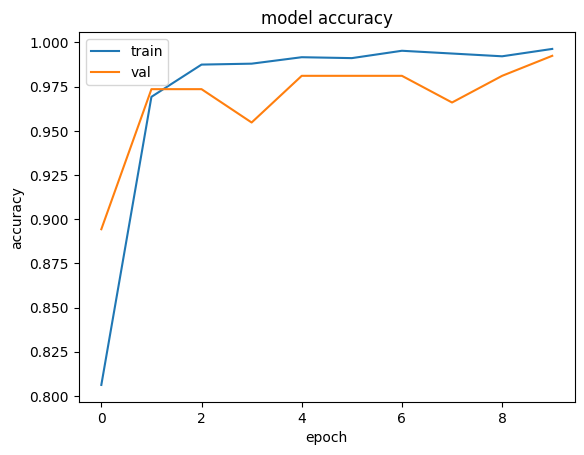

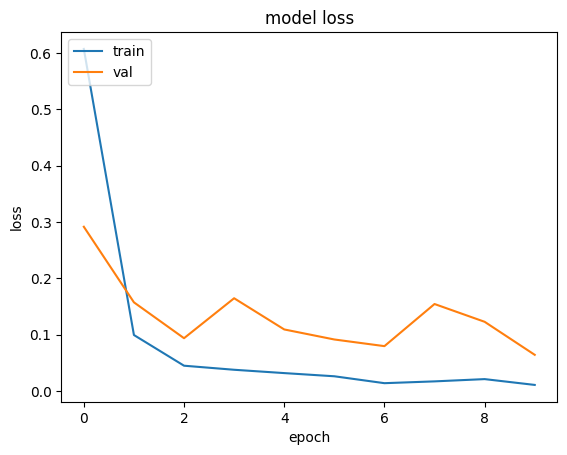

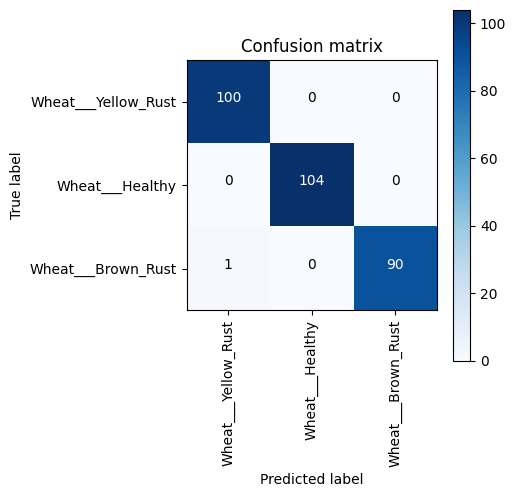

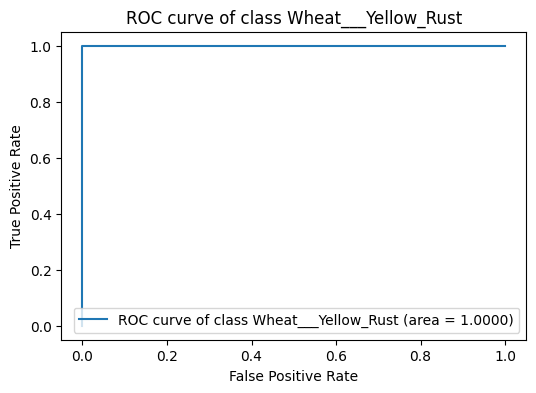

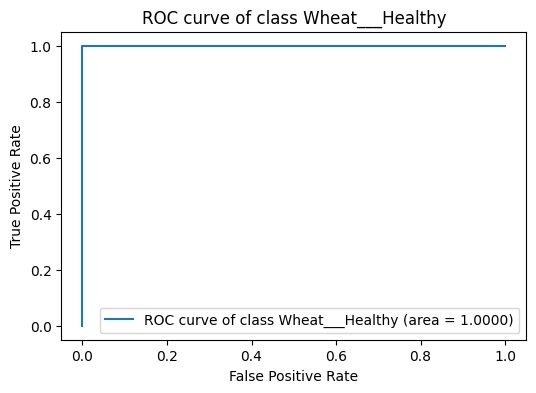

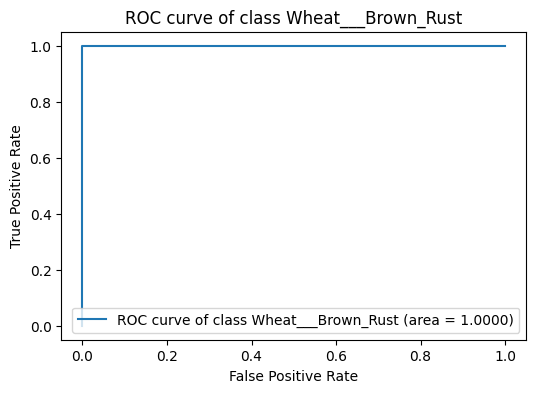

ROC AUC score: 1.0
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
120/120 [==============================] - 24s 65ms/step - loss: 0.4603 - accuracy: 0.8375 - val_loss: 0.8197 - val_accuracy: 0.7547
Epoch 2/10
120/120 [==============================] - 8s 70ms/step - loss: 0.1234 - accuracy: 0.9594 - val_loss: 0.3749 - val_accuracy: 0.8491
Epoch 3/10
120/120 [==============================] - 6s 54ms/step - loss: 0.0588 - accuracy: 0.9812 - val_loss: 0.0495 - val_accuracy: 0.9849
Epoch 4/10
120/120 [==============================] - 6s 53ms/step - loss: 0.0407 - accuracy: 0.9891 - val_loss: 0.0253 - val_accuracy: 0.9887
Epoch 5/10
120/120 [==============================] - 6s 54ms/step - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.0303 - val_accuracy: 0.9925
Epoch 6/10
120/120 [==============================] - 6s 54ms/step - loss: 0.0301 - accuracy: 0.9917 - val_loss: 0.0713 - val_accuracy: 0.9925
Epoch 7/10
120/120 [=====

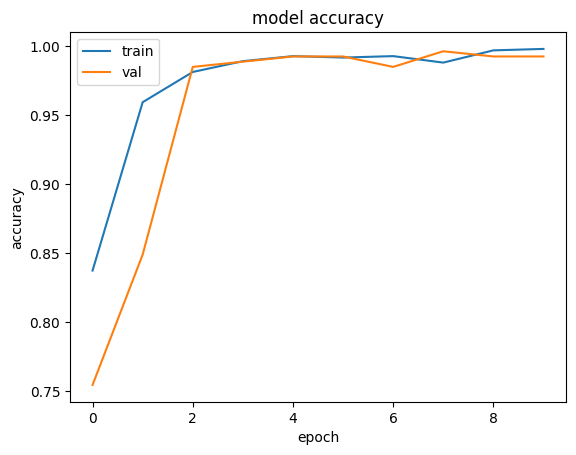

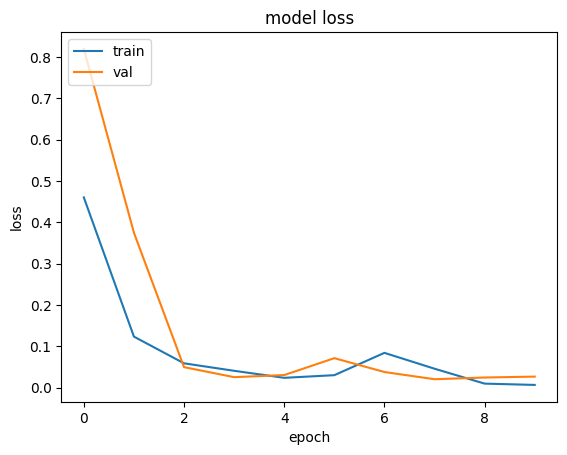

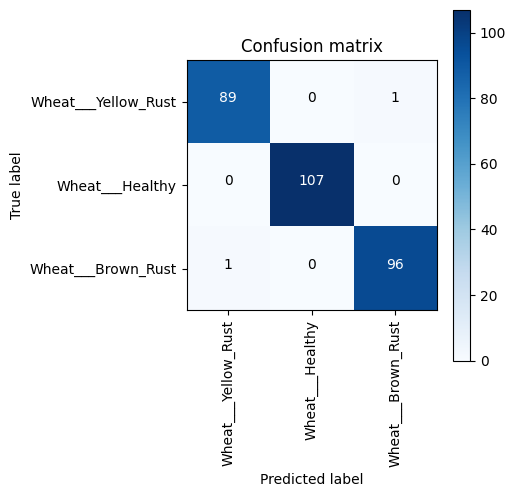

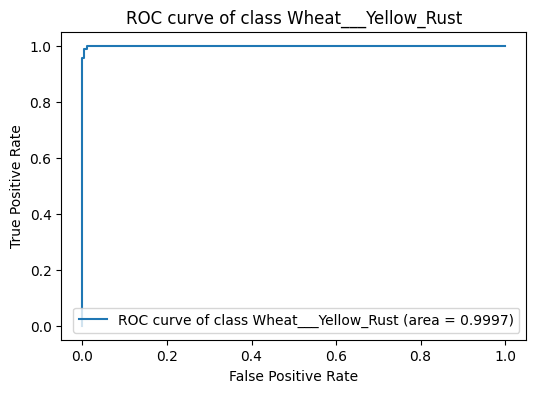

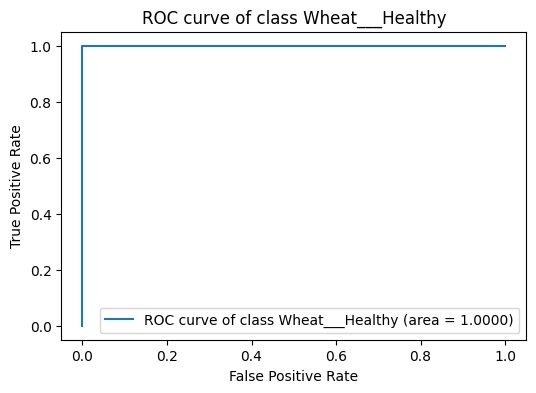

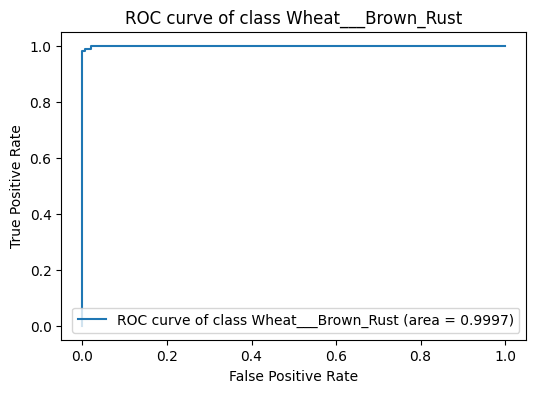

ROC AUC score: 0.999822004011463
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
120/120 [==============================] - 25s 66ms/step - loss: 0.5535 - accuracy: 0.8188 - val_loss: 1.8517 - val_accuracy: 0.7849
Epoch 2/10
120/120 [==============================] - 6s 54ms/step - loss: 0.0726 - accuracy: 0.9745 - val_loss: 0.0199 - val_accuracy: 0.9925
Epoch 3/10
120/120 [==============================] - 7s 54ms/step - loss: 0.0386 - accuracy: 0.9859 - val_loss: 0.0331 - val_accuracy: 0.9849
Epoch 4/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0609 - val_accuracy: 0.9811
Epoch 5/10
120/120 [==============================] - 6s 54ms/step - loss: 0.0226 - accuracy: 0.9937 - val_loss: 0.0265 - val_accuracy: 0.9887
Epoch 6/10
120/120 [==============================] - 7s 54ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.0332 - val_accuracy: 0.9887
Epoch 7/10


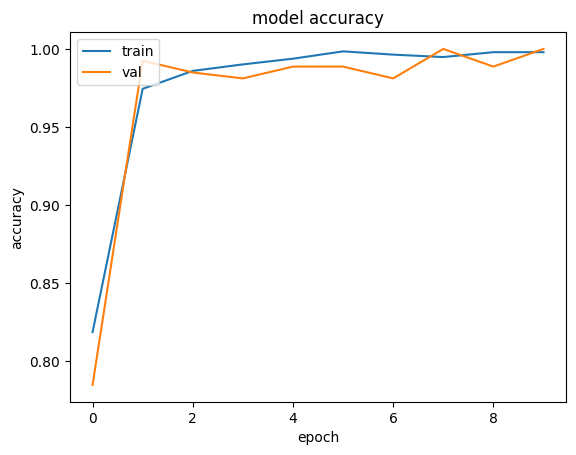

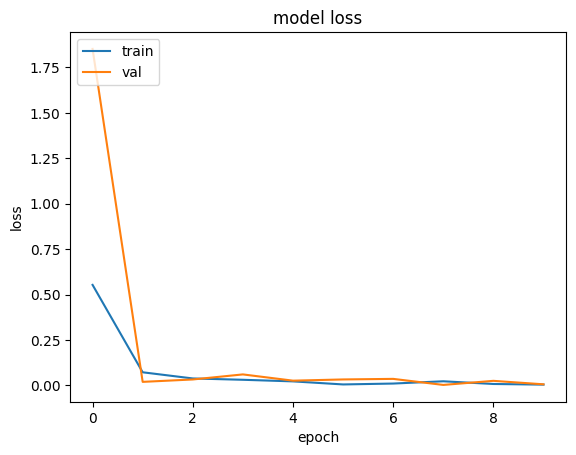

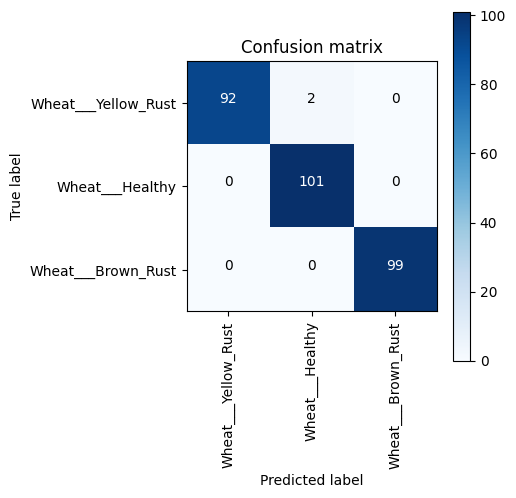

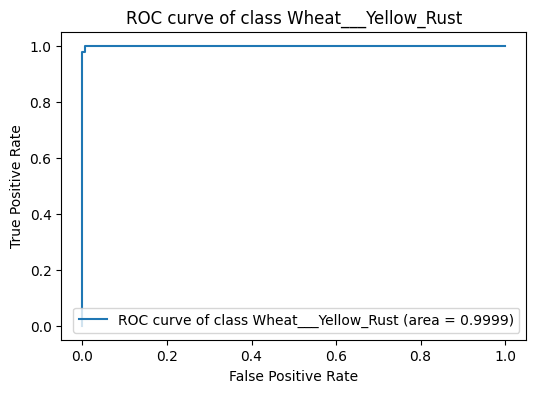

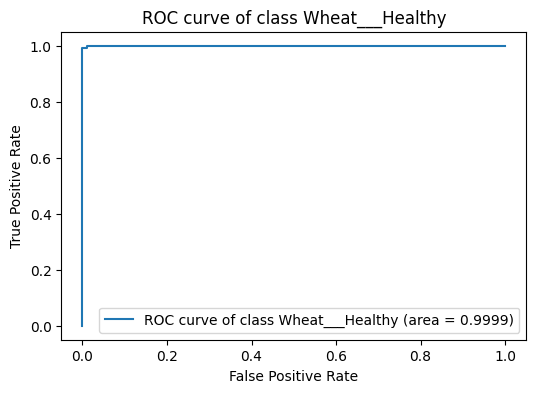

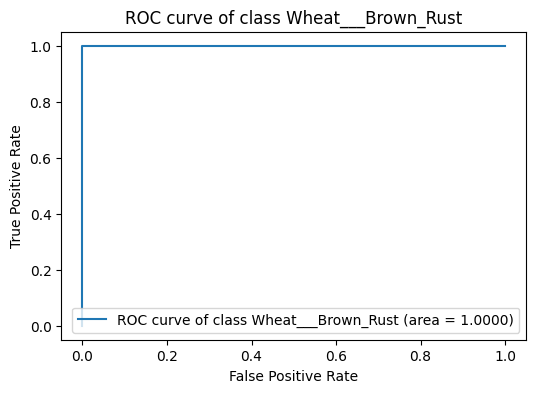

ROC AUC score: 0.9999303386958692
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
120/120 [==============================] - 25s 67ms/step - loss: 0.6250 - accuracy: 0.7792 - val_loss: 3.9050 - val_accuracy: 0.3170
Epoch 2/10
120/120 [==============================] - 6s 54ms/step - loss: 0.1214 - accuracy: 0.9604 - val_loss: 0.3237 - val_accuracy: 0.9170
Epoch 3/10
120/120 [==============================] - 6s 54ms/step - loss: 0.0399 - accuracy: 0.9880 - val_loss: 0.1088 - val_accuracy: 0.9660
Epoch 4/10
120/120 [==============================] - 6s 54ms/step - loss: 0.0509 - accuracy: 0.9844 - val_loss: 0.0911 - val_accuracy: 0.9660
Epoch 5/10
120/120 [==============================] - 6s 54ms/step - loss: 0.0404 - accuracy: 0.9885 - val_loss: 0.0389 - val_accuracy: 0.9925
Epoch 6/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0228 - accuracy: 0.9948 - val_loss: 0.0469 - val_accuracy: 0.9849
Epoch 7/10

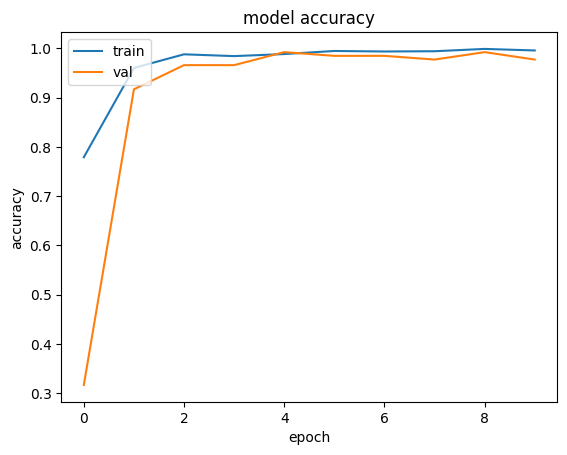

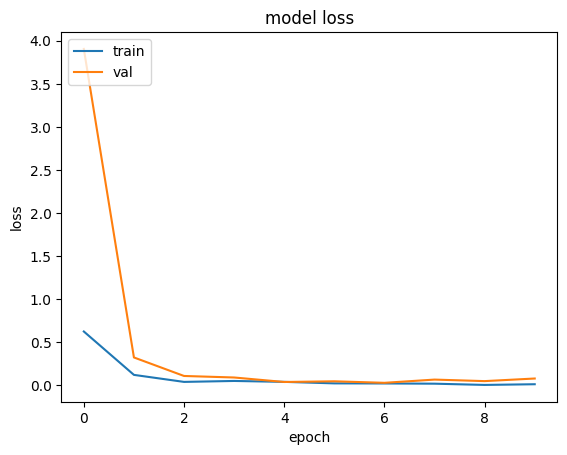

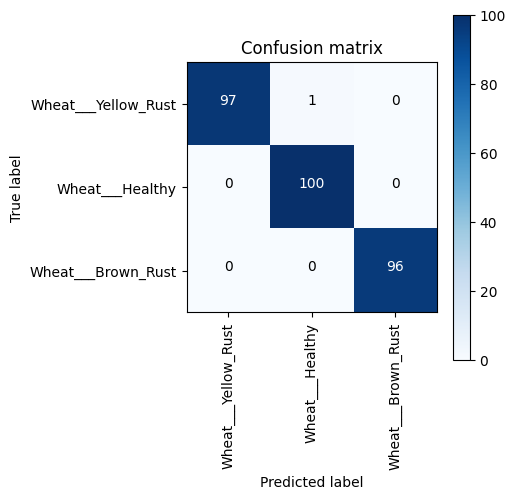

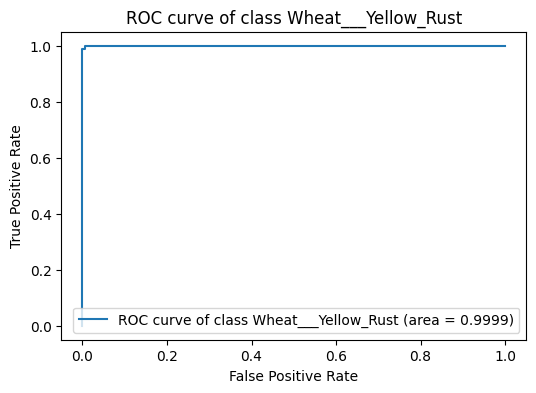

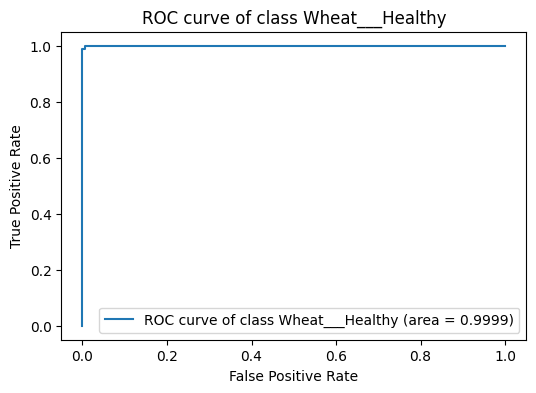

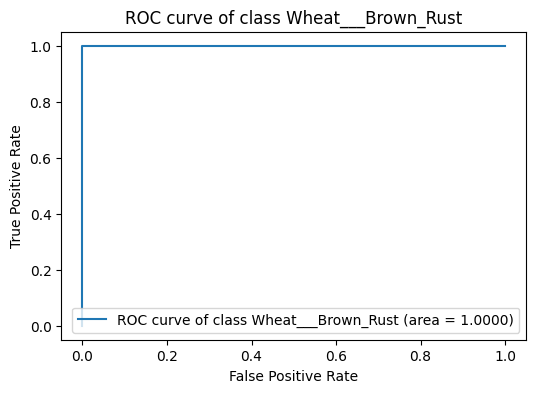

ROC AUC score: 0.9999654639890881
------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/10
120/120 [==============================] - 25s 67ms/step - loss: 0.6053 - accuracy: 0.7854 - val_loss: 0.6614 - val_accuracy: 0.8642
Epoch 2/10
120/120 [==============================] - 6s 54ms/step - loss: 0.0975 - accuracy: 0.9750 - val_loss: 0.1610 - val_accuracy: 0.9585
Epoch 3/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0530 - accuracy: 0.9849 - val_loss: 0.1964 - val_accuracy: 0.9623
Epoch 4/10
120/120 [==============================] - 6s 54ms/step - loss: 0.0434 - accuracy: 0.9875 - val_loss: 0.0602 - val_accuracy: 0.9887
Epoch 5/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0356 - val_accuracy: 0.9887
Epoch 6/10
120/120 [==============================] - 7s 54ms/step - loss: 0.0171 - accuracy: 0.9932 - val_loss: 0.0237 - val_accuracy: 0.9925
Epoch 7/10

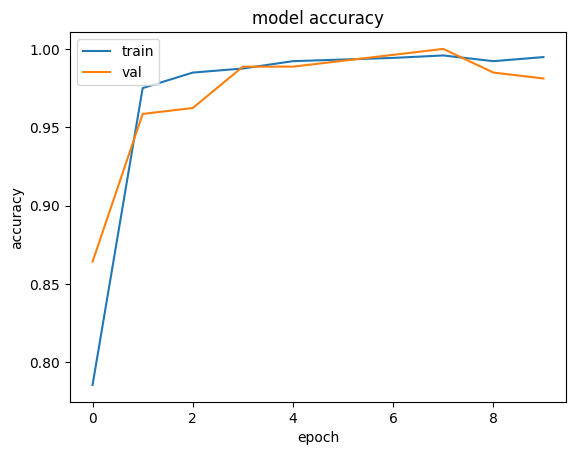

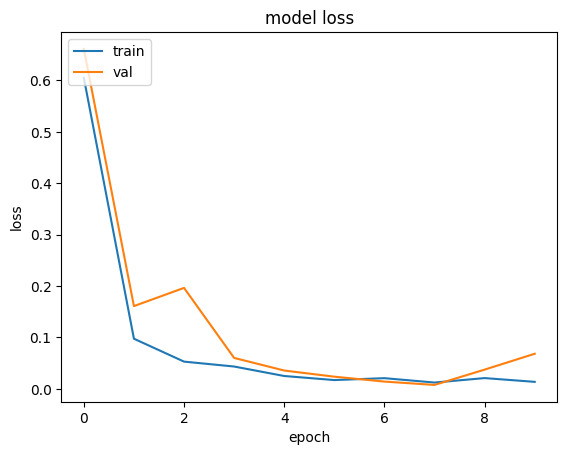

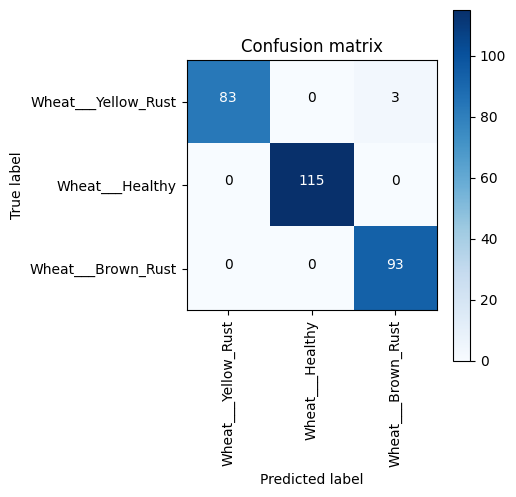

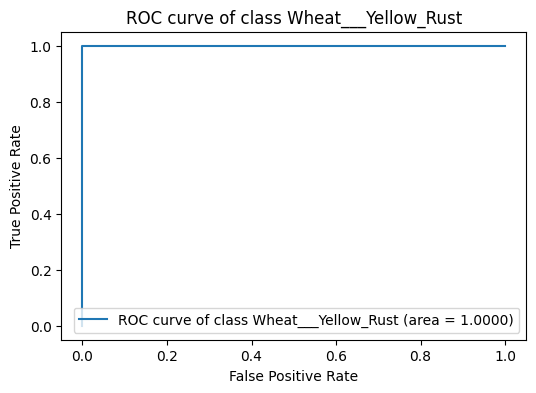

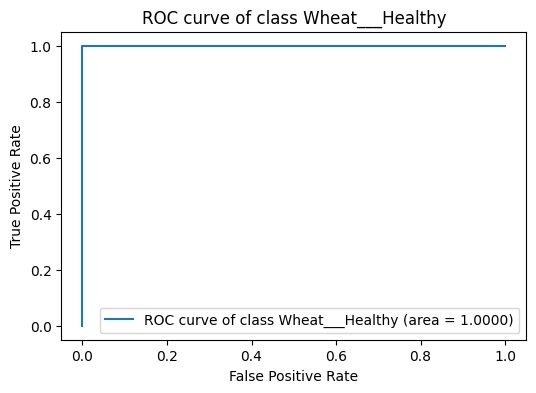

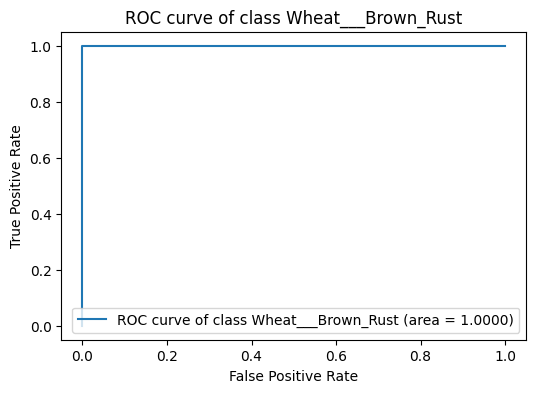

ROC AUC score: 1.0
------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/10
120/120 [==============================] - 25s 67ms/step - loss: 0.5733 - accuracy: 0.8010 - val_loss: 4.9695 - val_accuracy: 0.7623
Epoch 2/10
120/120 [==============================] - 7s 54ms/step - loss: 0.0744 - accuracy: 0.9739 - val_loss: 0.2929 - val_accuracy: 0.9472
Epoch 3/10
120/120 [==============================] - 7s 54ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.1491 - val_accuracy: 0.9585
Epoch 4/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0303 - accuracy: 0.9891 - val_loss: 0.0845 - val_accuracy: 0.9849
Epoch 5/10
120/120 [==============================] - 7s 54ms/step - loss: 0.0149 - accuracy: 0.9958 - val_loss: 0.0697 - val_accuracy: 0.9849
Epoch 6/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0480 - accuracy: 0.9839 - val_loss: 0.0246 - val_accuracy: 0.9962
Epoch 7/10
120/120 [=====

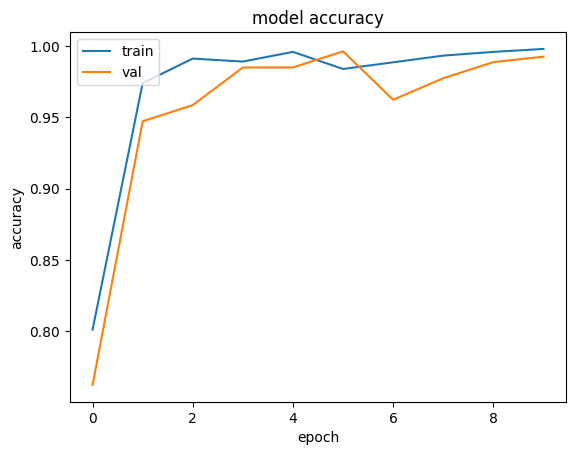

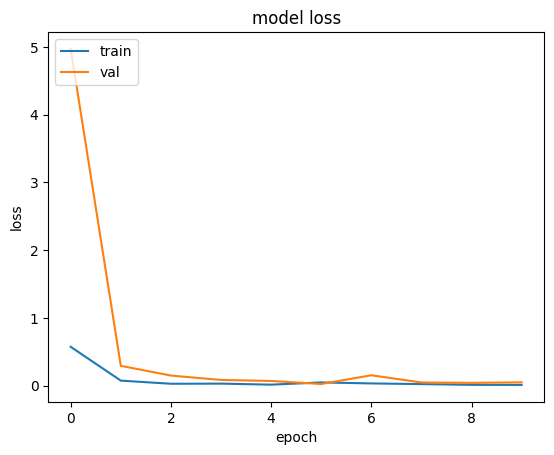

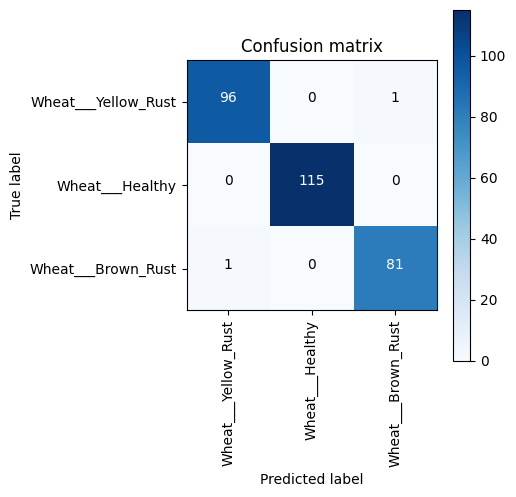

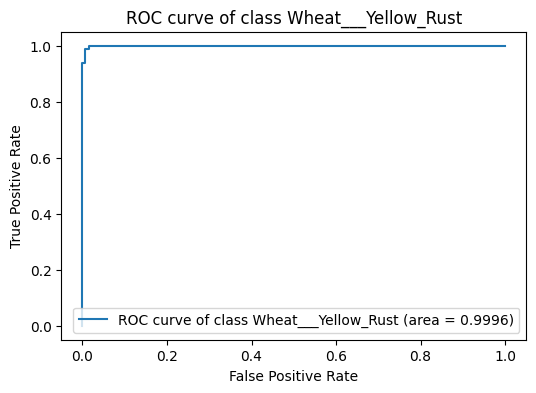

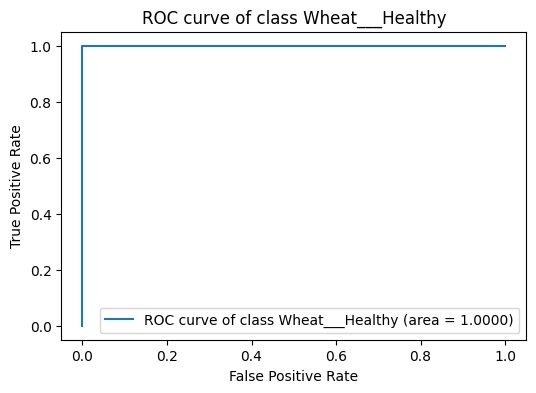

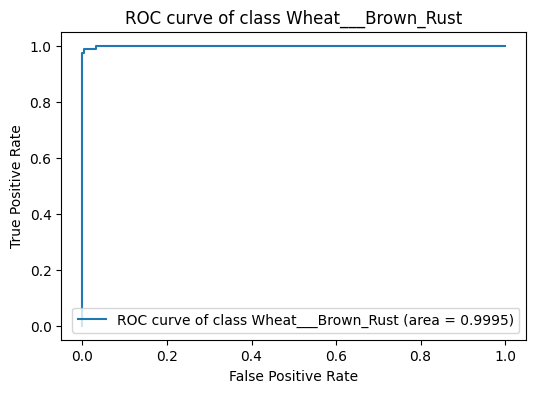

ROC AUC score: 0.9997070519404464
------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/10
120/120 [==============================] - 25s 68ms/step - loss: 0.5526 - accuracy: 0.8167 - val_loss: 0.5290 - val_accuracy: 0.8151
Epoch 2/10
120/120 [==============================] - 7s 55ms/step - loss: 0.1367 - accuracy: 0.9573 - val_loss: 0.0081 - val_accuracy: 0.9962
Epoch 3/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0510 - accuracy: 0.9828 - val_loss: 0.0353 - val_accuracy: 0.9887
Epoch 4/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0484 - accuracy: 0.9844 - val_loss: 0.0902 - val_accuracy: 0.9585
Epoch 5/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0296 - accuracy: 0.9896 - val_loss: 0.0399 - val_accuracy: 0.9887
Epoch 6/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.0415 - val_accuracy: 0.9811
Epoch 7/10

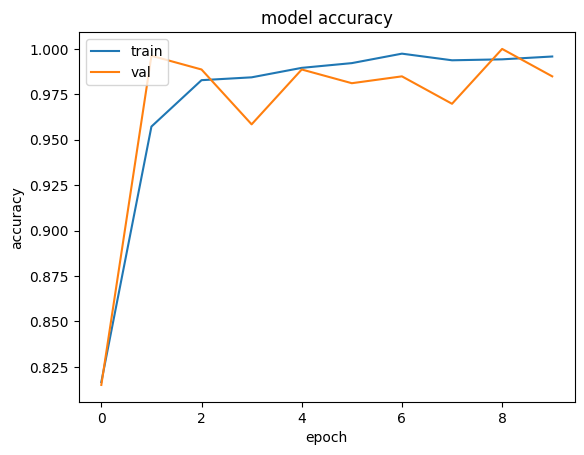

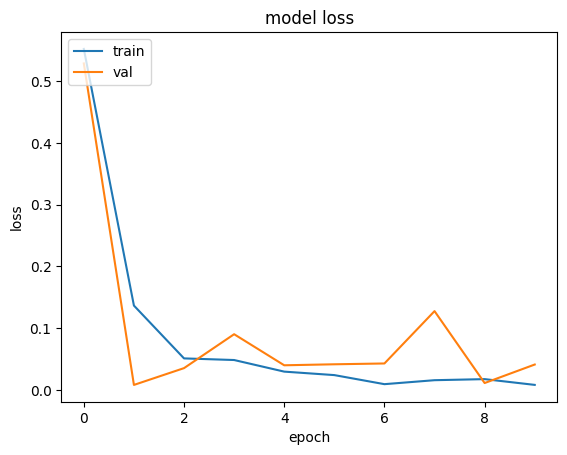

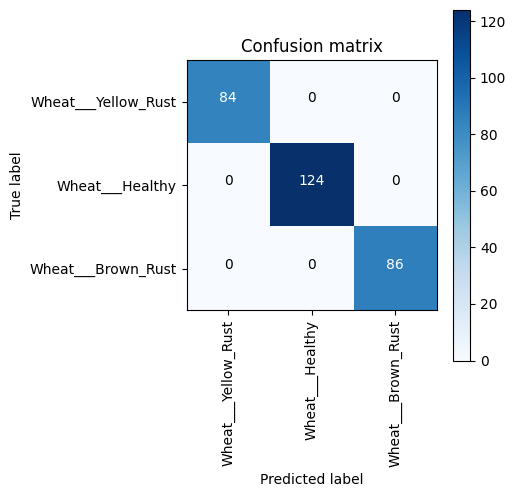

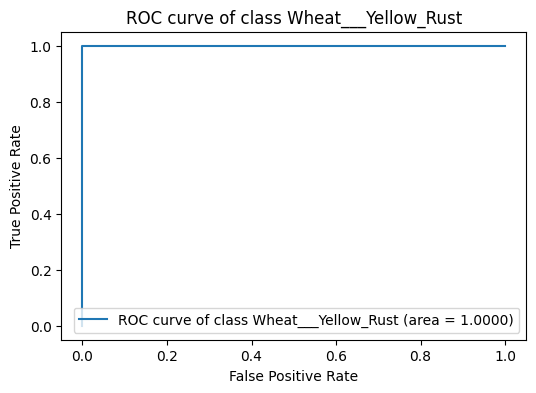

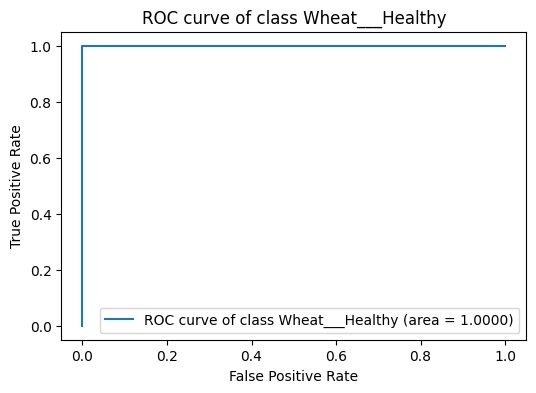

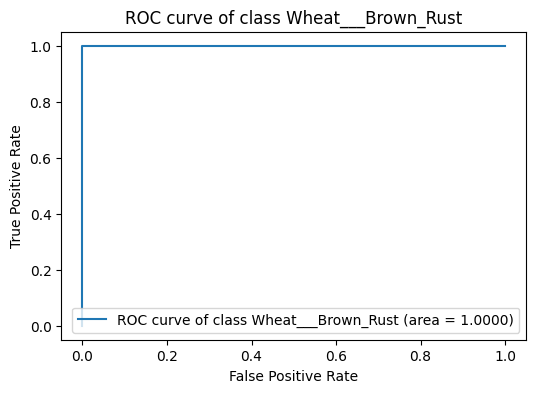

ROC AUC score: 1.0
------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/10
120/120 [==============================] - 24s 67ms/step - loss: 0.4954 - accuracy: 0.8177 - val_loss: 0.4135 - val_accuracy: 0.8755
Epoch 2/10
120/120 [==============================] - 7s 55ms/step - loss: 0.1182 - accuracy: 0.9594 - val_loss: 0.1214 - val_accuracy: 0.9660
Epoch 3/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0584 - accuracy: 0.9818 - val_loss: 0.0762 - val_accuracy: 0.9887
Epoch 4/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0835 - accuracy: 0.9812 - val_loss: 0.1371 - val_accuracy: 0.9698
Epoch 5/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0297 - accuracy: 0.9901 - val_loss: 0.0985 - val_accuracy: 0.9811
Epoch 6/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0279 - accuracy: 0.9927 - val_loss: 0.0887 - val_accuracy: 0.9887
Epoch 7/10
120/120 [=====

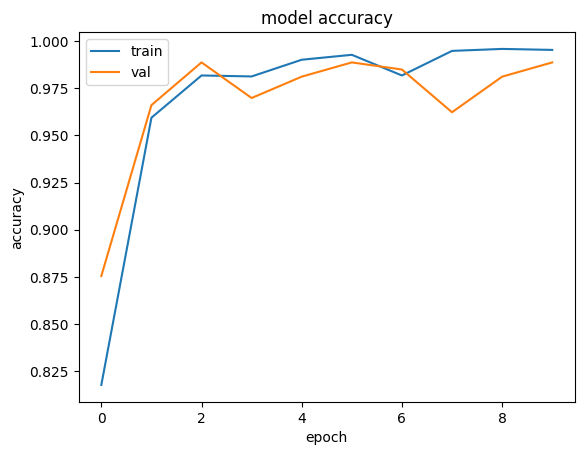

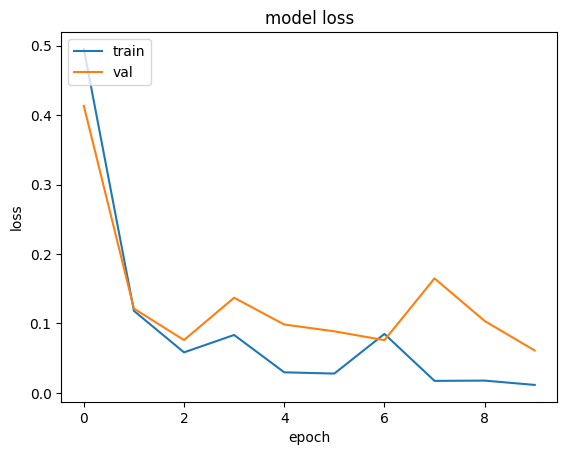

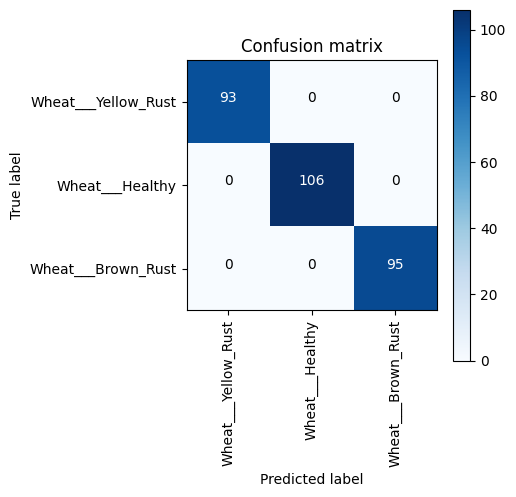

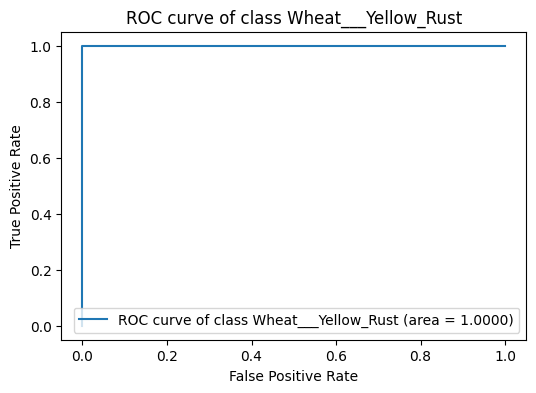

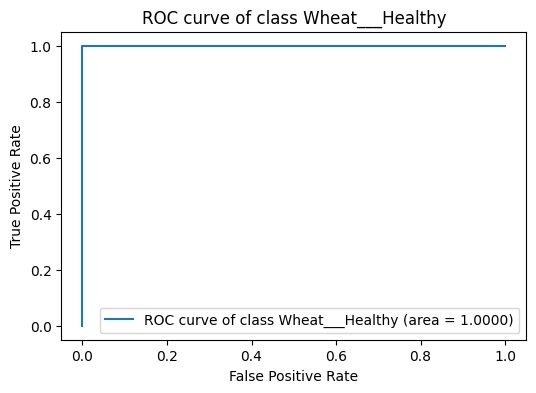

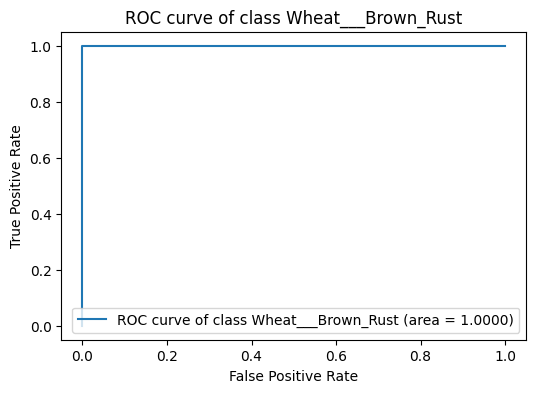

ROC AUC score: 1.0
------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/10
120/120 [==============================] - 25s 68ms/step - loss: 0.6028 - accuracy: 0.7964 - val_loss: 0.2726 - val_accuracy: 0.9396
Epoch 2/10
120/120 [==============================] - 7s 56ms/step - loss: 0.1248 - accuracy: 0.9604 - val_loss: 5.0661 - val_accuracy: 0.6642
Epoch 3/10
120/120 [==============================] - 7s 54ms/step - loss: 0.0666 - accuracy: 0.9807 - val_loss: 0.0763 - val_accuracy: 0.9849
Epoch 4/10
120/120 [==============================] - 7s 56ms/step - loss: 0.0523 - accuracy: 0.9833 - val_loss: 0.1086 - val_accuracy: 0.9623
Epoch 5/10
120/120 [==============================] - 7s 55ms/step - loss: 0.0455 - accuracy: 0.9865 - val_loss: 0.0151 - val_accuracy: 0.9962
Epoch 6/10
120/120 [==============================] - 7s 56ms/step - loss: 0.0219 - accuracy: 0.9948 - val_loss: 0.8333 - val_accuracy: 0.8943
Epoch 7/10
120/120 [====

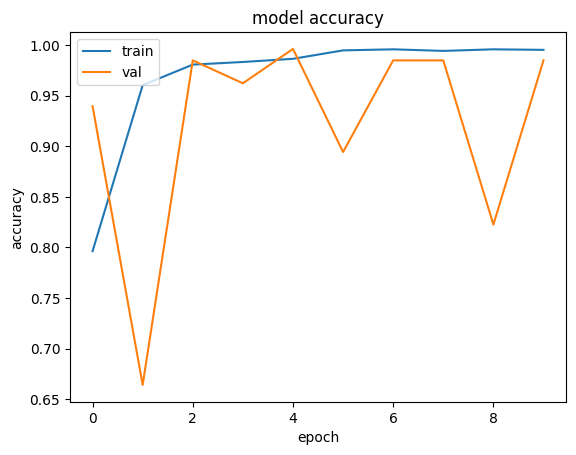

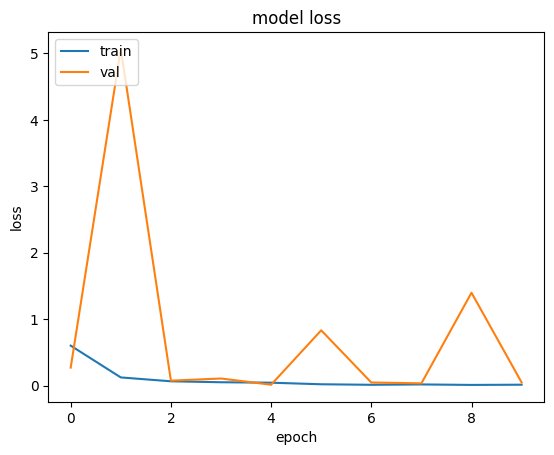

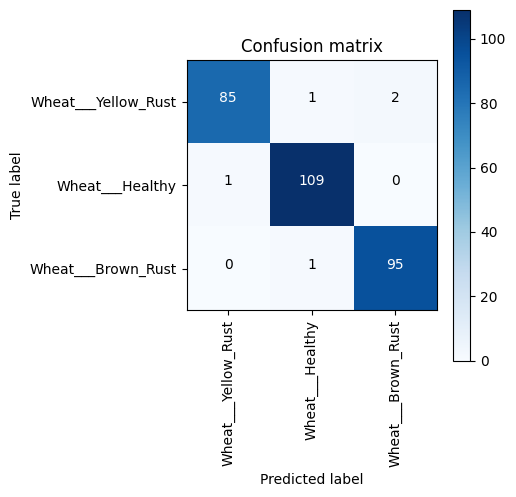

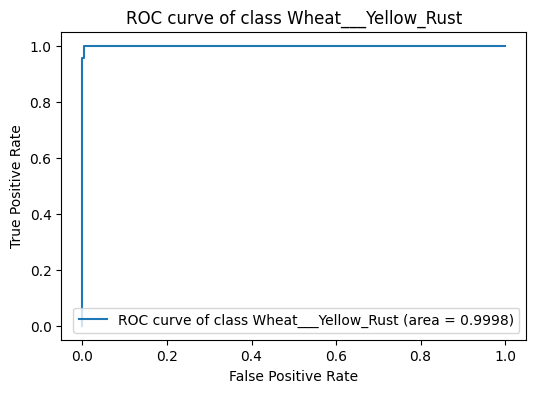

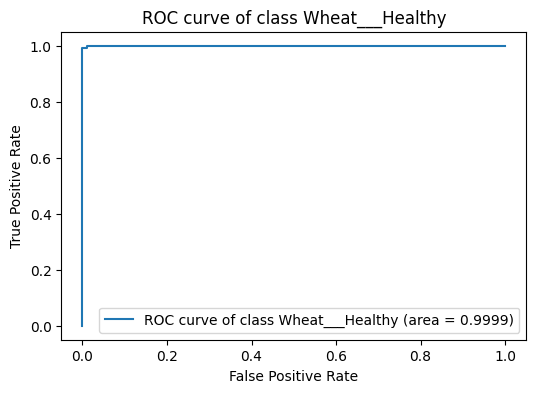

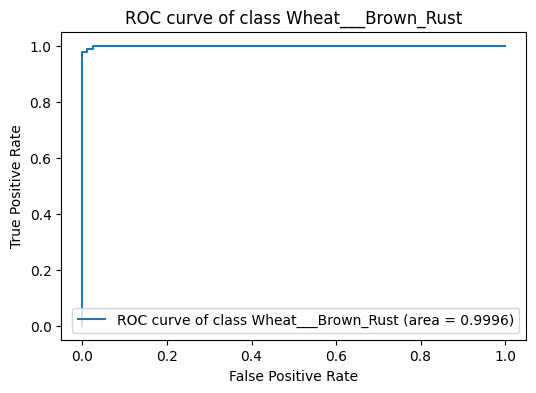

ROC AUC score: 0.9997707555480702
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.02589505910873413 - Accuracy: 98.30508232116699%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.008107644505798817 - Accuracy: 99.6610164642334%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.019476981833577156 - Accuracy: 99.31972622871399%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.016929898411035538 - Accuracy: 99.31972622871399%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.009719038382172585 - Accuracy: 99.65986609458923%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.018104219809174538 - Accuracy: 98.97959232330322%
----------------------------

In [ ]:
train_model_kfold(10, 'inceptionv3', (229, 229))